<a href="https://colab.research.google.com/github/asethi08/SpO2-Prediction/blob/main/New_Clean_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

# Load the data
signal_df = pd.read_csv("./drive/MyDrive/PulseOxData/bidmc-ppg-and-respiration-dataset-1.0.0/bidmc_csv/bidmc_03_Signals.csv")
numerics_df = pd.read_csv("./drive/MyDrive/PulseOxData/bidmc-ppg-and-respiration-dataset-1.0.0/bidmc_csv/bidmc_03_Numerics.csv")

# Merge the dataframes on the 'Time' column
#signal_df.columns = signal_df.columns.str.strip()
#numerics_df.columns = numerics_df.columns.str.strip()
merged_df = pd.merge(signal_df, numerics_df, on='Time [s]')

# Create the matrix with X from signal_df and y from numerics_df
def create_matrix(signal_columns, numeric_column):
    X = merged_df[signal_columns].values
    y = merged_df[numeric_column].values
    return X, y

# Specify the columns to use
signal_columns = [' PLETH', ' II', ' AVR', ' CVP']
numeric_column = ' SpO2'

# Create the matrix
X, y = create_matrix(signal_columns, numeric_column)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
gbr = GradientBoostingRegressor(
    loss='squared_error',
    learning_rate=0.1,
    n_estimators=100,
    subsample=1.0,
    criterion='friedman_mse',
    min_samples_split=2,
    min_samples_leaf=1,
    max_depth=3,
    min_impurity_decrease=0.0,
    init=None,
    random_state=None,
    max_features=None,
    alpha=0.9,
    verbose=0,
    max_leaf_nodes=None,
    warm_start=False,
    validation_fraction=0.1,
    n_iter_no_change=None,
    tol=0.0001,
    ccp_alpha=0.0
)

gbr.fit(X_train, y_train)

# Predict and calculate the error
y_pred = gbr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

predicted_vs_actual = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred
})

print(predicted_vs_actual)
print(f'Mean Squared Error: {mse}')

<ipython-input-1-d51646f5f7a0>:14: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  merged_df = pd.merge(signal_df, numerics_df, on='Time [s]')


    Actual  Predicted
0       97  96.245668
1       95  95.165263
2       95  95.666088
3       96  95.307107
4       95  95.243248
..     ...        ...
92      96  95.383185
93      95  95.682933
94      96  96.441257
95      96  95.259611
96      96  95.564278

[97 rows x 2 columns]
Mean Squared Error: 0.2508753146233723


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

# File paths
signal_file_path = "./drive/MyDrive/PulseOxData/bidmc-ppg-and-respiration-dataset-1.0.0/bidmc_csv/bidmc_03_Signals.csv"
numerics_file_path = "./drive/MyDrive/PulseOxData/bidmc-ppg-and-respiration-dataset-1.0.0/bidmc_csv/bidmc_03_Numerics.csv"

# Read the data
signal_df = pd.read_csv(signal_file_path)
numerics_df = pd.read_csv(numerics_file_path)

# Strip leading/trailing spaces from column names
signal_df.columns = signal_df.columns.str.strip()
numerics_df.columns = numerics_df.columns.str.strip()

# Print columns to verify
print(f"signal_df columns: {signal_df.columns}")
print(f"numerics_df columns: {numerics_df.columns}")

# Merge the dataframes on the 'Time [s]' column
merged_df = pd.merge(signal_df, numerics_df, on='Time [s]')

# Specify the columns to use
signal_columns = ['PLETH', 'II', 'AVR', 'CVP']
numeric_column = 'SpO2'

# Check for missing values in the numeric column
if merged_df[numeric_column].isna().any():
    print(f"Missing values in {numeric_column}, cannot proceed with this dataset.")
else:
    # Filter available columns
    available_columns = [col for col in signal_columns if col in merged_df.columns]
    if not available_columns:
        print("No available signal columns in merged dataframe, cannot proceed with this dataset.")
    else:
        # Prepare the data
        X = merged_df[available_columns].values
        y = merged_df[numeric_column].values

        # Ensure y has no NaN values and matches the shape of X
        y = y[~np.isnan(y)]
        X = X[:len(y)]

        # Check the shapes
        print(f'Final X.shape: {X.shape}')
        print(f'Final y.shape: {y.shape}')

        # Split the data into training and test sets
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        # Define parameter ranges
        learning_rates = [0.01, 0.05, 0.1, 0.2]
        n_estimators = [50, 100, 200]

        # Initialize a list to store results
        results = []

        # Loop through parameter ranges
        for lr in learning_rates:
            for n_est in n_estimators:
                # Train the model
                gbr = GradientBoostingRegressor(
                    loss='squared_error',
                    learning_rate=lr,
                    n_estimators=n_est,
                    subsample=1.0,
                    criterion='friedman_mse',
                    min_samples_split=2,
                    min_samples_leaf=1,
                    max_depth=3,
                    min_impurity_decrease=0.0,
                    init=None,
                    random_state=None,
                    max_features=None,
                    alpha=0.9,
                    verbose=0,
                    max_leaf_nodes=None,
                    warm_start=False,
                    validation_fraction=0.1,
                    n_iter_no_change=None,
                    tol=0.0001,
                    ccp_alpha=0.0
                )

                gbr.fit(X_train, y_train)

                # Predict and calculate the error
                y_train_pred = gbr.predict(X_train)
                y_test_pred = gbr.predict(X_test)
                train_mse = mean_squared_error(y_train, y_train_pred)
                test_mse = mean_squared_error(y_test, y_test_pred)

                # Store the results
                results.append({
                    'learning_rate': lr,
                    'n_estimators': n_est,
                    'train_mse': train_mse,
                    'test_mse': test_mse
                })

        # Convert results to a DataFrame
        results_df = pd.DataFrame(results)

        # Display the results
        print(results_df)


signal_df columns: Index(['Time [s]', 'RESP', 'PLETH', 'II', 'V', 'AVR', 'CVP'], dtype='object')
numerics_df columns: Index(['Time [s]', 'HR', 'PULSE', 'RESP', 'SpO2'], dtype='object')
Final X.shape: (481, 4)
Final y.shape: (481,)


<ipython-input-2-074eeba07c7e>:24: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  merged_df = pd.merge(signal_df, numerics_df, on='Time [s]')


    learning_rate  n_estimators  train_mse  test_mse
0            0.01            50   0.276984  0.344406
1            0.01           100   0.240770  0.291862
2            0.01           200   0.211034  0.251653
3            0.05            50   0.200325  0.244464
4            0.05           100   0.162558  0.240885
5            0.05           200   0.117775  0.251209
6            0.10            50   0.159213  0.241526
7            0.10           100   0.115662  0.250630
8            0.10           200   0.073917  0.281351
9            0.20            50   0.117625  0.249850
10           0.20           100   0.067531  0.263756
11           0.20           200   0.025630  0.318135


In [ ]:
import pandas as pd
import numpy as np
import glob
import os
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

# Correct data path
data_path = "./drive/MyDrive/PulseOxData/bidmc-ppg-and-respiration-dataset-1.0.0/bidmc_csv/"

# Verify if the directory exists
if os.path.exists(data_path):
    print(f"Data path exists: {data_path}")
else:
    print(f"Data path does NOT exist: {data_path}")

# Initialize lists to hold the aggregated data
x_values = []
y_values = []

# Use glob to find all signal and numeric files
signal_files = glob.glob(os.path.join(data_path, "bidmc_*_Signals.csv"))

print(f"Found {len(signal_files)} signal files.")

for signal_file in signal_files:
    # Extract patient id from file name
    pid = int(signal_file.split("_")[-2])
    numerics_file = signal_file.replace("_Signals.csv", "_Numerics.csv")

    print(f"Processing files for patient {pid}:")
    print(f"  Signal file: {signal_file}")
    print(f"  Numerics file: {numerics_file}")

    # Load the data
    try:
        signal_df = pd.read_csv(signal_file)
        numerics_df = pd.read_csv(numerics_file)
    except FileNotFoundError:
        print(f'  Files for patient {pid} not found.')
        continue

    print(f"  Loaded signal_df with shape: {signal_df.shape}")
    print(f"  Loaded numerics_df with shape: {numerics_df.shape}")

    # Strip leading/trailing spaces from column names
    signal_df.columns = signal_df.columns.str.strip()
    numerics_df.columns = numerics_df.columns.str.strip()

    # Print the columns of the DataFrames to verify
    print(f"  signal_df columns: {signal_df.columns}")
    print(f"  numerics_df columns: {numerics_df.columns}")

    # Merge the dataframes on the 'Time [s]' column
    merged_df = pd.merge(signal_df, numerics_df, on='Time [s]')

    print(f"  Merged dataframe shape: {merged_df.shape}")
    print(f"  Merged dataframe columns: {merged_df.columns}")

    # Specify the columns to use
    signal_columns = ['PLETH', 'II', 'AVR', 'CVP']
    numeric_column = 'SpO2'

    # Check for missing values in the numeric column
    if merged_df[numeric_column].isna().any():
        print(f"  Missing values in {numeric_column}, skipping patient {pid}.")
        continue

    # Filter common columns to those that are present in the merged dataframe
    available_columns = [col for col in signal_columns if col in merged_df.columns]
    if not available_columns:
        print(f"  No available signal columns in merged dataframe, skipping patient {pid}.")
        continue

    # Append the values to the lists
    x_values.extend(merged_df[available_columns].dropna().values.tolist())
    y_values.extend(merged_df[numeric_column].dropna().values.tolist())

    print(f"  Appended data, current X shape: {len(x_values)}, current y shape: {len(y_values)}")

# Convert lists to numpy arrays
X = np.array([np.array(x) for x in x_values if len(x) == len(available_columns)])
y = np.array(y_values[:len(X)])

# Ensure y has no NaN values and matches the shape of X
y = y[~np.isnan(y)]
X = X[:len(y)]

# Check the shapes
print(f'Final X.shape: {X.shape}')
print(f'Final y.shape: {y.shape}')

# Check if there's enough data to split
if len(X) == 0 or len(y) == 0:
    print("Insufficient data for model training.")
else:
    # Split the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Define parameter ranges
    learning_rates = [0.01, 0.05, 0.1, 0.2]
    n_estimators = [50, 100, 200]

    # Initialize a list to store results
    results = []

    # Loop through parameter ranges
    for lr in learning_rates:
        for n_est in n_estimators:
            # Train the model
            gbr = GradientBoostingRegressor(
                loss='squared_error',
                learning_rate=lr,
                n_estimators=n_est,
                subsample=1.0,
                criterion='friedman_mse',
                min_samples_split=2,
                min_samples_leaf=1,
                max_depth=3,
                min_impurity_decrease=0.0,
                init=None,
                random_state=None,
                max_features=None,
                alpha=0.9,
                verbose=0,
                max_leaf_nodes=None,
                warm_start=False,
                validation_fraction=0.1,
                n_iter_no_change=None,
                tol=0.0001,
                ccp_alpha=0.0
            )

            gbr.fit(X_train, y_train)

            # Predict and calculate the error
            y_train_pred = gbr.predict(X_train)
            y_test_pred = gbr.predict(X_test)
            train_mse = mean_squared_error(y_train, y_train_pred)
            test_mse = mean_squared_error(y_test, y_test_pred)

            # Store the results
            results.append({
                'learning_rate': lr,
                'n_estimators': n_est,
                'train_mse': train_mse,
                'test_mse': test_mse
            })

    # Convert results to a DataFrame
    results_df = pd.DataFrame(results)

    # Display the results
    print(results_df)


Data path exists: ./drive/MyDrive/PulseOxData/bidmc-ppg-and-respiration-dataset-1.0.0/bidmc_csv/
Found 53 signal files.
Processing files for patient 12:
  Signal file: ./drive/MyDrive/PulseOxData/bidmc-ppg-and-respiration-dataset-1.0.0/bidmc_csv/bidmc_12_Signals.csv
  Numerics file: ./drive/MyDrive/PulseOxData/bidmc-ppg-and-respiration-dataset-1.0.0/bidmc_csv/bidmc_12_Numerics.csv
  Loaded signal_df with shape: (60001, 6)
  Loaded numerics_df with shape: (481, 5)
  signal_df columns: Index(['Time [s]', 'RESP', 'PLETH', 'II', 'V', 'AVR'], dtype='object')
  numerics_df columns: Index(['Time [s]', 'HR', 'PULSE', 'RESP', 'SpO2'], dtype='object')
  Merged dataframe shape: (481, 10)
  Merged dataframe columns: Index(['Time [s]', 'RESP_x', 'PLETH', 'II', 'V', 'AVR', 'HR', 'PULSE',
       'RESP_y', 'SpO2'],
      dtype='object')
  Appended data, current X shape: 481, current y shape: 481
Processing files for patient 48:
  Signal file: ./drive/MyDrive/PulseOxData/bidmc-ppg-and-respiration-datas

<ipython-input-3-1325421ad594>:56: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  merged_df = pd.merge(signal_df, numerics_df, on='Time [s]')


  Loaded signal_df with shape: (60001, 6)
  Loaded numerics_df with shape: (481, 5)
  signal_df columns: Index(['Time [s]', 'RESP', 'II', 'V', 'AVR', 'PLETH'], dtype='object')
  numerics_df columns: Index(['Time [s]', 'HR', 'PULSE', 'RESP', 'SpO2'], dtype='object')
  Merged dataframe shape: (481, 10)
  Merged dataframe columns: Index(['Time [s]', 'RESP_x', 'II', 'V', 'AVR', 'PLETH', 'HR', 'PULSE',
       'RESP_y', 'SpO2'],
      dtype='object')
  Appended data, current X shape: 962, current y shape: 962
Processing files for patient 22:
  Signal file: ./drive/MyDrive/PulseOxData/bidmc-ppg-and-respiration-dataset-1.0.0/bidmc_csv/bidmc_22_Signals.csv
  Numerics file: ./drive/MyDrive/PulseOxData/bidmc-ppg-and-respiration-dataset-1.0.0/bidmc_csv/bidmc_22_Numerics.csv
  Loaded signal_df with shape: (60001, 8)
  Loaded numerics_df with shape: (481, 5)
  signal_df columns: Index(['Time [s]', 'RESP', 'ABP', 'PLETH', 'II', 'V', 'AVR', 'CVP'], dtype='object')
  numerics_df columns: Index(['Time [

<ipython-input-3-1325421ad594>:56: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  merged_df = pd.merge(signal_df, numerics_df, on='Time [s]')
<ipython-input-3-1325421ad594>:56: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  merged_df = pd.merge(signal_df, numerics_df, on='Time [s]')
<ipython-input-3-1325421ad594>:56: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  merged_df = pd.merge(signal_df, numerics_df, on='Time [s]')


  Loaded signal_df with shape: (60001, 6)
  Loaded numerics_df with shape: (481, 5)
  signal_df columns: Index(['Time [s]', 'RESP', 'PLETH', 'V', 'AVR', 'II'], dtype='object')
  numerics_df columns: Index(['Time [s]', 'HR', 'PULSE', 'RESP', 'SpO2'], dtype='object')
  Merged dataframe shape: (481, 10)
  Merged dataframe columns: Index(['Time [s]', 'RESP_x', 'PLETH', 'V', 'AVR', 'II', 'HR', 'PULSE',
       'RESP_y', 'SpO2'],
      dtype='object')
  Missing values in SpO2, skipping patient 1.
Processing files for patient 7:
  Signal file: ./drive/MyDrive/PulseOxData/bidmc-ppg-and-respiration-dataset-1.0.0/bidmc_csv/bidmc_07_Signals.csv
  Numerics file: ./drive/MyDrive/PulseOxData/bidmc-ppg-and-respiration-dataset-1.0.0/bidmc_csv/bidmc_07_Numerics.csv
  Loaded signal_df with shape: (60001, 8)
  Loaded numerics_df with shape: (481, 5)
  signal_df columns: Index(['Time [s]', 'RESP', 'PLETH', 'II', 'V', 'AVR', 'CVP', 'ART'], dtype='object')
  numerics_df columns: Index(['Time [s]', 'HR', 'PUL

<ipython-input-3-1325421ad594>:56: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  merged_df = pd.merge(signal_df, numerics_df, on='Time [s]')
<ipython-input-3-1325421ad594>:56: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  merged_df = pd.merge(signal_df, numerics_df, on='Time [s]')
<ipython-input-3-1325421ad594>:56: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  merged_df = pd.merge(signal_df, numerics_df, on='Time [s]')


  Loaded signal_df with shape: (60001, 6)
  Loaded numerics_df with shape: (481, 5)
  signal_df columns: Index(['Time [s]', 'RESP', 'PLETH', 'II', 'MCL', 'AVR'], dtype='object')
  numerics_df columns: Index(['Time [s]', 'HR', 'PULSE', 'RESP', 'SpO2'], dtype='object')
  Merged dataframe shape: (481, 10)
  Merged dataframe columns: Index(['Time [s]', 'RESP_x', 'PLETH', 'II', 'MCL', 'AVR', 'HR', 'PULSE',
       'RESP_y', 'SpO2'],
      dtype='object')
  Appended data, current X shape: 3367, current y shape: 3367
Processing files for patient 34:
  Signal file: ./drive/MyDrive/PulseOxData/bidmc-ppg-and-respiration-dataset-1.0.0/bidmc_csv/bidmc_34_Signals.csv
  Numerics file: ./drive/MyDrive/PulseOxData/bidmc-ppg-and-respiration-dataset-1.0.0/bidmc_csv/bidmc_34_Numerics.csv
  Loaded signal_df with shape: (60001, 6)
  Loaded numerics_df with shape: (481, 5)
  signal_df columns: Index(['Time [s]', 'RESP', 'PLETH', 'II', 'V', 'AVR'], dtype='object')
  numerics_df columns: Index(['Time [s]', 'HR

<ipython-input-3-1325421ad594>:56: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  merged_df = pd.merge(signal_df, numerics_df, on='Time [s]')
<ipython-input-3-1325421ad594>:56: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  merged_df = pd.merge(signal_df, numerics_df, on='Time [s]')
<ipython-input-3-1325421ad594>:56: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  merged_df = pd.merge(signal_df, numerics_df, on='Time [s]')


  Loaded signal_df with shape: (60001, 6)
  Loaded numerics_df with shape: (481, 5)
  signal_df columns: Index(['Time [s]', 'V', 'RESP', 'II', 'AVR', 'PLETH'], dtype='object')
  numerics_df columns: Index(['Time [s]', 'HR', 'PULSE', 'RESP', 'SpO2'], dtype='object')
  Merged dataframe shape: (481, 10)
  Merged dataframe columns: Index(['Time [s]', 'V', 'RESP_x', 'II', 'AVR', 'PLETH', 'HR', 'PULSE',
       'RESP_y', 'SpO2'],
      dtype='object')
  Appended data, current X shape: 4810, current y shape: 4810
Processing files for patient 16:
  Signal file: ./drive/MyDrive/PulseOxData/bidmc-ppg-and-respiration-dataset-1.0.0/bidmc_csv/bidmc_16_Signals.csv
  Numerics file: ./drive/MyDrive/PulseOxData/bidmc-ppg-and-respiration-dataset-1.0.0/bidmc_csv/bidmc_16_Numerics.csv
  Loaded signal_df with shape: (60001, 6)
  Loaded numerics_df with shape: (481, 5)
  signal_df columns: Index(['Time [s]', 'RESP', 'PLETH', 'II', 'V', 'AVR'], dtype='object')
  numerics_df columns: Index(['Time [s]', 'HR', '

<ipython-input-3-1325421ad594>:56: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  merged_df = pd.merge(signal_df, numerics_df, on='Time [s]')
<ipython-input-3-1325421ad594>:56: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  merged_df = pd.merge(signal_df, numerics_df, on='Time [s]')
<ipython-input-3-1325421ad594>:56: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  merged_df = pd.merge(signal_df, numerics_df, on='Time [s]')


  Loaded signal_df with shape: (60001, 6)
  Loaded numerics_df with shape: (481, 5)
  signal_df columns: Index(['Time [s]', 'PLETH', 'RESP', 'II', 'V', 'AVR'], dtype='object')
  numerics_df columns: Index(['Time [s]', 'HR', 'PULSE', 'RESP', 'SpO2'], dtype='object')
  Merged dataframe shape: (481, 10)
  Merged dataframe columns: Index(['Time [s]', 'PLETH', 'RESP_x', 'II', 'V', 'AVR', 'HR', 'PULSE',
       'RESP_y', 'SpO2'],
      dtype='object')
  Appended data, current X shape: 6253, current y shape: 6253
Processing files for patient 40:
  Signal file: ./drive/MyDrive/PulseOxData/bidmc-ppg-and-respiration-dataset-1.0.0/bidmc_csv/bidmc_40_Signals.csv
  Numerics file: ./drive/MyDrive/PulseOxData/bidmc-ppg-and-respiration-dataset-1.0.0/bidmc_csv/bidmc_40_Numerics.csv
  Loaded signal_df with shape: (60001, 6)
  Loaded numerics_df with shape: (481, 5)
  signal_df columns: Index(['Time [s]', 'RESP', 'II', 'V', 'AVR', 'PLETH'], dtype='object')
  numerics_df columns: Index(['Time [s]', 'HR', '

<ipython-input-3-1325421ad594>:56: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  merged_df = pd.merge(signal_df, numerics_df, on='Time [s]')
<ipython-input-3-1325421ad594>:56: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  merged_df = pd.merge(signal_df, numerics_df, on='Time [s]')


  Loaded signal_df with shape: (60001, 6)
  Loaded numerics_df with shape: (481, 5)
  signal_df columns: Index(['Time [s]', 'RESP', 'PLETH', 'II', 'V', 'AVR'], dtype='object')
  numerics_df columns: Index(['Time [s]', 'HR', 'PULSE', 'RESP', 'SpO2'], dtype='object')
  Merged dataframe shape: (481, 10)
  Merged dataframe columns: Index(['Time [s]', 'RESP_x', 'PLETH', 'II', 'V', 'AVR', 'HR', 'PULSE',
       'RESP_y', 'SpO2'],
      dtype='object')
  Appended data, current X shape: 7215, current y shape: 7215
Processing files for patient 10:
  Signal file: ./drive/MyDrive/PulseOxData/bidmc-ppg-and-respiration-dataset-1.0.0/bidmc_csv/bidmc_10_Signals.csv
  Numerics file: ./drive/MyDrive/PulseOxData/bidmc-ppg-and-respiration-dataset-1.0.0/bidmc_csv/bidmc_10_Numerics.csv
  Loaded signal_df with shape: (60001, 7)
  Loaded numerics_df with shape: (481, 5)
  signal_df columns: Index(['Time [s]', 'RESP', 'PLETH', 'II', 'V', 'AVR', 'CVP'], dtype='object')
  numerics_df columns: Index(['Time [s]', 

<ipython-input-3-1325421ad594>:56: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  merged_df = pd.merge(signal_df, numerics_df, on='Time [s]')
<ipython-input-3-1325421ad594>:56: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  merged_df = pd.merge(signal_df, numerics_df, on='Time [s]')
<ipython-input-3-1325421ad594>:56: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  merged_df = pd.merge(signal_df, numerics_df, on='Time [s]')


  Loaded signal_df with shape: (60001, 7)
  Loaded numerics_df with shape: (481, 5)
  signal_df columns: Index(['Time [s]', 'RESP', 'PLETH', 'II', 'V', 'AVR', 'CVP'], dtype='object')
  numerics_df columns: Index(['Time [s]', 'HR', 'PULSE', 'RESP', 'SpO2'], dtype='object')
  Merged dataframe shape: (481, 11)
  Merged dataframe columns: Index(['Time [s]', 'RESP_x', 'PLETH', 'II', 'V', 'AVR', 'CVP', 'HR', 'PULSE',
       'RESP_y', 'SpO2'],
      dtype='object')
  Appended data, current X shape: 8658, current y shape: 8658
Processing files for patient 27:
  Signal file: ./drive/MyDrive/PulseOxData/bidmc-ppg-and-respiration-dataset-1.0.0/bidmc_csv/bidmc_27_Signals.csv
  Numerics file: ./drive/MyDrive/PulseOxData/bidmc-ppg-and-respiration-dataset-1.0.0/bidmc_csv/bidmc_27_Numerics.csv


<ipython-input-3-1325421ad594>:56: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  merged_df = pd.merge(signal_df, numerics_df, on='Time [s]')


  Loaded signal_df with shape: (60001, 6)
  Loaded numerics_df with shape: (481, 5)
  signal_df columns: Index(['Time [s]', 'RESP', 'II', 'V', 'AVR', 'PLETH'], dtype='object')
  numerics_df columns: Index(['Time [s]', 'HR', 'PULSE', 'RESP', 'SpO2'], dtype='object')
  Merged dataframe shape: (481, 10)
  Merged dataframe columns: Index(['Time [s]', 'RESP_x', 'II', 'V', 'AVR', 'PLETH', 'HR', 'PULSE',
       'RESP_y', 'SpO2'],
      dtype='object')
  Appended data, current X shape: 9139, current y shape: 9139
Processing files for patient 21:
  Signal file: ./drive/MyDrive/PulseOxData/bidmc-ppg-and-respiration-dataset-1.0.0/bidmc_csv/bidmc_21_Signals.csv
  Numerics file: ./drive/MyDrive/PulseOxData/bidmc-ppg-and-respiration-dataset-1.0.0/bidmc_csv/bidmc_21_Numerics.csv
  Loaded signal_df with shape: (60001, 6)
  Loaded numerics_df with shape: (481, 5)
  signal_df columns: Index(['Time [s]', 'RESP', 'PLETH', 'II', 'V', 'AVR'], dtype='object')
  numerics_df columns: Index(['Time [s]', 'HR', '

<ipython-input-3-1325421ad594>:56: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  merged_df = pd.merge(signal_df, numerics_df, on='Time [s]')
<ipython-input-3-1325421ad594>:56: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  merged_df = pd.merge(signal_df, numerics_df, on='Time [s]')
<ipython-input-3-1325421ad594>:56: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  merged_df = pd.merge(signal_df, numerics_df, on='Time [s]')
<ipython-input-3-1325421ad594>:56: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  merged_df = pd.merge(signal_df, numerics_df, on='Time [s]')


  Loaded signal_df with shape: (60001, 6)
  Loaded numerics_df with shape: (481, 5)
  signal_df columns: Index(['Time [s]', 'RESP', 'PLETH', 'I', 'MCL', 'II'], dtype='object')
  numerics_df columns: Index(['Time [s]', 'HR', 'PULSE', 'RESP', 'SpO2'], dtype='object')
  Merged dataframe shape: (481, 10)
  Merged dataframe columns: Index(['Time [s]', 'RESP_x', 'PLETH', 'I', 'MCL', 'II', 'HR', 'PULSE',
       'RESP_y', 'SpO2'],
      dtype='object')
  Appended data, current X shape: 11063, current y shape: 11063
Processing files for patient 25:
  Signal file: ./drive/MyDrive/PulseOxData/bidmc-ppg-and-respiration-dataset-1.0.0/bidmc_csv/bidmc_25_Signals.csv
  Numerics file: ./drive/MyDrive/PulseOxData/bidmc-ppg-and-respiration-dataset-1.0.0/bidmc_csv/bidmc_25_Numerics.csv
  Loaded signal_df with shape: (60001, 6)
  Loaded numerics_df with shape: (481, 5)
  signal_df columns: Index(['Time [s]', 'RESP', 'PLETH', 'II', 'V', 'AVR'], dtype='object')
  numerics_df columns: Index(['Time [s]', 'HR',

<ipython-input-3-1325421ad594>:56: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  merged_df = pd.merge(signal_df, numerics_df, on='Time [s]')
<ipython-input-3-1325421ad594>:56: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  merged_df = pd.merge(signal_df, numerics_df, on='Time [s]')
<ipython-input-3-1325421ad594>:56: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  merged_df = pd.merge(signal_df, numerics_df, on='Time [s]')
<ipython-input-3-1325421ad594>:56: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  merged_df = pd.merge(signal_df, numerics_df, on='Time [s]')


  Merged dataframe shape: (481, 10)
  Merged dataframe columns: Index(['Time [s]', 'PLETH', 'RESP_x', 'II', 'V', 'AVR', 'HR', 'PULSE',
       'RESP_y', 'SpO2'],
      dtype='object')
  Appended data, current X shape: 11544, current y shape: 11544
Processing files for patient 46:
  Signal file: ./drive/MyDrive/PulseOxData/bidmc-ppg-and-respiration-dataset-1.0.0/bidmc_csv/bidmc_46_Signals.csv
  Numerics file: ./drive/MyDrive/PulseOxData/bidmc-ppg-and-respiration-dataset-1.0.0/bidmc_csv/bidmc_46_Numerics.csv
  Loaded signal_df with shape: (60001, 6)
  Loaded numerics_df with shape: (481, 5)
  signal_df columns: Index(['Time [s]', 'PLETH', 'RESP', 'II', 'V', 'AVR'], dtype='object')
  numerics_df columns: Index(['Time [s]', 'HR', 'PULSE', 'RESP', 'SpO2'], dtype='object')
  Merged dataframe shape: (481, 10)
  Merged dataframe columns: Index(['Time [s]', 'PLETH', 'RESP_x', 'II', 'V', 'AVR', 'HR', 'PULSE',
       'RESP_y', 'SpO2'],
      dtype='object')
  Appended data, current X shape: 12025,

<ipython-input-3-1325421ad594>:56: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  merged_df = pd.merge(signal_df, numerics_df, on='Time [s]')
<ipython-input-3-1325421ad594>:56: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  merged_df = pd.merge(signal_df, numerics_df, on='Time [s]')
<ipython-input-3-1325421ad594>:56: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  merged_df = pd.merge(signal_df, numerics_df, on='Time [s]')


  Loaded signal_df with shape: (60001, 6)
  Loaded numerics_df with shape: (481, 5)
  signal_df columns: Index(['Time [s]', 'RESP', 'PLETH', 'II', 'V', 'AVR'], dtype='object')
  numerics_df columns: Index(['Time [s]', 'HR', 'PULSE', 'RESP', 'SpO2'], dtype='object')
  Merged dataframe shape: (481, 10)
  Merged dataframe columns: Index(['Time [s]', 'RESP_x', 'PLETH', 'II', 'V', 'AVR', 'HR', 'PULSE',
       'RESP_y', 'SpO2'],
      dtype='object')
  Appended data, current X shape: 12987, current y shape: 12987
Processing files for patient 53:
  Signal file: ./drive/MyDrive/PulseOxData/bidmc-ppg-and-respiration-dataset-1.0.0/bidmc_csv/bidmc_53_Signals.csv
  Numerics file: ./drive/MyDrive/PulseOxData/bidmc-ppg-and-respiration-dataset-1.0.0/bidmc_csv/bidmc_53_Numerics.csv
  Loaded signal_df with shape: (60001, 6)
  Loaded numerics_df with shape: (481, 5)
  signal_df columns: Index(['Time [s]', 'RESP', 'II', 'V', 'AVR', 'PLETH'], dtype='object')
  numerics_df columns: Index(['Time [s]', 'HR',

<ipython-input-3-1325421ad594>:56: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  merged_df = pd.merge(signal_df, numerics_df, on='Time [s]')
<ipython-input-3-1325421ad594>:56: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  merged_df = pd.merge(signal_df, numerics_df, on='Time [s]')
<ipython-input-3-1325421ad594>:56: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  merged_df = pd.merge(signal_df, numerics_df, on='Time [s]')


  Loaded signal_df with shape: (60001, 8)
  Loaded numerics_df with shape: (481, 5)
  signal_df columns: Index(['Time [s]', 'RESP', 'ABP', 'CVP', 'PLETH', 'II', 'V', 'AVR'], dtype='object')
  numerics_df columns: Index(['Time [s]', 'HR', 'PULSE', 'RESP', 'SpO2'], dtype='object')
  Merged dataframe shape: (481, 12)
  Merged dataframe columns: Index(['Time [s]', 'RESP_x', 'ABP', 'CVP', 'PLETH', 'II', 'V', 'AVR', 'HR',
       'PULSE', 'RESP_y', 'SpO2'],
      dtype='object')
  Appended data, current X shape: 14430, current y shape: 14430
Processing files for patient 29:
  Signal file: ./drive/MyDrive/PulseOxData/bidmc-ppg-and-respiration-dataset-1.0.0/bidmc_csv/bidmc_29_Signals.csv
  Numerics file: ./drive/MyDrive/PulseOxData/bidmc-ppg-and-respiration-dataset-1.0.0/bidmc_csv/bidmc_29_Numerics.csv
  Loaded signal_df with shape: (60001, 7)
  Loaded numerics_df with shape: (481, 5)
  signal_df columns: Index(['Time [s]', 'RESP', 'PLETH', 'CVP', 'II', 'V', 'AVR'], dtype='object')
  numerics_d

<ipython-input-3-1325421ad594>:56: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  merged_df = pd.merge(signal_df, numerics_df, on='Time [s]')
<ipython-input-3-1325421ad594>:56: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  merged_df = pd.merge(signal_df, numerics_df, on='Time [s]')
<ipython-input-3-1325421ad594>:56: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  merged_df = pd.merge(signal_df, numerics_df, on='Time [s]')


  Loaded signal_df with shape: (60001, 7)
  Loaded numerics_df with shape: (481, 5)
  signal_df columns: Index(['Time [s]', 'RESP', 'PLETH', 'I', 'V', 'II', 'ABP'], dtype='object')
  numerics_df columns: Index(['Time [s]', 'HR', 'PULSE', 'RESP', 'SpO2'], dtype='object')
  Merged dataframe shape: (481, 11)
  Merged dataframe columns: Index(['Time [s]', 'RESP_x', 'PLETH', 'I', 'V', 'II', 'ABP', 'HR', 'PULSE',
       'RESP_y', 'SpO2'],
      dtype='object')
  Appended data, current X shape: 15873, current y shape: 15873
Processing files for patient 50:
  Signal file: ./drive/MyDrive/PulseOxData/bidmc-ppg-and-respiration-dataset-1.0.0/bidmc_csv/bidmc_50_Signals.csv
  Numerics file: ./drive/MyDrive/PulseOxData/bidmc-ppg-and-respiration-dataset-1.0.0/bidmc_csv/bidmc_50_Numerics.csv
  Loaded signal_df with shape: (60001, 6)
  Loaded numerics_df with shape: (481, 5)
  signal_df columns: Index(['Time [s]', 'PLETH', 'RESP', 'II', 'V', 'AVR'], dtype='object')
  numerics_df columns: Index(['Time [

<ipython-input-3-1325421ad594>:56: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  merged_df = pd.merge(signal_df, numerics_df, on='Time [s]')
<ipython-input-3-1325421ad594>:56: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  merged_df = pd.merge(signal_df, numerics_df, on='Time [s]')
<ipython-input-3-1325421ad594>:56: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  merged_df = pd.merge(signal_df, numerics_df, on='Time [s]')


  Loaded signal_df with shape: (60001, 6)
  Loaded numerics_df with shape: (481, 5)
  signal_df columns: Index(['Time [s]', 'RESP', 'PLETH', 'II', 'V', 'AVR'], dtype='object')
  numerics_df columns: Index(['Time [s]', 'HR', 'PULSE', 'RESP', 'SpO2'], dtype='object')
  Merged dataframe shape: (481, 10)
  Merged dataframe columns: Index(['Time [s]', 'RESP_x', 'PLETH', 'II', 'V', 'AVR', 'HR', 'PULSE',
       'RESP_y', 'SpO2'],
      dtype='object')
  Appended data, current X shape: 17316, current y shape: 17316
Processing files for patient 20:
  Signal file: ./drive/MyDrive/PulseOxData/bidmc-ppg-and-respiration-dataset-1.0.0/bidmc_csv/bidmc_20_Signals.csv
  Numerics file: ./drive/MyDrive/PulseOxData/bidmc-ppg-and-respiration-dataset-1.0.0/bidmc_csv/bidmc_20_Numerics.csv
  Loaded signal_df with shape: (60001, 6)
  Loaded numerics_df with shape: (481, 5)
  signal_df columns: Index(['Time [s]', 'RESP', 'PLETH', 'II', 'V', 'AVR'], dtype='object')
  numerics_df columns: Index(['Time [s]', 'HR',

<ipython-input-3-1325421ad594>:56: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  merged_df = pd.merge(signal_df, numerics_df, on='Time [s]')
<ipython-input-3-1325421ad594>:56: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  merged_df = pd.merge(signal_df, numerics_df, on='Time [s]')
<ipython-input-3-1325421ad594>:56: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  merged_df = pd.merge(signal_df, numerics_df, on='Time [s]')


  Loaded signal_df with shape: (60001, 7)
  Loaded numerics_df with shape: (481, 5)
  signal_df columns: Index(['Time [s]', 'RESP', 'PLETH', 'II', 'V', 'AVR', 'ABP'], dtype='object')
  numerics_df columns: Index(['Time [s]', 'HR', 'PULSE', 'RESP', 'SpO2'], dtype='object')
  Merged dataframe shape: (481, 11)
  Merged dataframe columns: Index(['Time [s]', 'RESP_x', 'PLETH', 'II', 'V', 'AVR', 'ABP', 'HR', 'PULSE',
       'RESP_y', 'SpO2'],
      dtype='object')
  Appended data, current X shape: 18759, current y shape: 18759
Processing files for patient 45:
  Signal file: ./drive/MyDrive/PulseOxData/bidmc-ppg-and-respiration-dataset-1.0.0/bidmc_csv/bidmc_45_Signals.csv
  Numerics file: ./drive/MyDrive/PulseOxData/bidmc-ppg-and-respiration-dataset-1.0.0/bidmc_csv/bidmc_45_Numerics.csv
  Loaded signal_df with shape: (60001, 6)
  Loaded numerics_df with shape: (481, 5)
  signal_df columns: Index(['Time [s]', 'RESP', 'II', 'V', 'AVR', 'PLETH'], dtype='object')
  numerics_df columns: Index(['Ti

<ipython-input-3-1325421ad594>:56: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  merged_df = pd.merge(signal_df, numerics_df, on='Time [s]')
<ipython-input-3-1325421ad594>:56: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  merged_df = pd.merge(signal_df, numerics_df, on='Time [s]')


  Loaded signal_df with shape: (60001, 6)
  Loaded numerics_df with shape: (481, 5)
  signal_df columns: Index(['Time [s]', 'RESP', 'PLETH', 'II', 'V', 'AVR'], dtype='object')
  numerics_df columns: Index(['Time [s]', 'HR', 'PULSE', 'RESP', 'SpO2'], dtype='object')
  Merged dataframe shape: (481, 10)
  Merged dataframe columns: Index(['Time [s]', 'RESP_x', 'PLETH', 'II', 'V', 'AVR', 'HR', 'PULSE',
       'RESP_y', 'SpO2'],
      dtype='object')
  Appended data, current X shape: 19721, current y shape: 19721
Processing files for patient 23:
  Signal file: ./drive/MyDrive/PulseOxData/bidmc-ppg-and-respiration-dataset-1.0.0/bidmc_csv/bidmc_23_Signals.csv
  Numerics file: ./drive/MyDrive/PulseOxData/bidmc-ppg-and-respiration-dataset-1.0.0/bidmc_csv/bidmc_23_Numerics.csv
  Loaded signal_df with shape: (60001, 7)
  Loaded numerics_df with shape: (481, 5)
  signal_df columns: Index(['Time [s]', 'PLETH', 'ABP', 'RESP', 'II', 'V', 'AVR'], dtype='object')
  numerics_df columns: Index(['Time [s]'

<ipython-input-3-1325421ad594>:56: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  merged_df = pd.merge(signal_df, numerics_df, on='Time [s]')
<ipython-input-3-1325421ad594>:56: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  merged_df = pd.merge(signal_df, numerics_df, on='Time [s]')


  Loaded signal_df with shape: (60001, 7)
  Loaded numerics_df with shape: (481, 5)
  signal_df columns: Index(['Time [s]', 'RESP', 'PLETH', 'II', 'V', 'AVR', 'CVP'], dtype='object')
  numerics_df columns: Index(['Time [s]', 'HR', 'PULSE', 'RESP', 'SpO2'], dtype='object')
  Merged dataframe shape: (481, 11)
  Merged dataframe columns: Index(['Time [s]', 'RESP_x', 'PLETH', 'II', 'V', 'AVR', 'CVP', 'HR', 'PULSE',
       'RESP_y', 'SpO2'],
      dtype='object')
  Appended data, current X shape: 21163, current y shape: 21163
Processing files for patient 2:
  Signal file: ./drive/MyDrive/PulseOxData/bidmc-ppg-and-respiration-dataset-1.0.0/bidmc_csv/bidmc_02_Signals.csv
  Numerics file: ./drive/MyDrive/PulseOxData/bidmc-ppg-and-respiration-dataset-1.0.0/bidmc_csv/bidmc_02_Numerics.csv
  Loaded signal_df with shape: (60001, 6)
  Loaded numerics_df with shape: (481, 5)
  signal_df columns: Index(['Time [s]', 'II', 'PLETH', 'RESP', 'V', 'AVR'], dtype='object')
  numerics_df columns: Index(['Tim

<ipython-input-3-1325421ad594>:56: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  merged_df = pd.merge(signal_df, numerics_df, on='Time [s]')
<ipython-input-3-1325421ad594>:56: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  merged_df = pd.merge(signal_df, numerics_df, on='Time [s]')


  Loaded signal_df with shape: (60001, 6)
  Loaded numerics_df with shape: (481, 5)
  signal_df columns: Index(['Time [s]', 'PLETH', 'RESP', 'II', 'V', 'AVR'], dtype='object')
  numerics_df columns: Index(['Time [s]', 'HR', 'PULSE', 'RESP', 'SpO2'], dtype='object')
  Merged dataframe shape: (481, 10)
  Merged dataframe columns: Index(['Time [s]', 'PLETH', 'RESP_x', 'II', 'V', 'AVR', 'HR', 'PULSE',
       'RESP_y', 'SpO2'],
      dtype='object')
  Appended data, current X shape: 22125, current y shape: 22125
Processing files for patient 41:
  Signal file: ./drive/MyDrive/PulseOxData/bidmc-ppg-and-respiration-dataset-1.0.0/bidmc_csv/bidmc_41_Signals.csv
  Numerics file: ./drive/MyDrive/PulseOxData/bidmc-ppg-and-respiration-dataset-1.0.0/bidmc_csv/bidmc_41_Numerics.csv
  Loaded signal_df with shape: (60001, 7)
  Loaded numerics_df with shape: (481, 5)
  signal_df columns: Index(['Time [s]', 'RESP', 'PLETH', 'I', 'II', 'V', 'ABP'], dtype='object')
  numerics_df columns: Index(['Time [s]', 

<ipython-input-3-1325421ad594>:56: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  merged_df = pd.merge(signal_df, numerics_df, on='Time [s]')
<ipython-input-3-1325421ad594>:56: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  merged_df = pd.merge(signal_df, numerics_df, on='Time [s]')
<ipython-input-3-1325421ad594>:56: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  merged_df = pd.merge(signal_df, numerics_df, on='Time [s]')


  Loaded signal_df with shape: (60001, 6)
  Loaded numerics_df with shape: (481, 5)
  signal_df columns: Index(['Time [s]', 'RESP', 'II', 'V', 'AVR', 'PLETH'], dtype='object')
  numerics_df columns: Index(['Time [s]', 'HR', 'PULSE', 'RESP', 'SpO2'], dtype='object')
  Merged dataframe shape: (481, 10)
  Merged dataframe columns: Index(['Time [s]', 'RESP_x', 'II', 'V', 'AVR', 'PLETH', 'HR', 'PULSE',
       'RESP_y', 'SpO2'],
      dtype='object')
  Missing values in SpO2, skipping patient 19.
Processing files for patient 31:
  Signal file: ./drive/MyDrive/PulseOxData/bidmc-ppg-and-respiration-dataset-1.0.0/bidmc_csv/bidmc_31_Signals.csv
  Numerics file: ./drive/MyDrive/PulseOxData/bidmc-ppg-and-respiration-dataset-1.0.0/bidmc_csv/bidmc_31_Numerics.csv
  Loaded signal_df with shape: (60001, 6)
  Loaded numerics_df with shape: (481, 5)
  signal_df columns: Index(['Time [s]', 'RESP', 'PLETH', 'II', 'V', 'AVR'], dtype='object')
  numerics_df columns: Index(['Time [s]', 'HR', 'PULSE', 'RESP',

<ipython-input-3-1325421ad594>:56: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  merged_df = pd.merge(signal_df, numerics_df, on='Time [s]')
<ipython-input-3-1325421ad594>:56: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  merged_df = pd.merge(signal_df, numerics_df, on='Time [s]')


    learning_rate  n_estimators  train_mse   test_mse
0            0.01            50  11.129089  11.707999
1            0.01           100  10.348192  10.916027
2            0.01           200   9.465179   9.983011
3            0.05            50   9.105274   9.589356
4            0.05           100   8.420110   8.889069
5            0.05           200   7.753992   8.295279
6            0.10            50   8.480085   8.963724
7            0.10           100   7.670249   8.236043
8            0.10           200   6.823167   7.578748
9            0.20            50   7.709484   8.258989
10           0.20           100   6.774607   7.587387
11           0.20           200   5.855516   7.017633


Data path exists: ./drive/MyDrive/PulseOxData/bidmc-ppg-and-respiration-dataset-1.0.0/bidmc_csv/
Found 53 signal files.
Processing files for patient 12:
  Signal file: ./drive/MyDrive/PulseOxData/bidmc-ppg-and-respiration-dataset-1.0.0/bidmc_csv/bidmc_12_Signals.csv
  Numerics file: ./drive/MyDrive/PulseOxData/bidmc-ppg-and-respiration-dataset-1.0.0/bidmc_csv/bidmc_12_Numerics.csv
  Loaded signal_df with shape: (60001, 6)
  Loaded numerics_df with shape: (481, 5)
  signal_df columns: Index(['Time [s]', 'RESP', 'PLETH', 'II', 'V', 'AVR'], dtype='object')
  numerics_df columns: Index(['Time [s]', 'HR', 'PULSE', 'RESP', 'SpO2'], dtype='object')
  Merged dataframe shape: (481, 10)
  Merged dataframe columns: Index(['Time [s]', 'RESP_x', 'PLETH', 'II', 'V', 'AVR', 'HR', 'PULSE',
       'RESP_y', 'SpO2'],
      dtype='object')
  Appended data, current X shape: 481, current y shape: 481
Processing files for patient 48:
  Signal file: ./drive/MyDrive/PulseOxData/bidmc-ppg-and-respiration-datas

<ipython-input-4-f9d85dbb7920>:57: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  merged_df = pd.merge(signal_df, numerics_df, on='Time [s]')
<ipython-input-4-f9d85dbb7920>:57: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  merged_df = pd.merge(signal_df, numerics_df, on='Time [s]')
<ipython-input-4-f9d85dbb7920>:57: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  merged_df = pd.merge(signal_df, numerics_df, on='Time [s]')


  Loaded signal_df with shape: (60001, 8)
  Loaded numerics_df with shape: (481, 5)
  signal_df columns: Index(['Time [s]', 'RESP', 'ABP', 'PLETH', 'II', 'V', 'AVR', 'CVP'], dtype='object')
  numerics_df columns: Index(['Time [s]', 'HR', 'PULSE', 'RESP', 'SpO2'], dtype='object')
  Merged dataframe shape: (481, 12)
  Merged dataframe columns: Index(['Time [s]', 'RESP_x', 'ABP', 'PLETH', 'II', 'V', 'AVR', 'CVP', 'HR',
       'PULSE', 'RESP_y', 'SpO2'],
      dtype='object')
  Appended data, current X shape: 1443, current y shape: 1443
Processing files for patient 38:
  Signal file: ./drive/MyDrive/PulseOxData/bidmc-ppg-and-respiration-dataset-1.0.0/bidmc_csv/bidmc_38_Signals.csv
  Numerics file: ./drive/MyDrive/PulseOxData/bidmc-ppg-and-respiration-dataset-1.0.0/bidmc_csv/bidmc_38_Numerics.csv
  Loaded signal_df with shape: (60001, 6)
  Loaded numerics_df with shape: (481, 5)
  signal_df columns: Index(['Time [s]', 'RESP', 'PLETH', 'I', 'MCL', 'II'], dtype='object')
  numerics_df columns

<ipython-input-4-f9d85dbb7920>:57: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  merged_df = pd.merge(signal_df, numerics_df, on='Time [s]')
<ipython-input-4-f9d85dbb7920>:57: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  merged_df = pd.merge(signal_df, numerics_df, on='Time [s]')
<ipython-input-4-f9d85dbb7920>:57: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  merged_df = pd.merge(signal_df, numerics_df, on='Time [s]')


  Loaded signal_df with shape: (60001, 8)
  Loaded numerics_df with shape: (481, 5)
  signal_df columns: Index(['Time [s]', 'RESP', 'PLETH', 'II', 'V', 'AVR', 'CVP', 'ART'], dtype='object')
  numerics_df columns: Index(['Time [s]', 'HR', 'PULSE', 'RESP', 'SpO2'], dtype='object')
  Merged dataframe shape: (481, 12)
  Merged dataframe columns: Index(['Time [s]', 'RESP_x', 'PLETH', 'II', 'V', 'AVR', 'CVP', 'ART', 'HR',
       'PULSE', 'RESP_y', 'SpO2'],
      dtype='object')
  Appended data, current X shape: 2405, current y shape: 2405
Processing files for patient 51:
  Signal file: ./drive/MyDrive/PulseOxData/bidmc-ppg-and-respiration-dataset-1.0.0/bidmc_csv/bidmc_51_Signals.csv
  Numerics file: ./drive/MyDrive/PulseOxData/bidmc-ppg-and-respiration-dataset-1.0.0/bidmc_csv/bidmc_51_Numerics.csv
  Loaded signal_df with shape: (60001, 6)
  Loaded numerics_df with shape: (481, 5)
  signal_df columns: Index(['Time [s]', 'RESP', 'II', 'V', 'AVR', 'PLETH'], dtype='object')
  numerics_df columns

<ipython-input-4-f9d85dbb7920>:57: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  merged_df = pd.merge(signal_df, numerics_df, on='Time [s]')
<ipython-input-4-f9d85dbb7920>:57: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  merged_df = pd.merge(signal_df, numerics_df, on='Time [s]')
<ipython-input-4-f9d85dbb7920>:57: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  merged_df = pd.merge(signal_df, numerics_df, on='Time [s]')


  Loaded signal_df with shape: (60001, 6)
  Loaded numerics_df with shape: (481, 5)
  signal_df columns: Index(['Time [s]', 'RESP', 'PLETH', 'II', 'V', 'AVR'], dtype='object')
  numerics_df columns: Index(['Time [s]', 'HR', 'PULSE', 'RESP', 'SpO2'], dtype='object')
  Merged dataframe shape: (481, 10)
  Merged dataframe columns: Index(['Time [s]', 'RESP_x', 'PLETH', 'II', 'V', 'AVR', 'HR', 'PULSE',
       'RESP_y', 'SpO2'],
      dtype='object')
  Appended data, current X shape: 3848, current y shape: 3848
Processing files for patient 49:
  Signal file: ./drive/MyDrive/PulseOxData/bidmc-ppg-and-respiration-dataset-1.0.0/bidmc_csv/bidmc_49_Signals.csv
  Numerics file: ./drive/MyDrive/PulseOxData/bidmc-ppg-and-respiration-dataset-1.0.0/bidmc_csv/bidmc_49_Numerics.csv
  Loaded signal_df with shape: (60001, 6)
  Loaded numerics_df with shape: (481, 5)
  signal_df columns: Index(['Time [s]', 'RESP', 'PLETH', 'II', 'MCL', 'AVR'], dtype='object')
  numerics_df columns: Index(['Time [s]', 'HR',

<ipython-input-4-f9d85dbb7920>:57: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  merged_df = pd.merge(signal_df, numerics_df, on='Time [s]')
<ipython-input-4-f9d85dbb7920>:57: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  merged_df = pd.merge(signal_df, numerics_df, on='Time [s]')
<ipython-input-4-f9d85dbb7920>:57: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  merged_df = pd.merge(signal_df, numerics_df, on='Time [s]')


  Loaded signal_df with shape: (60001, 6)
  Loaded numerics_df with shape: (481, 5)
  signal_df columns: Index(['Time [s]', 'RESP', 'PLETH', 'II', 'V', 'AVR'], dtype='object')
  numerics_df columns: Index(['Time [s]', 'HR', 'PULSE', 'RESP', 'SpO2'], dtype='object')
  Merged dataframe shape: (481, 10)
  Merged dataframe columns: Index(['Time [s]', 'RESP_x', 'PLETH', 'II', 'V', 'AVR', 'HR', 'PULSE',
       'RESP_y', 'SpO2'],
      dtype='object')
  Appended data, current X shape: 5291, current y shape: 5291
Processing files for patient 47:
  Signal file: ./drive/MyDrive/PulseOxData/bidmc-ppg-and-respiration-dataset-1.0.0/bidmc_csv/bidmc_47_Signals.csv
  Numerics file: ./drive/MyDrive/PulseOxData/bidmc-ppg-and-respiration-dataset-1.0.0/bidmc_csv/bidmc_47_Numerics.csv
  Loaded signal_df with shape: (60001, 7)
  Loaded numerics_df with shape: (481, 5)
  signal_df columns: Index(['Time [s]', 'RESP', 'ABP', 'PLETH', 'II', 'III', 'V'], dtype='object')
  numerics_df columns: Index(['Time [s]', 

<ipython-input-4-f9d85dbb7920>:57: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  merged_df = pd.merge(signal_df, numerics_df, on='Time [s]')
<ipython-input-4-f9d85dbb7920>:57: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  merged_df = pd.merge(signal_df, numerics_df, on='Time [s]')
<ipython-input-4-f9d85dbb7920>:57: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  merged_df = pd.merge(signal_df, numerics_df, on='Time [s]')
<ipython-input-4-f9d85dbb7920>:57: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  merged_df = pd.merge(signal_df, numerics_df, on='Time [s]')


  Loaded signal_df with shape: (60001, 6)
  Loaded numerics_df with shape: (481, 5)
  signal_df columns: Index(['Time [s]', 'RESP', 'II', 'V', 'AVR', 'PLETH'], dtype='object')
  numerics_df columns: Index(['Time [s]', 'HR', 'PULSE', 'RESP', 'SpO2'], dtype='object')
  Merged dataframe shape: (481, 10)
  Merged dataframe columns: Index(['Time [s]', 'RESP_x', 'II', 'V', 'AVR', 'PLETH', 'HR', 'PULSE',
       'RESP_y', 'SpO2'],
      dtype='object')
  Appended data, current X shape: 6734, current y shape: 6734
Processing files for patient 17:
  Signal file: ./drive/MyDrive/PulseOxData/bidmc-ppg-and-respiration-dataset-1.0.0/bidmc_csv/bidmc_17_Signals.csv
  Numerics file: ./drive/MyDrive/PulseOxData/bidmc-ppg-and-respiration-dataset-1.0.0/bidmc_csv/bidmc_17_Numerics.csv
  Loaded signal_df with shape: (60001, 6)
  Loaded numerics_df with shape: (481, 5)
  signal_df columns: Index(['Time [s]', 'RESP', 'PLETH', 'II', 'V', 'AVR'], dtype='object')
  numerics_df columns: Index(['Time [s]', 'HR', '

<ipython-input-4-f9d85dbb7920>:57: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  merged_df = pd.merge(signal_df, numerics_df, on='Time [s]')
<ipython-input-4-f9d85dbb7920>:57: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  merged_df = pd.merge(signal_df, numerics_df, on='Time [s]')
<ipython-input-4-f9d85dbb7920>:57: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  merged_df = pd.merge(signal_df, numerics_df, on='Time [s]')


  Loaded signal_df with shape: (60001, 6)
  Loaded numerics_df with shape: (481, 5)
  signal_df columns: Index(['Time [s]', 'RESP', 'PLETH', 'II', 'V', 'AVR'], dtype='object')
  numerics_df columns: Index(['Time [s]', 'HR', 'PULSE', 'RESP', 'SpO2'], dtype='object')
  Merged dataframe shape: (481, 10)
  Merged dataframe columns: Index(['Time [s]', 'RESP_x', 'PLETH', 'II', 'V', 'AVR', 'HR', 'PULSE',
       'RESP_y', 'SpO2'],
      dtype='object')
  Appended data, current X shape: 8177, current y shape: 8177
Processing files for patient 3:
  Signal file: ./drive/MyDrive/PulseOxData/bidmc-ppg-and-respiration-dataset-1.0.0/bidmc_csv/bidmc_03_Signals.csv
  Numerics file: ./drive/MyDrive/PulseOxData/bidmc-ppg-and-respiration-dataset-1.0.0/bidmc_csv/bidmc_03_Numerics.csv
  Loaded signal_df with shape: (60001, 7)
  Loaded numerics_df with shape: (481, 5)
  signal_df columns: Index(['Time [s]', 'RESP', 'PLETH', 'II', 'V', 'AVR', 'CVP'], dtype='object')
  numerics_df columns: Index(['Time [s]', '

<ipython-input-4-f9d85dbb7920>:57: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  merged_df = pd.merge(signal_df, numerics_df, on='Time [s]')
<ipython-input-4-f9d85dbb7920>:57: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  merged_df = pd.merge(signal_df, numerics_df, on='Time [s]')
<ipython-input-4-f9d85dbb7920>:57: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  merged_df = pd.merge(signal_df, numerics_df, on='Time [s]')


  Loaded signal_df with shape: (60001, 6)
  Loaded numerics_df with shape: (481, 5)
  signal_df columns: Index(['Time [s]', 'RESP', 'PLETH', 'II', 'V', 'AVR'], dtype='object')
  numerics_df columns: Index(['Time [s]', 'HR', 'PULSE', 'RESP', 'SpO2'], dtype='object')
  Merged dataframe shape: (481, 10)
  Merged dataframe columns: Index(['Time [s]', 'RESP_x', 'PLETH', 'II', 'V', 'AVR', 'HR', 'PULSE',
       'RESP_y', 'SpO2'],
      dtype='object')
  Appended data, current X shape: 9620, current y shape: 9620
Processing files for patient 39:
  Signal file: ./drive/MyDrive/PulseOxData/bidmc-ppg-and-respiration-dataset-1.0.0/bidmc_csv/bidmc_39_Signals.csv
  Numerics file: ./drive/MyDrive/PulseOxData/bidmc-ppg-and-respiration-dataset-1.0.0/bidmc_csv/bidmc_39_Numerics.csv
  Loaded signal_df with shape: (60001, 6)
  Loaded numerics_df with shape: (481, 5)
  signal_df columns: Index(['Time [s]', 'I', 'RESP', 'II', 'V', 'PLETH'], dtype='object')
  numerics_df columns: Index(['Time [s]', 'HR', 'PU

<ipython-input-4-f9d85dbb7920>:57: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  merged_df = pd.merge(signal_df, numerics_df, on='Time [s]')
<ipython-input-4-f9d85dbb7920>:57: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  merged_df = pd.merge(signal_df, numerics_df, on='Time [s]')
<ipython-input-4-f9d85dbb7920>:57: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  merged_df = pd.merge(signal_df, numerics_df, on='Time [s]')


  Loaded signal_df with shape: (60001, 6)
  Loaded numerics_df with shape: (481, 5)
  signal_df columns: Index(['Time [s]', 'RESP', 'PLETH', 'I', 'MCL', 'II'], dtype='object')
  numerics_df columns: Index(['Time [s]', 'HR', 'PULSE', 'RESP', 'SpO2'], dtype='object')
  Merged dataframe shape: (481, 10)
  Merged dataframe columns: Index(['Time [s]', 'RESP_x', 'PLETH', 'I', 'MCL', 'II', 'HR', 'PULSE',
       'RESP_y', 'SpO2'],
      dtype='object')
  Appended data, current X shape: 11063, current y shape: 11063
Processing files for patient 25:
  Signal file: ./drive/MyDrive/PulseOxData/bidmc-ppg-and-respiration-dataset-1.0.0/bidmc_csv/bidmc_25_Signals.csv
  Numerics file: ./drive/MyDrive/PulseOxData/bidmc-ppg-and-respiration-dataset-1.0.0/bidmc_csv/bidmc_25_Numerics.csv
  Loaded signal_df with shape: (60001, 6)
  Loaded numerics_df with shape: (481, 5)
  signal_df columns: Index(['Time [s]', 'RESP', 'PLETH', 'II', 'V', 'AVR'], dtype='object')
  numerics_df columns: Index(['Time [s]', 'HR',

<ipython-input-4-f9d85dbb7920>:57: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  merged_df = pd.merge(signal_df, numerics_df, on='Time [s]')
<ipython-input-4-f9d85dbb7920>:57: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  merged_df = pd.merge(signal_df, numerics_df, on='Time [s]')
<ipython-input-4-f9d85dbb7920>:57: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  merged_df = pd.merge(signal_df, numerics_df, on='Time [s]')


  Loaded signal_df with shape: (60001, 6)
  Loaded numerics_df with shape: (481, 5)
  signal_df columns: Index(['Time [s]', 'PLETH', 'RESP', 'II', 'V', 'AVR'], dtype='object')
  numerics_df columns: Index(['Time [s]', 'HR', 'PULSE', 'RESP', 'SpO2'], dtype='object')
  Merged dataframe shape: (481, 10)
  Merged dataframe columns: Index(['Time [s]', 'PLETH', 'RESP_x', 'II', 'V', 'AVR', 'HR', 'PULSE',
       'RESP_y', 'SpO2'],
      dtype='object')
  Appended data, current X shape: 11544, current y shape: 11544
Processing files for patient 46:
  Signal file: ./drive/MyDrive/PulseOxData/bidmc-ppg-and-respiration-dataset-1.0.0/bidmc_csv/bidmc_46_Signals.csv
  Numerics file: ./drive/MyDrive/PulseOxData/bidmc-ppg-and-respiration-dataset-1.0.0/bidmc_csv/bidmc_46_Numerics.csv
  Loaded signal_df with shape: (60001, 6)
  Loaded numerics_df with shape: (481, 5)
  signal_df columns: Index(['Time [s]', 'PLETH', 'RESP', 'II', 'V', 'AVR'], dtype='object')
  numerics_df columns: Index(['Time [s]', 'HR',

<ipython-input-4-f9d85dbb7920>:57: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  merged_df = pd.merge(signal_df, numerics_df, on='Time [s]')
<ipython-input-4-f9d85dbb7920>:57: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  merged_df = pd.merge(signal_df, numerics_df, on='Time [s]')
<ipython-input-4-f9d85dbb7920>:57: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  merged_df = pd.merge(signal_df, numerics_df, on='Time [s]')


  Loaded signal_df with shape: (60001, 6)
  Loaded numerics_df with shape: (481, 5)
  signal_df columns: Index(['Time [s]', 'RESP', 'PLETH', 'II', 'V', 'AVR'], dtype='object')
  numerics_df columns: Index(['Time [s]', 'HR', 'PULSE', 'RESP', 'SpO2'], dtype='object')
  Merged dataframe shape: (481, 10)
  Merged dataframe columns: Index(['Time [s]', 'RESP_x', 'PLETH', 'II', 'V', 'AVR', 'HR', 'PULSE',
       'RESP_y', 'SpO2'],
      dtype='object')
  Appended data, current X shape: 12987, current y shape: 12987
Processing files for patient 53:
  Signal file: ./drive/MyDrive/PulseOxData/bidmc-ppg-and-respiration-dataset-1.0.0/bidmc_csv/bidmc_53_Signals.csv
  Numerics file: ./drive/MyDrive/PulseOxData/bidmc-ppg-and-respiration-dataset-1.0.0/bidmc_csv/bidmc_53_Numerics.csv
  Loaded signal_df with shape: (60001, 6)
  Loaded numerics_df with shape: (481, 5)
  signal_df columns: Index(['Time [s]', 'RESP', 'II', 'V', 'AVR', 'PLETH'], dtype='object')
  numerics_df columns: Index(['Time [s]', 'HR',

<ipython-input-4-f9d85dbb7920>:57: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  merged_df = pd.merge(signal_df, numerics_df, on='Time [s]')
<ipython-input-4-f9d85dbb7920>:57: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  merged_df = pd.merge(signal_df, numerics_df, on='Time [s]')
<ipython-input-4-f9d85dbb7920>:57: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  merged_df = pd.merge(signal_df, numerics_df, on='Time [s]')


  Loaded signal_df with shape: (60001, 8)
  Loaded numerics_df with shape: (481, 5)
  signal_df columns: Index(['Time [s]', 'RESP', 'ABP', 'CVP', 'PLETH', 'II', 'V', 'AVR'], dtype='object')
  numerics_df columns: Index(['Time [s]', 'HR', 'PULSE', 'RESP', 'SpO2'], dtype='object')
  Merged dataframe shape: (481, 12)
  Merged dataframe columns: Index(['Time [s]', 'RESP_x', 'ABP', 'CVP', 'PLETH', 'II', 'V', 'AVR', 'HR',
       'PULSE', 'RESP_y', 'SpO2'],
      dtype='object')
  Appended data, current X shape: 14430, current y shape: 14430
Processing files for patient 29:
  Signal file: ./drive/MyDrive/PulseOxData/bidmc-ppg-and-respiration-dataset-1.0.0/bidmc_csv/bidmc_29_Signals.csv
  Numerics file: ./drive/MyDrive/PulseOxData/bidmc-ppg-and-respiration-dataset-1.0.0/bidmc_csv/bidmc_29_Numerics.csv
  Loaded signal_df with shape: (60001, 7)
  Loaded numerics_df with shape: (481, 5)
  signal_df columns: Index(['Time [s]', 'RESP', 'PLETH', 'CVP', 'II', 'V', 'AVR'], dtype='object')
  numerics_d

<ipython-input-4-f9d85dbb7920>:57: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  merged_df = pd.merge(signal_df, numerics_df, on='Time [s]')
<ipython-input-4-f9d85dbb7920>:57: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  merged_df = pd.merge(signal_df, numerics_df, on='Time [s]')
<ipython-input-4-f9d85dbb7920>:57: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  merged_df = pd.merge(signal_df, numerics_df, on='Time [s]')


  Loaded signal_df with shape: (60001, 7)
  Loaded numerics_df with shape: (481, 5)
  signal_df columns: Index(['Time [s]', 'RESP', 'PLETH', 'I', 'V', 'II', 'ABP'], dtype='object')
  numerics_df columns: Index(['Time [s]', 'HR', 'PULSE', 'RESP', 'SpO2'], dtype='object')
  Merged dataframe shape: (481, 11)
  Merged dataframe columns: Index(['Time [s]', 'RESP_x', 'PLETH', 'I', 'V', 'II', 'ABP', 'HR', 'PULSE',
       'RESP_y', 'SpO2'],
      dtype='object')
  Appended data, current X shape: 15873, current y shape: 15873
Processing files for patient 50:
  Signal file: ./drive/MyDrive/PulseOxData/bidmc-ppg-and-respiration-dataset-1.0.0/bidmc_csv/bidmc_50_Signals.csv
  Numerics file: ./drive/MyDrive/PulseOxData/bidmc-ppg-and-respiration-dataset-1.0.0/bidmc_csv/bidmc_50_Numerics.csv
  Loaded signal_df with shape: (60001, 6)
  Loaded numerics_df with shape: (481, 5)
  signal_df columns: Index(['Time [s]', 'PLETH', 'RESP', 'II', 'V', 'AVR'], dtype='object')
  numerics_df columns: Index(['Time [

<ipython-input-4-f9d85dbb7920>:57: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  merged_df = pd.merge(signal_df, numerics_df, on='Time [s]')
<ipython-input-4-f9d85dbb7920>:57: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  merged_df = pd.merge(signal_df, numerics_df, on='Time [s]')
<ipython-input-4-f9d85dbb7920>:57: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  merged_df = pd.merge(signal_df, numerics_df, on='Time [s]')


  Loaded signal_df with shape: (60001, 6)
  Loaded numerics_df with shape: (481, 5)
  signal_df columns: Index(['Time [s]', 'RESP', 'PLETH', 'II', 'V', 'AVR'], dtype='object')
  numerics_df columns: Index(['Time [s]', 'HR', 'PULSE', 'RESP', 'SpO2'], dtype='object')
  Merged dataframe shape: (481, 10)
  Merged dataframe columns: Index(['Time [s]', 'RESP_x', 'PLETH', 'II', 'V', 'AVR', 'HR', 'PULSE',
       'RESP_y', 'SpO2'],
      dtype='object')
  Appended data, current X shape: 17316, current y shape: 17316
Processing files for patient 20:
  Signal file: ./drive/MyDrive/PulseOxData/bidmc-ppg-and-respiration-dataset-1.0.0/bidmc_csv/bidmc_20_Signals.csv
  Numerics file: ./drive/MyDrive/PulseOxData/bidmc-ppg-and-respiration-dataset-1.0.0/bidmc_csv/bidmc_20_Numerics.csv
  Loaded signal_df with shape: (60001, 6)
  Loaded numerics_df with shape: (481, 5)
  signal_df columns: Index(['Time [s]', 'RESP', 'PLETH', 'II', 'V', 'AVR'], dtype='object')
  numerics_df columns: Index(['Time [s]', 'HR',

<ipython-input-4-f9d85dbb7920>:57: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  merged_df = pd.merge(signal_df, numerics_df, on='Time [s]')
<ipython-input-4-f9d85dbb7920>:57: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  merged_df = pd.merge(signal_df, numerics_df, on='Time [s]')
<ipython-input-4-f9d85dbb7920>:57: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  merged_df = pd.merge(signal_df, numerics_df, on='Time [s]')


  Loaded signal_df with shape: (60001, 7)
  Loaded numerics_df with shape: (481, 5)
  signal_df columns: Index(['Time [s]', 'RESP', 'PLETH', 'II', 'V', 'AVR', 'ABP'], dtype='object')
  numerics_df columns: Index(['Time [s]', 'HR', 'PULSE', 'RESP', 'SpO2'], dtype='object')
  Merged dataframe shape: (481, 11)
  Merged dataframe columns: Index(['Time [s]', 'RESP_x', 'PLETH', 'II', 'V', 'AVR', 'ABP', 'HR', 'PULSE',
       'RESP_y', 'SpO2'],
      dtype='object')
  Appended data, current X shape: 18759, current y shape: 18759
Processing files for patient 45:
  Signal file: ./drive/MyDrive/PulseOxData/bidmc-ppg-and-respiration-dataset-1.0.0/bidmc_csv/bidmc_45_Signals.csv
  Numerics file: ./drive/MyDrive/PulseOxData/bidmc-ppg-and-respiration-dataset-1.0.0/bidmc_csv/bidmc_45_Numerics.csv
  Loaded signal_df with shape: (60001, 6)
  Loaded numerics_df with shape: (481, 5)
  signal_df columns: Index(['Time [s]', 'RESP', 'II', 'V', 'AVR', 'PLETH'], dtype='object')
  numerics_df columns: Index(['Ti

<ipython-input-4-f9d85dbb7920>:57: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  merged_df = pd.merge(signal_df, numerics_df, on='Time [s]')
<ipython-input-4-f9d85dbb7920>:57: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  merged_df = pd.merge(signal_df, numerics_df, on='Time [s]')
<ipython-input-4-f9d85dbb7920>:57: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  merged_df = pd.merge(signal_df, numerics_df, on='Time [s]')


  Loaded signal_df with shape: (60001, 7)
  Loaded numerics_df with shape: (481, 5)
  signal_df columns: Index(['Time [s]', 'RESP', 'PLETH', 'II', 'V', 'AVR', 'CVP'], dtype='object')
  numerics_df columns: Index(['Time [s]', 'HR', 'PULSE', 'RESP', 'SpO2'], dtype='object')
  Merged dataframe shape: (481, 11)
  Merged dataframe columns: Index(['Time [s]', 'RESP_x', 'PLETH', 'II', 'V', 'AVR', 'CVP', 'HR', 'PULSE',
       'RESP_y', 'SpO2'],
      dtype='object')
  Appended data, current X shape: 21163, current y shape: 21163
Processing files for patient 2:
  Signal file: ./drive/MyDrive/PulseOxData/bidmc-ppg-and-respiration-dataset-1.0.0/bidmc_csv/bidmc_02_Signals.csv
  Numerics file: ./drive/MyDrive/PulseOxData/bidmc-ppg-and-respiration-dataset-1.0.0/bidmc_csv/bidmc_02_Numerics.csv
  Loaded signal_df with shape: (60001, 6)
  Loaded numerics_df with shape: (481, 5)
  signal_df columns: Index(['Time [s]', 'II', 'PLETH', 'RESP', 'V', 'AVR'], dtype='object')
  numerics_df columns: Index(['Tim

<ipython-input-4-f9d85dbb7920>:57: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  merged_df = pd.merge(signal_df, numerics_df, on='Time [s]')
<ipython-input-4-f9d85dbb7920>:57: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  merged_df = pd.merge(signal_df, numerics_df, on='Time [s]')
<ipython-input-4-f9d85dbb7920>:57: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  merged_df = pd.merge(signal_df, numerics_df, on='Time [s]')


  Loaded signal_df with shape: (60001, 7)
  Loaded numerics_df with shape: (481, 5)
  signal_df columns: Index(['Time [s]', 'RESP', 'PLETH', 'I', 'II', 'V', 'ABP'], dtype='object')
  numerics_df columns: Index(['Time [s]', 'HR', 'PULSE', 'RESP', 'SpO2'], dtype='object')
  Merged dataframe shape: (481, 11)
  Merged dataframe columns: Index(['Time [s]', 'RESP_x', 'PLETH', 'I', 'II', 'V', 'ABP', 'HR', 'PULSE',
       'RESP_y', 'SpO2'],
      dtype='object')
  Appended data, current X shape: 22606, current y shape: 22606
Processing files for patient 44:
  Signal file: ./drive/MyDrive/PulseOxData/bidmc-ppg-and-respiration-dataset-1.0.0/bidmc_csv/bidmc_44_Signals.csv
  Numerics file: ./drive/MyDrive/PulseOxData/bidmc-ppg-and-respiration-dataset-1.0.0/bidmc_csv/bidmc_44_Numerics.csv
  Loaded signal_df with shape: (60001, 7)
  Loaded numerics_df with shape: (481, 5)
  signal_df columns: Index(['Time [s]', 'PLETH', 'RESP', 'II', 'V', 'AVR', 'CVP'], dtype='object')
  numerics_df columns: Index([

<ipython-input-4-f9d85dbb7920>:57: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  merged_df = pd.merge(signal_df, numerics_df, on='Time [s]')
<ipython-input-4-f9d85dbb7920>:57: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  merged_df = pd.merge(signal_df, numerics_df, on='Time [s]')
<ipython-input-4-f9d85dbb7920>:57: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  merged_df = pd.merge(signal_df, numerics_df, on='Time [s]')


  Loaded signal_df with shape: (60001, 6)
  Loaded numerics_df with shape: (481, 5)
  signal_df columns: Index(['Time [s]', 'RESP', 'PLETH', 'II', 'V', 'AVR'], dtype='object')
  numerics_df columns: Index(['Time [s]', 'HR', 'PULSE', 'RESP', 'SpO2'], dtype='object')
  Merged dataframe shape: (481, 10)
  Merged dataframe columns: Index(['Time [s]', 'RESP_x', 'PLETH', 'II', 'V', 'AVR', 'HR', 'PULSE',
       'RESP_y', 'SpO2'],
      dtype='object')
  Appended data, current X shape: 23087, current y shape: 23087
Final X.shape: (15872, 3)
Final y.shape: (15872,)


<ipython-input-4-f9d85dbb7920>:57: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  merged_df = pd.merge(signal_df, numerics_df, on='Time [s]')


    learning_rate  n_estimators  train_mse   test_mse
0            0.01            50  11.129089  11.707999
1            0.01           100  10.348192  10.916027
2            0.01           200   9.465179   9.983011
3            0.05            50   9.105274   9.589356
4            0.05           100   8.420110   8.888818
5            0.05           200   7.753992   8.295084
6            0.10            50   8.480086   8.964006
7            0.10           100   7.670249   8.235282
8            0.10           200   6.823169   7.580252
9            0.20            50   7.709484   8.259349
10           0.20           100   6.774607   7.588186
11           0.20           200   5.855516   7.017942


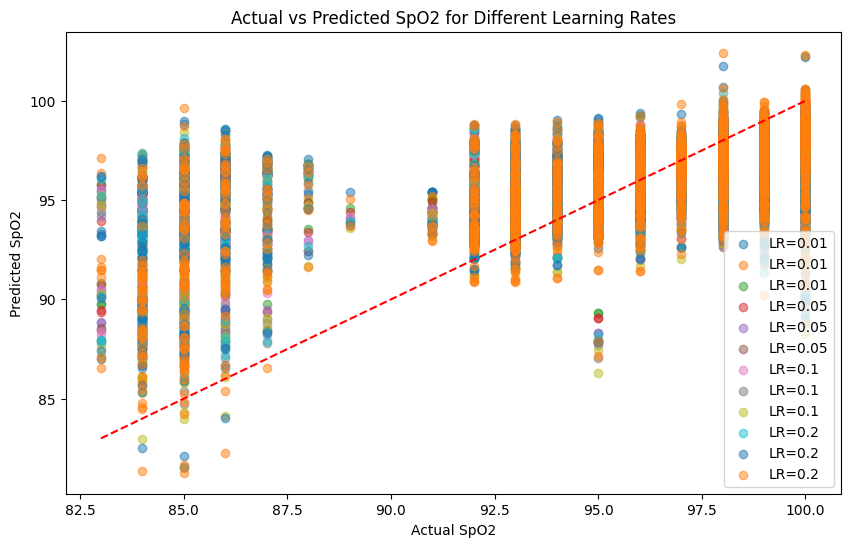

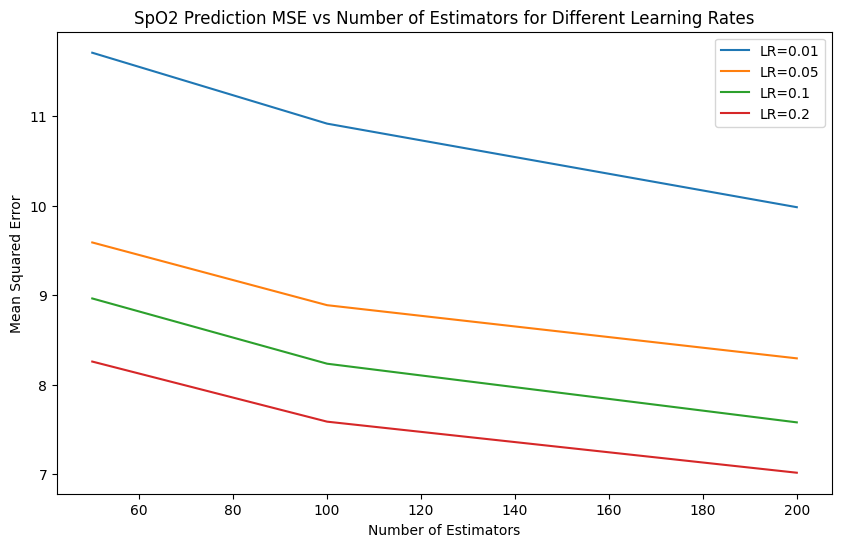

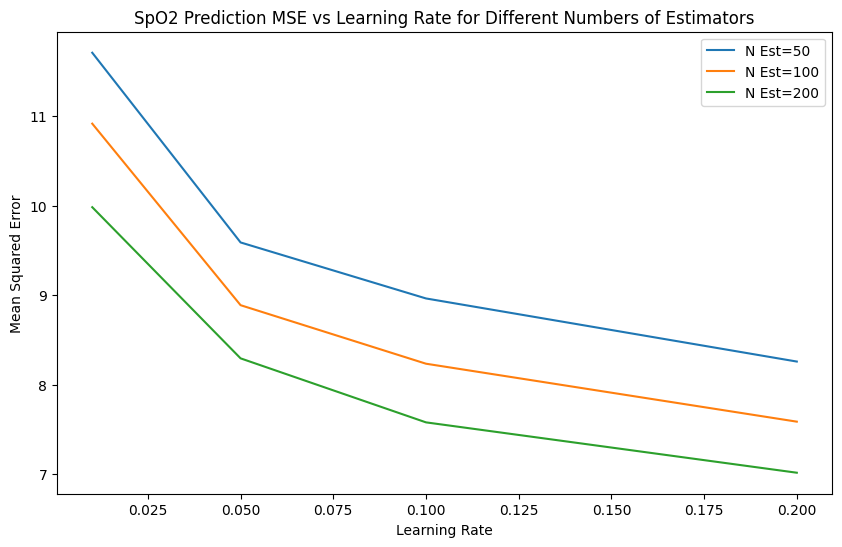

In [ ]:
import pandas as pd
import numpy as np
import glob
import os
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Correct data path
data_path = "./drive/MyDrive/PulseOxData/bidmc-ppg-and-respiration-dataset-1.0.0/bidmc_csv/"

# Verify if the directory exists
if os.path.exists(data_path):
    print(f"Data path exists: {data_path}")
else:
    print(f"Data path does NOT exist: {data_path}")

# Initialize lists to hold the aggregated data
x_values = []
y_values = []

# Use glob to find all signal and numeric files
signal_files = glob.glob(os.path.join(data_path, "bidmc_*_Signals.csv"))

print(f"Found {len(signal_files)} signal files.")

for signal_file in signal_files:
    # Extract patient id from file name
    pid = int(signal_file.split("_")[-2])
    numerics_file = signal_file.replace("_Signals.csv", "_Numerics.csv")

    print(f"Processing files for patient {pid}:")
    print(f"  Signal file: {signal_file}")
    print(f"  Numerics file: {numerics_file}")

    # Load the data
    try:
        signal_df = pd.read_csv(signal_file)
        numerics_df = pd.read_csv(numerics_file)
    except FileNotFoundError:
        print(f'  Files for patient {pid} not found.')
        continue

    print(f"  Loaded signal_df with shape: {signal_df.shape}")
    print(f"  Loaded numerics_df with shape: {numerics_df.shape}")

    # Strip leading/trailing spaces from column names
    signal_df.columns = signal_df.columns.str.strip()
    numerics_df.columns = numerics_df.columns.str.strip()

    # Print the columns of the DataFrames to verify
    print(f"  signal_df columns: {signal_df.columns}")
    print(f"  numerics_df columns: {numerics_df.columns}")

    # Merge the dataframes on the 'Time [s]' column
    merged_df = pd.merge(signal_df, numerics_df, on='Time [s]')

    print(f"  Merged dataframe shape: {merged_df.shape}")
    print(f"  Merged dataframe columns: {merged_df.columns}")

    # Specify the columns to use
    signal_columns = ['PLETH', 'II', 'AVR', 'CVP']
    numeric_column = 'SpO2'

    # Check for missing values in the numeric column - instead of skipping whole patient, just remove the rows with missing data from the patient - drop n stage
    if merged_df[numeric_column].isna().any():
        print(f"  Missing values in {numeric_column}, skipping patient {pid}.")
        continue

    # Filter common columns to those that are present in the merged dataframe
    available_columns = [col for col in signal_columns if col in merged_df.columns]
    if not available_columns:
        print(f"  No available signal columns in merged dataframe, skipping patient {pid}.")
        continue

    # Append the values to the lists
    x_values.extend(merged_df[available_columns].dropna().values.tolist())
    y_values.extend(merged_df[numeric_column].dropna().values.tolist())

    print(f"  Appended data, current X shape: {len(x_values)}, current y shape: {len(y_values)}")

# Convert lists to numpy arrays
X = np.array([np.array(x) for x in x_values if len(x) == len(available_columns)])
y = np.array(y_values[:len(X)])

# Ensure y has no NaN values and matches the shape of X
y = y[~np.isnan(y)]
X = X[:len(y)]

# Check the shapes
print(f'Final X.shape: {X.shape}')
print(f'Final y.shape: {y.shape}')

# Check if there's enough data to split
if len(X) == 0 or len(y) == 0:
    print("Insufficient data for model training.")
else:
    # Split the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Define parameter ranges
    learning_rates = [0.01, 0.05, 0.1, 0.2]
    n_estimators = [50, 100, 200]

    # Initialize a list to store results
    results = []

    # Initialize dictionaries to store predictions for plotting
    predictions_dict_lr = {lr: [] for lr in learning_rates}
    predictions_dict_nest = {n_est: [] for n_est in n_estimators}

    # Loop through parameter ranges
    for lr in learning_rates:
        for n_est in n_estimators:
            # Train the model
            gbr = GradientBoostingRegressor(
                loss='squared_error',
                learning_rate=lr,
                n_estimators=n_est,
                subsample=1.0,
                criterion='friedman_mse',
                min_samples_split=2,
                min_samples_leaf=1,
                max_depth=3,
                min_impurity_decrease=0.0,
                init=None,
                random_state=None,
                max_features=None,
                alpha=0.9,
                verbose=0,
                max_leaf_nodes=None,
                warm_start=False,
                validation_fraction=0.1,
                n_iter_no_change=None,
                tol=0.0001,
                ccp_alpha=0.0
            )

            gbr.fit(X_train, y_train)

            # Predict and calculate the error
            y_train_pred = gbr.predict(X_train)
            y_test_pred = gbr.predict(X_test)
            train_mse = mean_squared_error(y_train, y_train_pred)
            test_mse = mean_squared_error(y_test, y_test_pred)

            # Store the results
            results.append({
                'learning_rate': lr,
                'n_estimators': n_est,
                'train_mse': train_mse,
                'test_mse': test_mse
            })

            # Store predictions for plotting
            predictions_dict_lr[lr].append((y_test, y_test_pred))
            predictions_dict_nest[n_est].append((y_test, y_test_pred))

    # Convert results to a DataFrame
    results_df = pd.DataFrame(results)

    # Display the results
    print(results_df)

    # Plot Actual vs Predicted
    plt.figure(figsize=(10, 6))
    for lr in learning_rates:
        for (y_true, y_pred) in predictions_dict_lr[lr]:
            plt.scatter(y_true, y_pred, alpha=0.5, label=f'LR={lr}')
    plt.plot([min(y), max(y)], [min(y), max(y)], 'r--')
    plt.xlabel('Actual SpO2')
    plt.ylabel('Predicted SpO2')
    plt.title('Actual vs Predicted SpO2 for Different Learning Rates')
    plt.legend()
    plt.show()

    # Plot SpO2 prediction based on learning rate differences
    plt.figure(figsize=(10, 6))
    for lr in learning_rates:
        mses = [result['test_mse'] for result in results if result['learning_rate'] == lr]
        plt.plot(n_estimators, mses, label=f'LR={lr}')
    plt.xlabel('Number of Estimators')
    plt.ylabel('Mean Squared Error')
    plt.title('SpO2 Prediction MSE vs Number of Estimators for Different Learning Rates')
    plt.legend()
    plt.show()

    # Plot SpO2 prediction based on n-estimators differences
    plt.figure(figsize=(10, 6))
    for n_est in n_estimators:
        mses = [result['test_mse'] for result in results if result['n_estimators'] == n_est]
        plt.plot(learning_rates, mses, label=f'N Est={n_est}')
    plt.xlabel('Learning Rate')
    plt.ylabel('Mean Squared Error')
    plt.title('SpO2 Prediction MSE vs Learning Rate for Different Numbers of Estimators')
    plt.legend()
    plt.show()


Data path exists: ./drive/MyDrive/PulseOxData/bidmc-ppg-and-respiration-dataset-1.0.0/bidmc_csv/
Found 53 signal files.
Processing files for patient 12:
  Signal file: ./drive/MyDrive/PulseOxData/bidmc-ppg-and-respiration-dataset-1.0.0/bidmc_csv/bidmc_12_Signals.csv
  Numerics file: ./drive/MyDrive/PulseOxData/bidmc-ppg-and-respiration-dataset-1.0.0/bidmc_csv/bidmc_12_Numerics.csv
  Loaded signal_df with shape: (60001, 6)
  Loaded numerics_df with shape: (481, 5)
  signal_df columns: Index(['Time [s]', 'RESP', 'PLETH', 'II', 'V', 'AVR'], dtype='object')
  numerics_df columns: Index(['Time [s]', 'HR', 'PULSE', 'RESP', 'SpO2'], dtype='object')
  Merged dataframe shape: (481, 10)
  Merged dataframe columns: Index(['Time [s]', 'RESP_x', 'PLETH', 'II', 'V', 'AVR', 'HR', 'PULSE',
       'RESP_y', 'SpO2'],
      dtype='object')
  Appended data, current X shape: 481, current y shape: 481
Processing files for patient 48:
  Signal file: ./drive/MyDrive/PulseOxData/bidmc-ppg-and-respiration-datas

<ipython-input-5-94127ff269be>:57: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  merged_df = pd.merge(signal_df, numerics_df, on='Time [s]')
<ipython-input-5-94127ff269be>:57: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  merged_df = pd.merge(signal_df, numerics_df, on='Time [s]')
<ipython-input-5-94127ff269be>:57: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  merged_df = pd.merge(signal_df, numerics_df, on='Time [s]')


  Loaded signal_df with shape: (60001, 8)
  Loaded numerics_df with shape: (481, 5)
  signal_df columns: Index(['Time [s]', 'RESP', 'ABP', 'PLETH', 'II', 'V', 'AVR', 'CVP'], dtype='object')
  numerics_df columns: Index(['Time [s]', 'HR', 'PULSE', 'RESP', 'SpO2'], dtype='object')
  Merged dataframe shape: (481, 12)
  Merged dataframe columns: Index(['Time [s]', 'RESP_x', 'ABP', 'PLETH', 'II', 'V', 'AVR', 'CVP', 'HR',
       'PULSE', 'RESP_y', 'SpO2'],
      dtype='object')
  Appended data, current X shape: 1443, current y shape: 1443
Processing files for patient 38:
  Signal file: ./drive/MyDrive/PulseOxData/bidmc-ppg-and-respiration-dataset-1.0.0/bidmc_csv/bidmc_38_Signals.csv
  Numerics file: ./drive/MyDrive/PulseOxData/bidmc-ppg-and-respiration-dataset-1.0.0/bidmc_csv/bidmc_38_Numerics.csv
  Loaded signal_df with shape: (60001, 6)
  Loaded numerics_df with shape: (481, 5)
  signal_df columns: Index(['Time [s]', 'RESP', 'PLETH', 'I', 'MCL', 'II'], dtype='object')
  numerics_df columns

<ipython-input-5-94127ff269be>:57: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  merged_df = pd.merge(signal_df, numerics_df, on='Time [s]')
<ipython-input-5-94127ff269be>:57: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  merged_df = pd.merge(signal_df, numerics_df, on='Time [s]')
<ipython-input-5-94127ff269be>:57: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  merged_df = pd.merge(signal_df, numerics_df, on='Time [s]')


  Loaded signal_df with shape: (60001, 8)
  Loaded numerics_df with shape: (481, 5)
  signal_df columns: Index(['Time [s]', 'RESP', 'PLETH', 'II', 'V', 'AVR', 'CVP', 'ART'], dtype='object')
  numerics_df columns: Index(['Time [s]', 'HR', 'PULSE', 'RESP', 'SpO2'], dtype='object')
  Merged dataframe shape: (481, 12)
  Merged dataframe columns: Index(['Time [s]', 'RESP_x', 'PLETH', 'II', 'V', 'AVR', 'CVP', 'ART', 'HR',
       'PULSE', 'RESP_y', 'SpO2'],
      dtype='object')
  Appended data, current X shape: 2873, current y shape: 2873
Processing files for patient 51:
  Signal file: ./drive/MyDrive/PulseOxData/bidmc-ppg-and-respiration-dataset-1.0.0/bidmc_csv/bidmc_51_Signals.csv
  Numerics file: ./drive/MyDrive/PulseOxData/bidmc-ppg-and-respiration-dataset-1.0.0/bidmc_csv/bidmc_51_Numerics.csv
  Loaded signal_df with shape: (60001, 6)
  Loaded numerics_df with shape: (481, 5)
  signal_df columns: Index(['Time [s]', 'RESP', 'II', 'V', 'AVR', 'PLETH'], dtype='object')
  numerics_df columns

<ipython-input-5-94127ff269be>:57: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  merged_df = pd.merge(signal_df, numerics_df, on='Time [s]')
<ipython-input-5-94127ff269be>:57: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  merged_df = pd.merge(signal_df, numerics_df, on='Time [s]')
<ipython-input-5-94127ff269be>:57: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  merged_df = pd.merge(signal_df, numerics_df, on='Time [s]')


  Loaded signal_df with shape: (60001, 6)
  Loaded numerics_df with shape: (481, 5)
  signal_df columns: Index(['Time [s]', 'RESP', 'PLETH', 'II', 'V', 'AVR'], dtype='object')
  numerics_df columns: Index(['Time [s]', 'HR', 'PULSE', 'RESP', 'SpO2'], dtype='object')
  Merged dataframe shape: (481, 10)
  Merged dataframe columns: Index(['Time [s]', 'RESP_x', 'PLETH', 'II', 'V', 'AVR', 'HR', 'PULSE',
       'RESP_y', 'SpO2'],
      dtype='object')
  Appended data, current X shape: 4316, current y shape: 4316
Processing files for patient 49:
  Signal file: ./drive/MyDrive/PulseOxData/bidmc-ppg-and-respiration-dataset-1.0.0/bidmc_csv/bidmc_49_Signals.csv
  Numerics file: ./drive/MyDrive/PulseOxData/bidmc-ppg-and-respiration-dataset-1.0.0/bidmc_csv/bidmc_49_Numerics.csv
  Loaded signal_df with shape: (60001, 6)
  Loaded numerics_df with shape: (481, 5)
  signal_df columns: Index(['Time [s]', 'RESP', 'PLETH', 'II', 'MCL', 'AVR'], dtype='object')
  numerics_df columns: Index(['Time [s]', 'HR',

<ipython-input-5-94127ff269be>:57: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  merged_df = pd.merge(signal_df, numerics_df, on='Time [s]')
<ipython-input-5-94127ff269be>:57: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  merged_df = pd.merge(signal_df, numerics_df, on='Time [s]')
<ipython-input-5-94127ff269be>:57: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  merged_df = pd.merge(signal_df, numerics_df, on='Time [s]')


  Loaded signal_df with shape: (60001, 6)
  Loaded numerics_df with shape: (481, 5)
  signal_df columns: Index(['Time [s]', 'RESP', 'PLETH', 'II', 'V', 'AVR'], dtype='object')
  numerics_df columns: Index(['Time [s]', 'HR', 'PULSE', 'RESP', 'SpO2'], dtype='object')
  Merged dataframe shape: (481, 10)
  Merged dataframe columns: Index(['Time [s]', 'RESP_x', 'PLETH', 'II', 'V', 'AVR', 'HR', 'PULSE',
       'RESP_y', 'SpO2'],
      dtype='object')
  Appended data, current X shape: 5759, current y shape: 5759
Processing files for patient 47:
  Signal file: ./drive/MyDrive/PulseOxData/bidmc-ppg-and-respiration-dataset-1.0.0/bidmc_csv/bidmc_47_Signals.csv
  Numerics file: ./drive/MyDrive/PulseOxData/bidmc-ppg-and-respiration-dataset-1.0.0/bidmc_csv/bidmc_47_Numerics.csv
  Loaded signal_df with shape: (60001, 7)
  Loaded numerics_df with shape: (481, 5)
  signal_df columns: Index(['Time [s]', 'RESP', 'ABP', 'PLETH', 'II', 'III', 'V'], dtype='object')
  numerics_df columns: Index(['Time [s]', 

<ipython-input-5-94127ff269be>:57: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  merged_df = pd.merge(signal_df, numerics_df, on='Time [s]')
<ipython-input-5-94127ff269be>:57: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  merged_df = pd.merge(signal_df, numerics_df, on='Time [s]')
<ipython-input-5-94127ff269be>:57: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  merged_df = pd.merge(signal_df, numerics_df, on='Time [s]')


  Loaded signal_df with shape: (60001, 6)
  Loaded numerics_df with shape: (481, 5)
  signal_df columns: Index(['Time [s]', 'RESP', 'II', 'V', 'AVR', 'PLETH'], dtype='object')
  numerics_df columns: Index(['Time [s]', 'HR', 'PULSE', 'RESP', 'SpO2'], dtype='object')
  Merged dataframe shape: (481, 10)
  Merged dataframe columns: Index(['Time [s]', 'RESP_x', 'II', 'V', 'AVR', 'PLETH', 'HR', 'PULSE',
       'RESP_y', 'SpO2'],
      dtype='object')
  Appended data, current X shape: 7202, current y shape: 7202
Processing files for patient 17:
  Signal file: ./drive/MyDrive/PulseOxData/bidmc-ppg-and-respiration-dataset-1.0.0/bidmc_csv/bidmc_17_Signals.csv
  Numerics file: ./drive/MyDrive/PulseOxData/bidmc-ppg-and-respiration-dataset-1.0.0/bidmc_csv/bidmc_17_Numerics.csv
  Loaded signal_df with shape: (60001, 6)
  Loaded numerics_df with shape: (481, 5)
  signal_df columns: Index(['Time [s]', 'RESP', 'PLETH', 'II', 'V', 'AVR'], dtype='object')
  numerics_df columns: Index(['Time [s]', 'HR', '

<ipython-input-5-94127ff269be>:57: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  merged_df = pd.merge(signal_df, numerics_df, on='Time [s]')
<ipython-input-5-94127ff269be>:57: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  merged_df = pd.merge(signal_df, numerics_df, on='Time [s]')
<ipython-input-5-94127ff269be>:57: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  merged_df = pd.merge(signal_df, numerics_df, on='Time [s]')


  Loaded signal_df with shape: (60001, 6)
  Loaded numerics_df with shape: (481, 5)
  signal_df columns: Index(['Time [s]', 'RESP', 'PLETH', 'II', 'V', 'AVR'], dtype='object')
  numerics_df columns: Index(['Time [s]', 'HR', 'PULSE', 'RESP', 'SpO2'], dtype='object')
  Merged dataframe shape: (481, 10)
  Merged dataframe columns: Index(['Time [s]', 'RESP_x', 'PLETH', 'II', 'V', 'AVR', 'HR', 'PULSE',
       'RESP_y', 'SpO2'],
      dtype='object')
  Appended data, current X shape: 8645, current y shape: 8645
Processing files for patient 3:
  Signal file: ./drive/MyDrive/PulseOxData/bidmc-ppg-and-respiration-dataset-1.0.0/bidmc_csv/bidmc_03_Signals.csv
  Numerics file: ./drive/MyDrive/PulseOxData/bidmc-ppg-and-respiration-dataset-1.0.0/bidmc_csv/bidmc_03_Numerics.csv
  Loaded signal_df with shape: (60001, 7)
  Loaded numerics_df with shape: (481, 5)
  signal_df columns: Index(['Time [s]', 'RESP', 'PLETH', 'II', 'V', 'AVR', 'CVP'], dtype='object')
  numerics_df columns: Index(['Time [s]', '

<ipython-input-5-94127ff269be>:57: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  merged_df = pd.merge(signal_df, numerics_df, on='Time [s]')
<ipython-input-5-94127ff269be>:57: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  merged_df = pd.merge(signal_df, numerics_df, on='Time [s]')
<ipython-input-5-94127ff269be>:57: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  merged_df = pd.merge(signal_df, numerics_df, on='Time [s]')


  Loaded signal_df with shape: (60001, 6)
  Loaded numerics_df with shape: (481, 5)
  signal_df columns: Index(['Time [s]', 'RESP', 'PLETH', 'II', 'V', 'AVR'], dtype='object')
  numerics_df columns: Index(['Time [s]', 'HR', 'PULSE', 'RESP', 'SpO2'], dtype='object')
  Merged dataframe shape: (481, 10)
  Merged dataframe columns: Index(['Time [s]', 'RESP_x', 'PLETH', 'II', 'V', 'AVR', 'HR', 'PULSE',
       'RESP_y', 'SpO2'],
      dtype='object')
  Appended data, current X shape: 10088, current y shape: 10088
Processing files for patient 39:
  Signal file: ./drive/MyDrive/PulseOxData/bidmc-ppg-and-respiration-dataset-1.0.0/bidmc_csv/bidmc_39_Signals.csv
  Numerics file: ./drive/MyDrive/PulseOxData/bidmc-ppg-and-respiration-dataset-1.0.0/bidmc_csv/bidmc_39_Numerics.csv
  Loaded signal_df with shape: (60001, 6)
  Loaded numerics_df with shape: (481, 5)
  signal_df columns: Index(['Time [s]', 'I', 'RESP', 'II', 'V', 'PLETH'], dtype='object')
  numerics_df columns: Index(['Time [s]', 'HR', '

<ipython-input-5-94127ff269be>:57: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  merged_df = pd.merge(signal_df, numerics_df, on='Time [s]')
<ipython-input-5-94127ff269be>:57: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  merged_df = pd.merge(signal_df, numerics_df, on='Time [s]')
<ipython-input-5-94127ff269be>:57: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  merged_df = pd.merge(signal_df, numerics_df, on='Time [s]')


  Merged dataframe shape: (481, 10)
  Merged dataframe columns: Index(['Time [s]', 'RESP_x', 'PLETH', 'I', 'MCL', 'II', 'HR', 'PULSE',
       'RESP_y', 'SpO2'],
      dtype='object')
  Appended data, current X shape: 11531, current y shape: 11531
Processing files for patient 25:
  Signal file: ./drive/MyDrive/PulseOxData/bidmc-ppg-and-respiration-dataset-1.0.0/bidmc_csv/bidmc_25_Signals.csv
  Numerics file: ./drive/MyDrive/PulseOxData/bidmc-ppg-and-respiration-dataset-1.0.0/bidmc_csv/bidmc_25_Numerics.csv
  Loaded signal_df with shape: (60001, 6)
  Loaded numerics_df with shape: (481, 5)
  signal_df columns: Index(['Time [s]', 'RESP', 'PLETH', 'II', 'V', 'AVR'], dtype='object')
  numerics_df columns: Index(['Time [s]', 'HR', 'PULSE', 'RESP', 'SpO2'], dtype='object')
  Merged dataframe shape: (481, 10)
  Merged dataframe columns: Index(['Time [s]', 'RESP_x', 'PLETH', 'II', 'V', 'AVR', 'HR', 'PULSE',
       'RESP_y', 'SpO2'],
      dtype='object')
  Appended data, current X shape: 12011,

<ipython-input-5-94127ff269be>:57: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  merged_df = pd.merge(signal_df, numerics_df, on='Time [s]')
<ipython-input-5-94127ff269be>:57: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  merged_df = pd.merge(signal_df, numerics_df, on='Time [s]')
<ipython-input-5-94127ff269be>:57: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  merged_df = pd.merge(signal_df, numerics_df, on='Time [s]')


  Loaded signal_df with shape: (60001, 6)
  Loaded numerics_df with shape: (481, 5)
  signal_df columns: Index(['Time [s]', 'PLETH', 'RESP', 'II', 'V', 'AVR'], dtype='object')
  numerics_df columns: Index(['Time [s]', 'HR', 'PULSE', 'RESP', 'SpO2'], dtype='object')
  Merged dataframe shape: (481, 10)
  Merged dataframe columns: Index(['Time [s]', 'PLETH', 'RESP_x', 'II', 'V', 'AVR', 'HR', 'PULSE',
       'RESP_y', 'SpO2'],
      dtype='object')
  Appended data, current X shape: 12967, current y shape: 12967
Processing files for patient 46:
  Signal file: ./drive/MyDrive/PulseOxData/bidmc-ppg-and-respiration-dataset-1.0.0/bidmc_csv/bidmc_46_Signals.csv
  Numerics file: ./drive/MyDrive/PulseOxData/bidmc-ppg-and-respiration-dataset-1.0.0/bidmc_csv/bidmc_46_Numerics.csv
  Loaded signal_df with shape: (60001, 6)
  Loaded numerics_df with shape: (481, 5)
  signal_df columns: Index(['Time [s]', 'PLETH', 'RESP', 'II', 'V', 'AVR'], dtype='object')
  numerics_df columns: Index(['Time [s]', 'HR',

<ipython-input-5-94127ff269be>:57: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  merged_df = pd.merge(signal_df, numerics_df, on='Time [s]')
<ipython-input-5-94127ff269be>:57: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  merged_df = pd.merge(signal_df, numerics_df, on='Time [s]')
<ipython-input-5-94127ff269be>:57: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  merged_df = pd.merge(signal_df, numerics_df, on='Time [s]')


  Loaded signal_df with shape: (60001, 6)
  Loaded numerics_df with shape: (481, 5)
  signal_df columns: Index(['Time [s]', 'RESP', 'PLETH', 'II', 'V', 'AVR'], dtype='object')
  numerics_df columns: Index(['Time [s]', 'HR', 'PULSE', 'RESP', 'SpO2'], dtype='object')
  Merged dataframe shape: (481, 10)
  Merged dataframe columns: Index(['Time [s]', 'RESP_x', 'PLETH', 'II', 'V', 'AVR', 'HR', 'PULSE',
       'RESP_y', 'SpO2'],
      dtype='object')
  Appended data, current X shape: 14410, current y shape: 14410
Processing files for patient 53:
  Signal file: ./drive/MyDrive/PulseOxData/bidmc-ppg-and-respiration-dataset-1.0.0/bidmc_csv/bidmc_53_Signals.csv
  Numerics file: ./drive/MyDrive/PulseOxData/bidmc-ppg-and-respiration-dataset-1.0.0/bidmc_csv/bidmc_53_Numerics.csv
  Loaded signal_df with shape: (60001, 6)
  Loaded numerics_df with shape: (481, 5)
  signal_df columns: Index(['Time [s]', 'RESP', 'II', 'V', 'AVR', 'PLETH'], dtype='object')
  numerics_df columns: Index(['Time [s]', 'HR',

<ipython-input-5-94127ff269be>:57: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  merged_df = pd.merge(signal_df, numerics_df, on='Time [s]')
<ipython-input-5-94127ff269be>:57: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  merged_df = pd.merge(signal_df, numerics_df, on='Time [s]')
<ipython-input-5-94127ff269be>:57: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  merged_df = pd.merge(signal_df, numerics_df, on='Time [s]')


  Loaded signal_df with shape: (60001, 8)
  Loaded numerics_df with shape: (481, 5)
  signal_df columns: Index(['Time [s]', 'RESP', 'ABP', 'CVP', 'PLETH', 'II', 'V', 'AVR'], dtype='object')
  numerics_df columns: Index(['Time [s]', 'HR', 'PULSE', 'RESP', 'SpO2'], dtype='object')
  Merged dataframe shape: (481, 12)
  Merged dataframe columns: Index(['Time [s]', 'RESP_x', 'ABP', 'CVP', 'PLETH', 'II', 'V', 'AVR', 'HR',
       'PULSE', 'RESP_y', 'SpO2'],
      dtype='object')
  Appended data, current X shape: 15853, current y shape: 15853
Processing files for patient 29:
  Signal file: ./drive/MyDrive/PulseOxData/bidmc-ppg-and-respiration-dataset-1.0.0/bidmc_csv/bidmc_29_Signals.csv
  Numerics file: ./drive/MyDrive/PulseOxData/bidmc-ppg-and-respiration-dataset-1.0.0/bidmc_csv/bidmc_29_Numerics.csv
  Loaded signal_df with shape: (60001, 7)
  Loaded numerics_df with shape: (481, 5)
  signal_df columns: Index(['Time [s]', 'RESP', 'PLETH', 'CVP', 'II', 'V', 'AVR'], dtype='object')
  numerics_d

<ipython-input-5-94127ff269be>:57: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  merged_df = pd.merge(signal_df, numerics_df, on='Time [s]')
<ipython-input-5-94127ff269be>:57: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  merged_df = pd.merge(signal_df, numerics_df, on='Time [s]')
<ipython-input-5-94127ff269be>:57: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  merged_df = pd.merge(signal_df, numerics_df, on='Time [s]')


  Loaded signal_df with shape: (60001, 7)
  Loaded numerics_df with shape: (481, 5)
  signal_df columns: Index(['Time [s]', 'RESP', 'PLETH', 'I', 'V', 'II', 'ABP'], dtype='object')
  numerics_df columns: Index(['Time [s]', 'HR', 'PULSE', 'RESP', 'SpO2'], dtype='object')
  Merged dataframe shape: (481, 11)
  Merged dataframe columns: Index(['Time [s]', 'RESP_x', 'PLETH', 'I', 'V', 'II', 'ABP', 'HR', 'PULSE',
       'RESP_y', 'SpO2'],
      dtype='object')
  Appended data, current X shape: 17296, current y shape: 17296
Processing files for patient 50:
  Signal file: ./drive/MyDrive/PulseOxData/bidmc-ppg-and-respiration-dataset-1.0.0/bidmc_csv/bidmc_50_Signals.csv
  Numerics file: ./drive/MyDrive/PulseOxData/bidmc-ppg-and-respiration-dataset-1.0.0/bidmc_csv/bidmc_50_Numerics.csv
  Loaded signal_df with shape: (60001, 6)
  Loaded numerics_df with shape: (481, 5)
  signal_df columns: Index(['Time [s]', 'PLETH', 'RESP', 'II', 'V', 'AVR'], dtype='object')
  numerics_df columns: Index(['Time [

<ipython-input-5-94127ff269be>:57: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  merged_df = pd.merge(signal_df, numerics_df, on='Time [s]')
<ipython-input-5-94127ff269be>:57: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  merged_df = pd.merge(signal_df, numerics_df, on='Time [s]')
<ipython-input-5-94127ff269be>:57: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  merged_df = pd.merge(signal_df, numerics_df, on='Time [s]')


  Merged dataframe shape: (481, 10)
  Merged dataframe columns: Index(['Time [s]', 'RESP_x', 'PLETH', 'II', 'V', 'AVR', 'HR', 'PULSE',
       'RESP_y', 'SpO2'],
      dtype='object')
  Appended data, current X shape: 18739, current y shape: 18739
Processing files for patient 20:
  Signal file: ./drive/MyDrive/PulseOxData/bidmc-ppg-and-respiration-dataset-1.0.0/bidmc_csv/bidmc_20_Signals.csv
  Numerics file: ./drive/MyDrive/PulseOxData/bidmc-ppg-and-respiration-dataset-1.0.0/bidmc_csv/bidmc_20_Numerics.csv
  Loaded signal_df with shape: (60001, 6)
  Loaded numerics_df with shape: (481, 5)
  signal_df columns: Index(['Time [s]', 'RESP', 'PLETH', 'II', 'V', 'AVR'], dtype='object')
  numerics_df columns: Index(['Time [s]', 'HR', 'PULSE', 'RESP', 'SpO2'], dtype='object')
  Merged dataframe shape: (481, 10)
  Merged dataframe columns: Index(['Time [s]', 'RESP_x', 'PLETH', 'II', 'V', 'AVR', 'HR', 'PULSE',
       'RESP_y', 'SpO2'],
      dtype='object')
  Appended data, current X shape: 19220,

<ipython-input-5-94127ff269be>:57: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  merged_df = pd.merge(signal_df, numerics_df, on='Time [s]')
<ipython-input-5-94127ff269be>:57: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  merged_df = pd.merge(signal_df, numerics_df, on='Time [s]')
<ipython-input-5-94127ff269be>:57: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  merged_df = pd.merge(signal_df, numerics_df, on='Time [s]')


  Loaded signal_df with shape: (60001, 7)
  Loaded numerics_df with shape: (481, 5)
  signal_df columns: Index(['Time [s]', 'RESP', 'PLETH', 'II', 'V', 'AVR', 'ABP'], dtype='object')
  numerics_df columns: Index(['Time [s]', 'HR', 'PULSE', 'RESP', 'SpO2'], dtype='object')
  Merged dataframe shape: (481, 11)
  Merged dataframe columns: Index(['Time [s]', 'RESP_x', 'PLETH', 'II', 'V', 'AVR', 'ABP', 'HR', 'PULSE',
       'RESP_y', 'SpO2'],
      dtype='object')
  Appended data, current X shape: 20182, current y shape: 20182
Processing files for patient 45:
  Signal file: ./drive/MyDrive/PulseOxData/bidmc-ppg-and-respiration-dataset-1.0.0/bidmc_csv/bidmc_45_Signals.csv
  Numerics file: ./drive/MyDrive/PulseOxData/bidmc-ppg-and-respiration-dataset-1.0.0/bidmc_csv/bidmc_45_Numerics.csv
  Loaded signal_df with shape: (60001, 6)
  Loaded numerics_df with shape: (481, 5)
  signal_df columns: Index(['Time [s]', 'RESP', 'II', 'V', 'AVR', 'PLETH'], dtype='object')
  numerics_df columns: Index(['Ti

<ipython-input-5-94127ff269be>:57: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  merged_df = pd.merge(signal_df, numerics_df, on='Time [s]')
<ipython-input-5-94127ff269be>:57: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  merged_df = pd.merge(signal_df, numerics_df, on='Time [s]')
<ipython-input-5-94127ff269be>:57: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  merged_df = pd.merge(signal_df, numerics_df, on='Time [s]')


  Loaded signal_df with shape: (60001, 7)
  Loaded numerics_df with shape: (481, 5)
  signal_df columns: Index(['Time [s]', 'PLETH', 'ABP', 'RESP', 'II', 'V', 'AVR'], dtype='object')
  numerics_df columns: Index(['Time [s]', 'HR', 'PULSE', 'RESP', 'SpO2'], dtype='object')
  Merged dataframe shape: (480, 11)
  Merged dataframe columns: Index(['Time [s]', 'PLETH', 'ABP', 'RESP_x', 'II', 'V', 'AVR', 'HR', 'PULSE',
       'RESP_y', 'SpO2'],
      dtype='object')
  Appended data, current X shape: 21624, current y shape: 21624
Processing files for patient 33:
  Signal file: ./drive/MyDrive/PulseOxData/bidmc-ppg-and-respiration-dataset-1.0.0/bidmc_csv/bidmc_33_Signals.csv
  Numerics file: ./drive/MyDrive/PulseOxData/bidmc-ppg-and-respiration-dataset-1.0.0/bidmc_csv/bidmc_33_Numerics.csv
  Loaded signal_df with shape: (60001, 6)
  Loaded numerics_df with shape: (481, 5)
  signal_df columns: Index(['Time [s]', 'RESP', 'II', 'V', 'AVR', 'PLETH'], dtype='object')
  numerics_df columns: Index(['Ti

<ipython-input-5-94127ff269be>:57: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  merged_df = pd.merge(signal_df, numerics_df, on='Time [s]')
<ipython-input-5-94127ff269be>:57: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  merged_df = pd.merge(signal_df, numerics_df, on='Time [s]')
<ipython-input-5-94127ff269be>:57: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  merged_df = pd.merge(signal_df, numerics_df, on='Time [s]')


  Loaded signal_df with shape: (60001, 6)
  Loaded numerics_df with shape: (481, 5)
  signal_df columns: Index(['Time [s]', 'II', 'PLETH', 'RESP', 'V', 'AVR'], dtype='object')
  numerics_df columns: Index(['Time [s]', 'HR', 'PULSE', 'RESP', 'SpO2'], dtype='object')
  Merged dataframe shape: (481, 10)
  Merged dataframe columns: Index(['Time [s]', 'II', 'PLETH', 'RESP_x', 'V', 'AVR', 'HR', 'PULSE',
       'RESP_y', 'SpO2'],
      dtype='object')
  Appended data, current X shape: 23067, current y shape: 23067
Processing files for patient 52:
  Signal file: ./drive/MyDrive/PulseOxData/bidmc-ppg-and-respiration-dataset-1.0.0/bidmc_csv/bidmc_52_Signals.csv
  Numerics file: ./drive/MyDrive/PulseOxData/bidmc-ppg-and-respiration-dataset-1.0.0/bidmc_csv/bidmc_52_Numerics.csv
  Loaded signal_df with shape: (60001, 6)
  Loaded numerics_df with shape: (481, 5)
  signal_df columns: Index(['Time [s]', 'PLETH', 'RESP', 'II', 'V', 'AVR'], dtype='object')
  numerics_df columns: Index(['Time [s]', 'HR',

<ipython-input-5-94127ff269be>:57: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  merged_df = pd.merge(signal_df, numerics_df, on='Time [s]')
<ipython-input-5-94127ff269be>:57: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  merged_df = pd.merge(signal_df, numerics_df, on='Time [s]')
<ipython-input-5-94127ff269be>:57: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  merged_df = pd.merge(signal_df, numerics_df, on='Time [s]')


  Loaded signal_df with shape: (60001, 7)
  Loaded numerics_df with shape: (481, 5)
  signal_df columns: Index(['Time [s]', 'PLETH', 'RESP', 'II', 'V', 'AVR', 'CVP'], dtype='object')
  numerics_df columns: Index(['Time [s]', 'HR', 'PULSE', 'RESP', 'SpO2'], dtype='object')
  Merged dataframe shape: (481, 11)
  Merged dataframe columns: Index(['Time [s]', 'PLETH', 'RESP_x', 'II', 'V', 'AVR', 'CVP', 'HR', 'PULSE',
       'RESP_y', 'SpO2'],
      dtype='object')
  Appended data, current X shape: 24504, current y shape: 24504
Processing files for patient 19:
  Signal file: ./drive/MyDrive/PulseOxData/bidmc-ppg-and-respiration-dataset-1.0.0/bidmc_csv/bidmc_19_Signals.csv
  Numerics file: ./drive/MyDrive/PulseOxData/bidmc-ppg-and-respiration-dataset-1.0.0/bidmc_csv/bidmc_19_Numerics.csv
  Loaded signal_df with shape: (60001, 6)
  Loaded numerics_df with shape: (481, 5)
  signal_df columns: Index(['Time [s]', 'RESP', 'II', 'V', 'AVR', 'PLETH'], dtype='object')
  numerics_df columns: Index(['Ti

<ipython-input-5-94127ff269be>:57: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  merged_df = pd.merge(signal_df, numerics_df, on='Time [s]')
<ipython-input-5-94127ff269be>:57: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  merged_df = pd.merge(signal_df, numerics_df, on='Time [s]')


    learning_rate  n_estimators  train_mse   test_mse
0            0.01            50  10.879428  10.144484
1            0.01           100  10.053902   9.442246
2            0.01           200   9.288661   8.826666
3            0.05            50   9.037788   8.628702
4            0.05           100   8.367872   8.158021
5            0.05           200   7.536077   7.526917
6            0.10            50   8.392412   8.173173
7            0.10           100   7.481716   7.469179
8            0.10           200   6.640648   6.929069
9            0.20            50   7.479490   7.428420
10           0.20           100   6.687494   6.951167
11           0.20           200   5.870786   6.519859


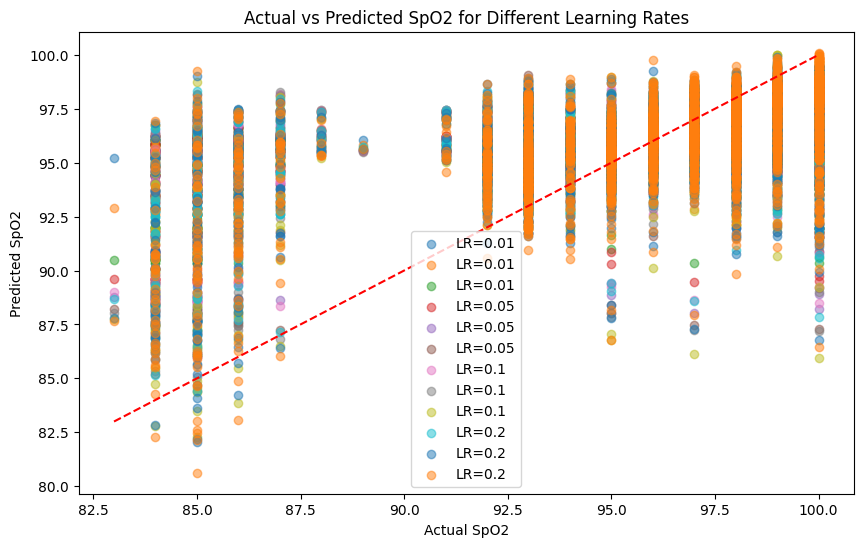

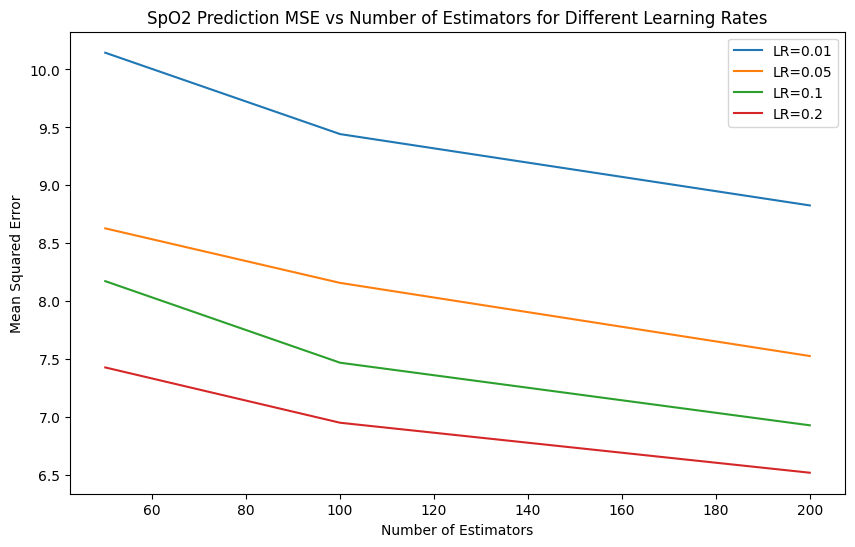

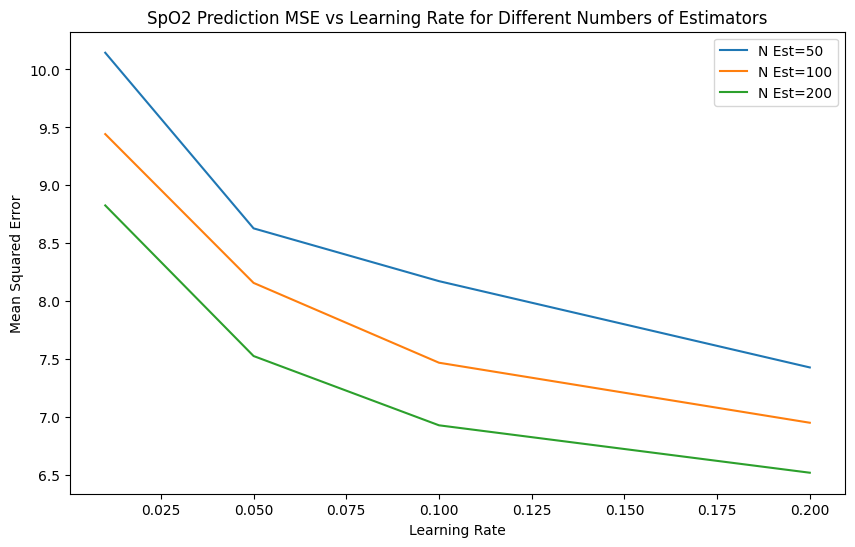

In [ ]:
import pandas as pd
import numpy as np
import glob
import os
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Correct data path
data_path = "./drive/MyDrive/PulseOxData/bidmc-ppg-and-respiration-dataset-1.0.0/bidmc_csv/"

# Verify if the directory exists
if os.path.exists(data_path):
    print(f"Data path exists: {data_path}")
else:
    print(f"Data path does NOT exist: {data_path}")

# Initialize lists to hold the aggregated data
x_values = []
y_values = []

# Use glob to find all signal and numeric files
signal_files = glob.glob(os.path.join(data_path, "bidmc_*_Signals.csv"))

print(f"Found {len(signal_files)} signal files.")

for signal_file in signal_files:
    # Extract patient id from file name
    pid = int(signal_file.split("_")[-2])
    numerics_file = signal_file.replace("_Signals.csv", "_Numerics.csv")

    print(f"Processing files for patient {pid}:")
    print(f"  Signal file: {signal_file}")
    print(f"  Numerics file: {numerics_file}")

    # Load the data
    try:
        signal_df = pd.read_csv(signal_file)
        numerics_df = pd.read_csv(numerics_file)
    except FileNotFoundError:
        print(f'  Files for patient {pid} not found.')
        continue

    print(f"  Loaded signal_df with shape: {signal_df.shape}")
    print(f"  Loaded numerics_df with shape: {numerics_df.shape}")

    # Strip leading/trailing spaces from column names
    signal_df.columns = signal_df.columns.str.strip()
    numerics_df.columns = numerics_df.columns.str.strip()

    # Print the columns of the DataFrames to verify
    print(f"  signal_df columns: {signal_df.columns}")
    print(f"  numerics_df columns: {numerics_df.columns}")

    # Merge the dataframes on the 'Time [s]' column
    merged_df = pd.merge(signal_df, numerics_df, on='Time [s]')

    print(f"  Merged dataframe shape: {merged_df.shape}")
    print(f"  Merged dataframe columns: {merged_df.columns}")

    # Specify the columns to use
    signal_columns = ['PLETH', 'II', 'AVR', 'CVP']
    numeric_column = 'SpO2'

    # Filter to only include the desired columns
    available_columns = [col for col in signal_columns if col in merged_df.columns]

    if not available_columns:
        print(f"  No available signal columns in merged dataframe, skipping patient {pid}.")
        continue

    # Drop rows with missing data in the selected columns
    merged_df = merged_df[available_columns + [numeric_column]].dropna()

    if merged_df.empty:
        print(f"  No valid data left after dropping rows with missing data, skipping patient {pid}.")
        continue

    # Append the values to the lists
    x_values.extend(merged_df[available_columns].values.tolist())
    y_values.extend(merged_df[numeric_column].values.tolist())

    print(f"  Appended data, current X shape: {len(x_values)}, current y shape: {len(y_values)}")

# Convert lists to numpy arrays
X = np.array([np.array(x) for x in x_values if len(x) == len(available_columns)])
y = np.array(y_values[:len(X)])

# Ensure y has no NaN values and matches the shape of X
y = y[~np.isnan(y)]
X = X[:len(y)]

# Check the shapes
print(f'Final X.shape: {X.shape}')
print(f'Final y.shape: {y.shape}')

# Check if there's enough data to split
if len(X) == 0 or len(y) == 0:
    print("Insufficient data for model training.")
else:
    # Split the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Define parameter ranges
    learning_rates = [0.01, 0.05, 0.1, 0.2]
    n_estimators = [50, 100, 200]

    # Initialize a list to store results
    results = []

    # Initialize dictionaries to store predictions for plotting
    predictions_dict_lr = {lr: [] for lr in learning_rates}
    predictions_dict_nest = {n_est: [] for n_est in n_estimators}

    # Loop through parameter ranges
    for lr in learning_rates:
        for n_est in n_estimators:
            # Train the model
            gbr = GradientBoostingRegressor(
                loss='squared_error',
                learning_rate=lr,
                n_estimators=n_est,
                subsample=1.0,
                criterion='friedman_mse',
                min_samples_split=2,
                min_samples_leaf=1,
                max_depth=3,
                min_impurity_decrease=0.0,
                init=None,
                random_state=None,
                max_features=None,
                alpha=0.9,
                verbose=0,
                max_leaf_nodes=None,
                warm_start=False,
                validation_fraction=0.1,
                n_iter_no_change=None,
                tol=0.0001,
                ccp_alpha=0.0
            )

            gbr.fit(X_train, y_train)

            # Predict and calculate the error
            y_train_pred = gbr.predict(X_train)
            y_test_pred = gbr.predict(X_test)
            train_mse = mean_squared_error(y_train, y_train_pred)
            test_mse = mean_squared_error(y_test, y_test_pred)

            # Store the results
            results.append({
                'learning_rate': lr,
                'n_estimators': n_est,
                'train_mse': train_mse,
                'test_mse': test_mse
            })

            # Store predictions for plotting
            predictions_dict_lr[lr].append((y_test, y_test_pred))
            predictions_dict_nest[n_est].append((y_test, y_test_pred))

    # Convert results to a DataFrame
    results_df = pd.DataFrame(results)

    # Display the results
    print(results_df)

    # Plot Actual vs Predicted
    plt.figure(figsize=(10, 6))
    for lr in learning_rates:
        for (y_true, y_pred) in predictions_dict_lr[lr]:
            plt.scatter(y_true, y_pred, alpha=0.5, label=f'LR={lr}')
    plt.plot([min(y), max(y)], [min(y), max(y)], 'r--')
    plt.xlabel('Actual SpO2')
    plt.ylabel('Predicted SpO2')
    plt.title('Actual vs Predicted SpO2 for Different Learning Rates')
    plt.legend()
    plt.show()

    # Plot SpO2 prediction based on learning rate differences
    plt.figure(figsize=(10, 6))
    for lr in learning_rates:
        mses = [result['test_mse'] for result in results if result['learning_rate'] == lr]
        plt.plot(n_estimators, mses, label=f'LR={lr}')
    plt.xlabel('Number of Estimators')
    plt.ylabel('Mean Squared Error')
    plt.title('SpO2 Prediction MSE vs Number of Estimators for Different Learning Rates')
    plt.legend()
    plt.show()

    # Plot SpO2 prediction based on n-estimators differences
    plt.figure(figsize=(10, 6))
    for n_est in n_estimators:
        mses = [result['test_mse'] for result in results if result['n_estimators'] == n_est]
        plt.plot(learning_rates, mses, label=f'N Est={n_est}')
    plt.xlabel('Learning Rate')
    plt.ylabel('Mean Squared Error')
    plt.title('SpO2 Prediction MSE vs Learning Rate for Different Numbers of Estimators')
    plt.legend()
    plt.show()


Data path exists: ./drive/MyDrive/PulseOxData/bidmc-ppg-and-respiration-dataset-1.0.0/bidmc_csv/
Found 53 signal files.
Processing files for patient 12:
  Signal file: ./drive/MyDrive/PulseOxData/bidmc-ppg-and-respiration-dataset-1.0.0/bidmc_csv/bidmc_12_Signals.csv
  Numerics file: ./drive/MyDrive/PulseOxData/bidmc-ppg-and-respiration-dataset-1.0.0/bidmc_csv/bidmc_12_Numerics.csv
  Loaded signal_df with shape: (60001, 6)
  Loaded numerics_df with shape: (481, 5)
  signal_df columns: Index(['Time [s]', 'RESP', 'PLETH', 'II', 'V', 'AVR'], dtype='object')
  numerics_df columns: Index(['Time [s]', 'HR', 'PULSE', 'RESP', 'SpO2'], dtype='object')
  Merged dataframe shape: (481, 10)
  Merged dataframe columns: Index(['Time [s]', 'RESP_x', 'PLETH', 'II', 'V', 'AVR', 'HR', 'PULSE',
       'RESP_y', 'SpO2'],
      dtype='object')
  Appended data, current X shape: 481, current y shape: 481
Processing files for patient 48:
  Signal file: ./drive/MyDrive/PulseOxData/bidmc-ppg-and-respiration-datas

<ipython-input-6-c910746ff962>:57: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  merged_df = pd.merge(signal_df, numerics_df, on='Time [s]')


  Loaded signal_df with shape: (60001, 6)
  Loaded numerics_df with shape: (481, 5)
  signal_df columns: Index(['Time [s]', 'RESP', 'II', 'V', 'AVR', 'PLETH'], dtype='object')
  numerics_df columns: Index(['Time [s]', 'HR', 'PULSE', 'RESP', 'SpO2'], dtype='object')
  Merged dataframe shape: (481, 10)
  Merged dataframe columns: Index(['Time [s]', 'RESP_x', 'II', 'V', 'AVR', 'PLETH', 'HR', 'PULSE',
       'RESP_y', 'SpO2'],
      dtype='object')
  Appended data, current X shape: 962, current y shape: 962
Processing files for patient 22:
  Signal file: ./drive/MyDrive/PulseOxData/bidmc-ppg-and-respiration-dataset-1.0.0/bidmc_csv/bidmc_22_Signals.csv
  Numerics file: ./drive/MyDrive/PulseOxData/bidmc-ppg-and-respiration-dataset-1.0.0/bidmc_csv/bidmc_22_Numerics.csv
  Loaded signal_df with shape: (60001, 8)
  Loaded numerics_df with shape: (481, 5)
  signal_df columns: Index(['Time [s]', 'RESP', 'ABP', 'PLETH', 'II', 'V', 'AVR', 'CVP'], dtype='object')
  numerics_df columns: Index(['Time [

<ipython-input-6-c910746ff962>:57: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  merged_df = pd.merge(signal_df, numerics_df, on='Time [s]')
<ipython-input-6-c910746ff962>:57: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  merged_df = pd.merge(signal_df, numerics_df, on='Time [s]')
<ipython-input-6-c910746ff962>:57: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  merged_df = pd.merge(signal_df, numerics_df, on='Time [s]')


  Loaded signal_df with shape: (60001, 6)
  Loaded numerics_df with shape: (481, 5)
  signal_df columns: Index(['Time [s]', 'RESP', 'PLETH', 'V', 'AVR', 'II'], dtype='object')
  numerics_df columns: Index(['Time [s]', 'HR', 'PULSE', 'RESP', 'SpO2'], dtype='object')
  Merged dataframe shape: (481, 10)
  Merged dataframe columns: Index(['Time [s]', 'RESP_x', 'PLETH', 'V', 'AVR', 'II', 'HR', 'PULSE',
       'RESP_y', 'SpO2'],
      dtype='object')
  Missing values in SpO2, skipping patient 1.
Processing files for patient 7:
  Signal file: ./drive/MyDrive/PulseOxData/bidmc-ppg-and-respiration-dataset-1.0.0/bidmc_csv/bidmc_07_Signals.csv
  Numerics file: ./drive/MyDrive/PulseOxData/bidmc-ppg-and-respiration-dataset-1.0.0/bidmc_csv/bidmc_07_Numerics.csv
  Loaded signal_df with shape: (60001, 8)
  Loaded numerics_df with shape: (481, 5)
  signal_df columns: Index(['Time [s]', 'RESP', 'PLETH', 'II', 'V', 'AVR', 'CVP', 'ART'], dtype='object')
  numerics_df columns: Index(['Time [s]', 'HR', 'PUL

<ipython-input-6-c910746ff962>:57: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  merged_df = pd.merge(signal_df, numerics_df, on='Time [s]')
<ipython-input-6-c910746ff962>:57: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  merged_df = pd.merge(signal_df, numerics_df, on='Time [s]')
<ipython-input-6-c910746ff962>:57: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  merged_df = pd.merge(signal_df, numerics_df, on='Time [s]')


  Loaded signal_df with shape: (60001, 6)
  Loaded numerics_df with shape: (481, 5)
  signal_df columns: Index(['Time [s]', 'RESP', 'PLETH', 'II', 'MCL', 'AVR'], dtype='object')
  numerics_df columns: Index(['Time [s]', 'HR', 'PULSE', 'RESP', 'SpO2'], dtype='object')
  Merged dataframe shape: (481, 10)
  Merged dataframe columns: Index(['Time [s]', 'RESP_x', 'PLETH', 'II', 'MCL', 'AVR', 'HR', 'PULSE',
       'RESP_y', 'SpO2'],
      dtype='object')
  Appended data, current X shape: 3367, current y shape: 3367
Processing files for patient 34:
  Signal file: ./drive/MyDrive/PulseOxData/bidmc-ppg-and-respiration-dataset-1.0.0/bidmc_csv/bidmc_34_Signals.csv
  Numerics file: ./drive/MyDrive/PulseOxData/bidmc-ppg-and-respiration-dataset-1.0.0/bidmc_csv/bidmc_34_Numerics.csv
  Loaded signal_df with shape: (60001, 6)
  Loaded numerics_df with shape: (481, 5)
  signal_df columns: Index(['Time [s]', 'RESP', 'PLETH', 'II', 'V', 'AVR'], dtype='object')
  numerics_df columns: Index(['Time [s]', 'HR

<ipython-input-6-c910746ff962>:57: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  merged_df = pd.merge(signal_df, numerics_df, on='Time [s]')
<ipython-input-6-c910746ff962>:57: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  merged_df = pd.merge(signal_df, numerics_df, on='Time [s]')
<ipython-input-6-c910746ff962>:57: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  merged_df = pd.merge(signal_df, numerics_df, on='Time [s]')


  Loaded signal_df with shape: (60001, 6)
  Loaded numerics_df with shape: (481, 5)
  signal_df columns: Index(['Time [s]', 'V', 'RESP', 'II', 'AVR', 'PLETH'], dtype='object')
  numerics_df columns: Index(['Time [s]', 'HR', 'PULSE', 'RESP', 'SpO2'], dtype='object')
  Merged dataframe shape: (481, 10)
  Merged dataframe columns: Index(['Time [s]', 'V', 'RESP_x', 'II', 'AVR', 'PLETH', 'HR', 'PULSE',
       'RESP_y', 'SpO2'],
      dtype='object')
  Appended data, current X shape: 4810, current y shape: 4810
Processing files for patient 16:
  Signal file: ./drive/MyDrive/PulseOxData/bidmc-ppg-and-respiration-dataset-1.0.0/bidmc_csv/bidmc_16_Signals.csv
  Numerics file: ./drive/MyDrive/PulseOxData/bidmc-ppg-and-respiration-dataset-1.0.0/bidmc_csv/bidmc_16_Numerics.csv
  Loaded signal_df with shape: (60001, 6)
  Loaded numerics_df with shape: (481, 5)
  signal_df columns: Index(['Time [s]', 'RESP', 'PLETH', 'II', 'V', 'AVR'], dtype='object')
  numerics_df columns: Index(['Time [s]', 'HR', '

<ipython-input-6-c910746ff962>:57: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  merged_df = pd.merge(signal_df, numerics_df, on='Time [s]')
<ipython-input-6-c910746ff962>:57: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  merged_df = pd.merge(signal_df, numerics_df, on='Time [s]')
<ipython-input-6-c910746ff962>:57: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  merged_df = pd.merge(signal_df, numerics_df, on='Time [s]')


  Loaded signal_df with shape: (60001, 6)
  Loaded numerics_df with shape: (481, 5)
  signal_df columns: Index(['Time [s]', 'PLETH', 'RESP', 'II', 'V', 'AVR'], dtype='object')
  numerics_df columns: Index(['Time [s]', 'HR', 'PULSE', 'RESP', 'SpO2'], dtype='object')
  Merged dataframe shape: (481, 10)
  Merged dataframe columns: Index(['Time [s]', 'PLETH', 'RESP_x', 'II', 'V', 'AVR', 'HR', 'PULSE',
       'RESP_y', 'SpO2'],
      dtype='object')
  Appended data, current X shape: 6253, current y shape: 6253
Processing files for patient 40:
  Signal file: ./drive/MyDrive/PulseOxData/bidmc-ppg-and-respiration-dataset-1.0.0/bidmc_csv/bidmc_40_Signals.csv
  Numerics file: ./drive/MyDrive/PulseOxData/bidmc-ppg-and-respiration-dataset-1.0.0/bidmc_csv/bidmc_40_Numerics.csv
  Loaded signal_df with shape: (60001, 6)
  Loaded numerics_df with shape: (481, 5)
  signal_df columns: Index(['Time [s]', 'RESP', 'II', 'V', 'AVR', 'PLETH'], dtype='object')
  numerics_df columns: Index(['Time [s]', 'HR', '

<ipython-input-6-c910746ff962>:57: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  merged_df = pd.merge(signal_df, numerics_df, on='Time [s]')
<ipython-input-6-c910746ff962>:57: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  merged_df = pd.merge(signal_df, numerics_df, on='Time [s]')
<ipython-input-6-c910746ff962>:57: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  merged_df = pd.merge(signal_df, numerics_df, on='Time [s]')


  Loaded signal_df with shape: (60001, 7)
  Loaded numerics_df with shape: (481, 5)
  signal_df columns: Index(['Time [s]', 'RESP', 'PLETH', 'II', 'V', 'AVR', 'CVP'], dtype='object')
  numerics_df columns: Index(['Time [s]', 'HR', 'PULSE', 'RESP', 'SpO2'], dtype='object')
  Merged dataframe shape: (481, 11)
  Merged dataframe columns: Index(['Time [s]', 'RESP_x', 'PLETH', 'II', 'V', 'AVR', 'CVP', 'HR', 'PULSE',
       'RESP_y', 'SpO2'],
      dtype='object')
  Appended data, current X shape: 7696, current y shape: 7696
Processing files for patient 14:
  Signal file: ./drive/MyDrive/PulseOxData/bidmc-ppg-and-respiration-dataset-1.0.0/bidmc_csv/bidmc_14_Signals.csv
  Numerics file: ./drive/MyDrive/PulseOxData/bidmc-ppg-and-respiration-dataset-1.0.0/bidmc_csv/bidmc_14_Numerics.csv
  Loaded signal_df with shape: (60001, 6)
  Loaded numerics_df with shape: (481, 5)
  signal_df columns: Index(['Time [s]', 'RESP', 'PLETH', 'II', 'V', 'AVR'], dtype='object')
  numerics_df columns: Index(['Time

<ipython-input-6-c910746ff962>:57: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  merged_df = pd.merge(signal_df, numerics_df, on='Time [s]')
<ipython-input-6-c910746ff962>:57: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  merged_df = pd.merge(signal_df, numerics_df, on='Time [s]')


  Loaded signal_df with shape: (60001, 7)
  Loaded numerics_df with shape: (481, 5)
  signal_df columns: Index(['Time [s]', 'RESP', 'PLETH', 'II', 'V', 'AVR', 'CVP'], dtype='object')
  numerics_df columns: Index(['Time [s]', 'HR', 'PULSE', 'RESP', 'SpO2'], dtype='object')
  Merged dataframe shape: (481, 11)
  Merged dataframe columns: Index(['Time [s]', 'RESP_x', 'PLETH', 'II', 'V', 'AVR', 'CVP', 'HR', 'PULSE',
       'RESP_y', 'SpO2'],
      dtype='object')
  Appended data, current X shape: 8658, current y shape: 8658
Processing files for patient 27:
  Signal file: ./drive/MyDrive/PulseOxData/bidmc-ppg-and-respiration-dataset-1.0.0/bidmc_csv/bidmc_27_Signals.csv
  Numerics file: ./drive/MyDrive/PulseOxData/bidmc-ppg-and-respiration-dataset-1.0.0/bidmc_csv/bidmc_27_Numerics.csv
  Loaded signal_df with shape: (60001, 6)
  Loaded numerics_df with shape: (481, 5)
  signal_df columns: Index(['Time [s]', 'RESP', 'II', 'V', 'AVR', 'PLETH'], dtype='object')
  numerics_df columns: Index(['Time

<ipython-input-6-c910746ff962>:57: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  merged_df = pd.merge(signal_df, numerics_df, on='Time [s]')
<ipython-input-6-c910746ff962>:57: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  merged_df = pd.merge(signal_df, numerics_df, on='Time [s]')


  Loaded signal_df with shape: (60001, 6)
  Loaded numerics_df with shape: (481, 5)
  signal_df columns: Index(['Time [s]', 'RESP', 'PLETH', 'II', 'V', 'AVR'], dtype='object')
  numerics_df columns: Index(['Time [s]', 'HR', 'PULSE', 'RESP', 'SpO2'], dtype='object')
  Merged dataframe shape: (481, 10)
  Merged dataframe columns: Index(['Time [s]', 'RESP_x', 'PLETH', 'II', 'V', 'AVR', 'HR', 'PULSE',
       'RESP_y', 'SpO2'],
      dtype='object')
  Appended data, current X shape: 9620, current y shape: 9620
Processing files for patient 39:
  Signal file: ./drive/MyDrive/PulseOxData/bidmc-ppg-and-respiration-dataset-1.0.0/bidmc_csv/bidmc_39_Signals.csv
  Numerics file: ./drive/MyDrive/PulseOxData/bidmc-ppg-and-respiration-dataset-1.0.0/bidmc_csv/bidmc_39_Numerics.csv


<ipython-input-6-c910746ff962>:57: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  merged_df = pd.merge(signal_df, numerics_df, on='Time [s]')


  Loaded signal_df with shape: (60001, 6)
  Loaded numerics_df with shape: (481, 5)
  signal_df columns: Index(['Time [s]', 'I', 'RESP', 'II', 'V', 'PLETH'], dtype='object')
  numerics_df columns: Index(['Time [s]', 'HR', 'PULSE', 'RESP', 'SpO2'], dtype='object')
  Merged dataframe shape: (481, 10)
  Merged dataframe columns: Index(['Time [s]', 'I', 'RESP_x', 'II', 'V', 'PLETH', 'HR', 'PULSE', 'RESP_y',
       'SpO2'],
      dtype='object')
  Appended data, current X shape: 10101, current y shape: 10101
Processing files for patient 35:
  Signal file: ./drive/MyDrive/PulseOxData/bidmc-ppg-and-respiration-dataset-1.0.0/bidmc_csv/bidmc_35_Signals.csv
  Numerics file: ./drive/MyDrive/PulseOxData/bidmc-ppg-and-respiration-dataset-1.0.0/bidmc_csv/bidmc_35_Numerics.csv
  Loaded signal_df with shape: (60001, 6)
  Loaded numerics_df with shape: (481, 5)
  signal_df columns: Index(['Time [s]', 'RESP', 'PLETH', 'II', 'V', 'AVR'], dtype='object')
  numerics_df columns: Index(['Time [s]', 'HR', 'PU

<ipython-input-6-c910746ff962>:57: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  merged_df = pd.merge(signal_df, numerics_df, on='Time [s]')
<ipython-input-6-c910746ff962>:57: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  merged_df = pd.merge(signal_df, numerics_df, on='Time [s]')



  Loaded numerics_df with shape: (481, 5)
  signal_df columns: Index(['Time [s]', 'RESP', 'PLETH', 'I', 'MCL', 'II'], dtype='object')
  numerics_df columns: Index(['Time [s]', 'HR', 'PULSE', 'RESP', 'SpO2'], dtype='object')
  Merged dataframe shape: (481, 10)
  Merged dataframe columns: Index(['Time [s]', 'RESP_x', 'PLETH', 'I', 'MCL', 'II', 'HR', 'PULSE',
       'RESP_y', 'SpO2'],
      dtype='object')
  Appended data, current X shape: 11063, current y shape: 11063
Processing files for patient 25:
  Signal file: ./drive/MyDrive/PulseOxData/bidmc-ppg-and-respiration-dataset-1.0.0/bidmc_csv/bidmc_25_Signals.csv
  Numerics file: ./drive/MyDrive/PulseOxData/bidmc-ppg-and-respiration-dataset-1.0.0/bidmc_csv/bidmc_25_Numerics.csv
  Loaded signal_df with shape: (60001, 6)
  Loaded numerics_df with shape: (481, 5)
  signal_df columns: Index(['Time [s]', 'RESP', 'PLETH', 'II', 'V', 'AVR'], dtype='object')
  numerics_df columns: Index(['Time [s]', 'HR', 'PULSE', 'RESP', 'SpO2'], dtype='object'

<ipython-input-6-c910746ff962>:57: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  merged_df = pd.merge(signal_df, numerics_df, on='Time [s]')
<ipython-input-6-c910746ff962>:57: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  merged_df = pd.merge(signal_df, numerics_df, on='Time [s]')


  Loaded signal_df with shape: (60001, 6)
  Loaded numerics_df with shape: (481, 5)
  signal_df columns: Index(['Time [s]', 'RESP', 'PLETH', 'II', 'V', 'AVR'], dtype='object')
  numerics_df columns: Index(['Time [s]', 'HR', 'PULSE', 'RESP', 'SpO2'], dtype='object')
  Merged dataframe shape: (481, 10)
  Merged dataframe columns: Index(['Time [s]', 'RESP_x', 'PLETH', 'II', 'V', 'AVR', 'HR', 'PULSE',
       'RESP_y', 'SpO2'],
      dtype='object')
  Missing values in SpO2, skipping patient 5.
Processing files for patient 18:
  Signal file: ./drive/MyDrive/PulseOxData/bidmc-ppg-and-respiration-dataset-1.0.0/bidmc_csv/bidmc_18_Signals.csv
  Numerics file: ./drive/MyDrive/PulseOxData/bidmc-ppg-and-respiration-dataset-1.0.0/bidmc_csv/bidmc_18_Numerics.csv
  Loaded signal_df with shape: (60001, 6)
  Loaded numerics_df with shape: (481, 5)
  signal_df columns: Index(['Time [s]', 'PLETH', 'RESP', 'II', 'V', 'AVR'], dtype='object')
  numerics_df columns: Index(['Time [s]', 'HR', 'PULSE', 'RESP', 

<ipython-input-6-c910746ff962>:57: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  merged_df = pd.merge(signal_df, numerics_df, on='Time [s]')
<ipython-input-6-c910746ff962>:57: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  merged_df = pd.merge(signal_df, numerics_df, on='Time [s]')


  Loaded signal_df with shape: (60001, 6)
  Loaded numerics_df with shape: (481, 5)
  signal_df columns: Index(['Time [s]', 'PLETH', 'RESP', 'II', 'V', 'AVR'], dtype='object')
  numerics_df columns: Index(['Time [s]', 'HR', 'PULSE', 'RESP', 'SpO2'], dtype='object')
  Merged dataframe shape: (481, 10)
  Merged dataframe columns: Index(['Time [s]', 'PLETH', 'RESP_x', 'II', 'V', 'AVR', 'HR', 'PULSE',
       'RESP_y', 'SpO2'],
      dtype='object')
  Appended data, current X shape: 12025, current y shape: 12025
Processing files for patient 8:
  Signal file: ./drive/MyDrive/PulseOxData/bidmc-ppg-and-respiration-dataset-1.0.0/bidmc_csv/bidmc_08_Signals.csv
  Numerics file: ./drive/MyDrive/PulseOxData/bidmc-ppg-and-respiration-dataset-1.0.0/bidmc_csv/bidmc_08_Numerics.csv
  Loaded signal_df with shape: (60001, 8)
  Loaded numerics_df with shape: (481, 5)
  signal_df columns: Index(['Time [s]', 'RESP', 'PLETH', 'II', 'V', 'AVR', 'ART', 'CVP'], dtype='object')
  numerics_df columns: Index(['Tim

<ipython-input-6-c910746ff962>:57: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  merged_df = pd.merge(signal_df, numerics_df, on='Time [s]')
<ipython-input-6-c910746ff962>:57: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  merged_df = pd.merge(signal_df, numerics_df, on='Time [s]')


  Loaded signal_df with shape: (60001, 6)
  Loaded numerics_df with shape: (481, 5)
  signal_df columns: Index(['Time [s]', 'RESP', 'PLETH', 'II', 'V', 'AVR'], dtype='object')
  numerics_df columns: Index(['Time [s]', 'HR', 'PULSE', 'RESP', 'SpO2'], dtype='object')
  Merged dataframe shape: (481, 10)
  Merged dataframe columns: Index(['Time [s]', 'RESP_x', 'PLETH', 'II', 'V', 'AVR', 'HR', 'PULSE',
       'RESP_y', 'SpO2'],
      dtype='object')
  Appended data, current X shape: 12987, current y shape: 12987
Processing files for patient 53:
  Signal file: ./drive/MyDrive/PulseOxData/bidmc-ppg-and-respiration-dataset-1.0.0/bidmc_csv/bidmc_53_Signals.csv
  Numerics file: ./drive/MyDrive/PulseOxData/bidmc-ppg-and-respiration-dataset-1.0.0/bidmc_csv/bidmc_53_Numerics.csv
  Loaded signal_df with shape: (60001, 6)
  Loaded numerics_df with shape: (481, 5)
  signal_df columns: Index(['Time [s]', 'RESP', 'II', 'V', 'AVR', 'PLETH'], dtype='object')
  numerics_df columns: Index(['Time [s]', 'HR',

<ipython-input-6-c910746ff962>:57: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  merged_df = pd.merge(signal_df, numerics_df, on='Time [s]')
<ipython-input-6-c910746ff962>:57: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  merged_df = pd.merge(signal_df, numerics_df, on='Time [s]')
<ipython-input-6-c910746ff962>:57: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  merged_df = pd.merge(signal_df, numerics_df, on='Time [s]')
<ipython-input-6-c910746ff962>:57: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  merged_df = pd.merge(signal_df, numerics_df, on='Time [s]')


  Merged dataframe shape: (481, 10)
  Merged dataframe columns: Index(['Time [s]', 'RESP_x', 'PLETH', 'II', 'V', 'AVR', 'HR', 'PULSE',
       'RESP_y', 'SpO2'],
      dtype='object')
  Appended data, current X shape: 13949, current y shape: 13949
Processing files for patient 6:
  Signal file: ./drive/MyDrive/PulseOxData/bidmc-ppg-and-respiration-dataset-1.0.0/bidmc_csv/bidmc_06_Signals.csv
  Numerics file: ./drive/MyDrive/PulseOxData/bidmc-ppg-and-respiration-dataset-1.0.0/bidmc_csv/bidmc_06_Numerics.csv
  Loaded signal_df with shape: (60001, 8)
  Loaded numerics_df with shape: (481, 5)
  signal_df columns: Index(['Time [s]', 'RESP', 'ABP', 'CVP', 'PLETH', 'II', 'V', 'AVR'], dtype='object')
  numerics_df columns: Index(['Time [s]', 'HR', 'PULSE', 'RESP', 'SpO2'], dtype='object')
  Merged dataframe shape: (481, 12)
  Merged dataframe columns: Index(['Time [s]', 'RESP_x', 'ABP', 'CVP', 'PLETH', 'II', 'V', 'AVR', 'HR',
       'PULSE', 'RESP_y', 'SpO2'],
      dtype='object')
  Appended da

<ipython-input-6-c910746ff962>:57: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  merged_df = pd.merge(signal_df, numerics_df, on='Time [s]')
<ipython-input-6-c910746ff962>:57: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  merged_df = pd.merge(signal_df, numerics_df, on='Time [s]')


  Loaded signal_df with shape: (60001, 7)
  Loaded numerics_df with shape: (481, 5)
  signal_df columns: Index(['Time [s]', 'RESP', 'PLETH', 'I', 'V', 'II', 'ABP'], dtype='object')
  numerics_df columns: Index(['Time [s]', 'HR', 'PULSE', 'RESP', 'SpO2'], dtype='object')
  Merged dataframe shape: (481, 11)
  Merged dataframe columns: Index(['Time [s]', 'RESP_x', 'PLETH', 'I', 'V', 'II', 'ABP', 'HR', 'PULSE',
       'RESP_y', 'SpO2'],
      dtype='object')
  Appended data, current X shape: 15873, current y shape: 15873
Processing files for patient 50:
  Signal file: ./drive/MyDrive/PulseOxData/bidmc-ppg-and-respiration-dataset-1.0.0/bidmc_csv/bidmc_50_Signals.csv
  Numerics file: ./drive/MyDrive/PulseOxData/bidmc-ppg-and-respiration-dataset-1.0.0/bidmc_csv/bidmc_50_Numerics.csv
  Loaded signal_df with shape: (60001, 6)
  Loaded numerics_df with shape: (481, 5)
  signal_df columns: Index(['Time [s]', 'PLETH', 'RESP', 'II', 'V', 'AVR'], dtype='object')
  numerics_df columns: Index(['Time [

<ipython-input-6-c910746ff962>:57: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  merged_df = pd.merge(signal_df, numerics_df, on='Time [s]')
<ipython-input-6-c910746ff962>:57: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  merged_df = pd.merge(signal_df, numerics_df, on='Time [s]')


  Loaded signal_df with shape: (60001, 8)
  Loaded numerics_df with shape: (481, 5)
  signal_df columns: Index(['Time [s]', 'ABP', 'RESP', 'PLETH', 'V', 'II', 'AVR', 'CVP'], dtype='object')
  numerics_df columns: Index(['Time [s]', 'HR', 'PULSE', 'RESP', 'SpO2'], dtype='object')
  Merged dataframe shape: (481, 12)
  Merged dataframe columns: Index(['Time [s]', 'ABP', 'RESP_x', 'PLETH', 'V', 'II', 'AVR', 'CVP', 'HR',
       'PULSE', 'RESP_y', 'SpO2'],
      dtype='object')
  Appended data, current X shape: 16835, current y shape: 16835
Processing files for patient 26:
  Signal file: ./drive/MyDrive/PulseOxData/bidmc-ppg-and-respiration-dataset-1.0.0/bidmc_csv/bidmc_26_Signals.csv
  Numerics file: ./drive/MyDrive/PulseOxData/bidmc-ppg-and-respiration-dataset-1.0.0/bidmc_csv/bidmc_26_Numerics.csv
  Loaded signal_df with shape: (60001, 6)
  Loaded numerics_df with shape: (481, 5)
  signal_df columns: Index(['Time [s]', 'RESP', 'PLETH', 'II', 'V', 'AVR'], dtype='object')
  numerics_df colum

<ipython-input-6-c910746ff962>:57: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  merged_df = pd.merge(signal_df, numerics_df, on='Time [s]')
<ipython-input-6-c910746ff962>:57: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  merged_df = pd.merge(signal_df, numerics_df, on='Time [s]')


  Loaded signal_df with shape: (60001, 6)
  Loaded numerics_df with shape: (481, 5)
  signal_df columns: Index(['Time [s]', 'RESP', 'PLETH', 'II', 'V', 'AVR'], dtype='object')
  numerics_df columns: Index(['Time [s]', 'HR', 'PULSE', 'RESP', 'SpO2'], dtype='object')
  Merged dataframe shape: (481, 10)
  Merged dataframe columns: Index(['Time [s]', 'RESP_x', 'PLETH', 'II', 'V', 'AVR', 'HR', 'PULSE',
       'RESP_y', 'SpO2'],
      dtype='object')
  Appended data, current X shape: 17797, current y shape: 17797
Processing files for patient 37:
  Signal file: ./drive/MyDrive/PulseOxData/bidmc-ppg-and-respiration-dataset-1.0.0/bidmc_csv/bidmc_37_Signals.csv
  Numerics file: ./drive/MyDrive/PulseOxData/bidmc-ppg-and-respiration-dataset-1.0.0/bidmc_csv/bidmc_37_Numerics.csv
  Loaded signal_df with shape: (60001, 6)
  Loaded numerics_df with shape: (481, 5)
  signal_df columns: Index(['Time [s]', 'RESP', 'II', 'V', 'AVR', 'PLETH'], dtype='object')
  numerics_df columns: Index(['Time [s]', 'HR',

<ipython-input-6-c910746ff962>:57: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  merged_df = pd.merge(signal_df, numerics_df, on='Time [s]')
<ipython-input-6-c910746ff962>:57: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  merged_df = pd.merge(signal_df, numerics_df, on='Time [s]')


  Loaded signal_df with shape: (60001, 7)
  Loaded numerics_df with shape: (481, 5)
  signal_df columns: Index(['Time [s]', 'RESP', 'PLETH', 'II', 'V', 'AVR', 'ABP'], dtype='object')
  numerics_df columns: Index(['Time [s]', 'HR', 'PULSE', 'RESP', 'SpO2'], dtype='object')
  Merged dataframe shape: (481, 11)
  Merged dataframe columns: Index(['Time [s]', 'RESP_x', 'PLETH', 'II', 'V', 'AVR', 'ABP', 'HR', 'PULSE',
       'RESP_y', 'SpO2'],
      dtype='object')
  Appended data, current X shape: 18759, current y shape: 18759
Processing files for patient 45:
  Signal file: ./drive/MyDrive/PulseOxData/bidmc-ppg-and-respiration-dataset-1.0.0/bidmc_csv/bidmc_45_Signals.csv
  Numerics file: ./drive/MyDrive/PulseOxData/bidmc-ppg-and-respiration-dataset-1.0.0/bidmc_csv/bidmc_45_Numerics.csv
  Loaded signal_df with shape: (60001, 6)
  Loaded numerics_df with shape: (481, 5)
  signal_df columns: Index(['Time [s]', 'RESP', 'II', 'V', 'AVR', 'PLETH'], dtype='object')
  numerics_df columns: Index(['Ti

<ipython-input-6-c910746ff962>:57: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  merged_df = pd.merge(signal_df, numerics_df, on='Time [s]')
<ipython-input-6-c910746ff962>:57: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  merged_df = pd.merge(signal_df, numerics_df, on='Time [s]')


  Loaded signal_df with shape: (60001, 6)
  Loaded numerics_df with shape: (481, 5)
  signal_df columns: Index(['Time [s]', 'RESP', 'PLETH', 'II', 'V', 'AVR'], dtype='object')
  numerics_df columns: Index(['Time [s]', 'HR', 'PULSE', 'RESP', 'SpO2'], dtype='object')
  Merged dataframe shape: (481, 10)
  Merged dataframe columns: Index(['Time [s]', 'RESP_x', 'PLETH', 'II', 'V', 'AVR', 'HR', 'PULSE',
       'RESP_y', 'SpO2'],
      dtype='object')
  Appended data, current X shape: 19721, current y shape: 19721
Processing files for patient 23:
  Signal file: ./drive/MyDrive/PulseOxData/bidmc-ppg-and-respiration-dataset-1.0.0/bidmc_csv/bidmc_23_Signals.csv
  Numerics file: ./drive/MyDrive/PulseOxData/bidmc-ppg-and-respiration-dataset-1.0.0/bidmc_csv/bidmc_23_Numerics.csv
  Loaded signal_df with shape: (60001, 7)
  Loaded numerics_df with shape: (481, 5)
  signal_df columns: Index(['Time [s]', 'PLETH', 'ABP', 'RESP', 'II', 'V', 'AVR'], dtype='object')
  numerics_df columns: Index(['Time [s]'

<ipython-input-6-c910746ff962>:57: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  merged_df = pd.merge(signal_df, numerics_df, on='Time [s]')
<ipython-input-6-c910746ff962>:57: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  merged_df = pd.merge(signal_df, numerics_df, on='Time [s]')


  Loaded signal_df with shape: (60001, 6)
  Loaded numerics_df with shape: (481, 5)
  signal_df columns: Index(['Time [s]', 'RESP', 'II', 'V', 'AVR', 'PLETH'], dtype='object')
  numerics_df columns: Index(['Time [s]', 'HR', 'PULSE', 'RESP', 'SpO2'], dtype='object')
  Merged dataframe shape: (481, 10)
  Merged dataframe columns: Index(['Time [s]', 'RESP_x', 'II', 'V', 'AVR', 'PLETH', 'HR', 'PULSE',
       'RESP_y', 'SpO2'],
      dtype='object')
  Appended data, current X shape: 20682, current y shape: 20682
Processing files for patient 28:
  Signal file: ./drive/MyDrive/PulseOxData/bidmc-ppg-and-respiration-dataset-1.0.0/bidmc_csv/bidmc_28_Signals.csv
  Numerics file: ./drive/MyDrive/PulseOxData/bidmc-ppg-and-respiration-dataset-1.0.0/bidmc_csv/bidmc_28_Numerics.csv
  Loaded signal_df with shape: (60001, 7)
  Loaded numerics_df with shape: (481, 5)
  signal_df columns: Index(['Time [s]', 'RESP', 'PLETH', 'II', 'V', 'AVR', 'CVP'], dtype='object')
  numerics_df columns: Index(['Time [s]'

<ipython-input-6-c910746ff962>:57: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  merged_df = pd.merge(signal_df, numerics_df, on='Time [s]')
<ipython-input-6-c910746ff962>:57: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  merged_df = pd.merge(signal_df, numerics_df, on='Time [s]')


  Loaded signal_df with shape: (60001, 6)
  Loaded numerics_df with shape: (481, 5)
  signal_df columns: Index(['Time [s]', 'II', 'PLETH', 'RESP', 'V', 'AVR'], dtype='object')
  numerics_df columns: Index(['Time [s]', 'HR', 'PULSE', 'RESP', 'SpO2'], dtype='object')
  Merged dataframe shape: (481, 10)
  Merged dataframe columns: Index(['Time [s]', 'II', 'PLETH', 'RESP_x', 'V', 'AVR', 'HR', 'PULSE',
       'RESP_y', 'SpO2'],
      dtype='object')
  Appended data, current X shape: 21644, current y shape: 21644
Processing files for patient 52:
  Signal file: ./drive/MyDrive/PulseOxData/bidmc-ppg-and-respiration-dataset-1.0.0/bidmc_csv/bidmc_52_Signals.csv
  Numerics file: ./drive/MyDrive/PulseOxData/bidmc-ppg-and-respiration-dataset-1.0.0/bidmc_csv/bidmc_52_Numerics.csv
  Loaded signal_df with shape: (60001, 6)
  Loaded numerics_df with shape: (481, 5)
  signal_df columns: Index(['Time [s]', 'PLETH', 'RESP', 'II', 'V', 'AVR'], dtype='object')
  numerics_df columns: Index(['Time [s]', 'HR',

<ipython-input-6-c910746ff962>:57: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  merged_df = pd.merge(signal_df, numerics_df, on='Time [s]')
<ipython-input-6-c910746ff962>:57: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  merged_df = pd.merge(signal_df, numerics_df, on='Time [s]')


  Loaded signal_df with shape: (60001, 7)
  Loaded numerics_df with shape: (481, 5)
  signal_df columns: Index(['Time [s]', 'RESP', 'PLETH', 'I', 'II', 'V', 'ABP'], dtype='object')
  numerics_df columns: Index(['Time [s]', 'HR', 'PULSE', 'RESP', 'SpO2'], dtype='object')
  Merged dataframe shape: (481, 11)
  Merged dataframe columns: Index(['Time [s]', 'RESP_x', 'PLETH', 'I', 'II', 'V', 'ABP', 'HR', 'PULSE',
       'RESP_y', 'SpO2'],
      dtype='object')
  Appended data, current X shape: 22606, current y shape: 22606
Processing files for patient 44:
  Signal file: ./drive/MyDrive/PulseOxData/bidmc-ppg-and-respiration-dataset-1.0.0/bidmc_csv/bidmc_44_Signals.csv
  Numerics file: ./drive/MyDrive/PulseOxData/bidmc-ppg-and-respiration-dataset-1.0.0/bidmc_csv/bidmc_44_Numerics.csv
  Loaded signal_df with shape: (60001, 7)
  Loaded numerics_df with shape: (481, 5)
  signal_df columns: Index(['Time [s]', 'PLETH', 'RESP', 'II', 'V', 'AVR', 'CVP'], dtype='object')
  numerics_df columns: Index([

<ipython-input-6-c910746ff962>:57: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  merged_df = pd.merge(signal_df, numerics_df, on='Time [s]')
<ipython-input-6-c910746ff962>:57: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  merged_df = pd.merge(signal_df, numerics_df, on='Time [s]')


  Loaded signal_df with shape: (60001, 6)
  Loaded numerics_df with shape: (481, 5)
  signal_df columns: Index(['Time [s]', 'RESP', 'II', 'V', 'AVR', 'PLETH'], dtype='object')
  numerics_df columns: Index(['Time [s]', 'HR', 'PULSE', 'RESP', 'SpO2'], dtype='object')
  Merged dataframe shape: (481, 10)
  Merged dataframe columns: Index(['Time [s]', 'RESP_x', 'II', 'V', 'AVR', 'PLETH', 'HR', 'PULSE',
       'RESP_y', 'SpO2'],
      dtype='object')
  Missing values in SpO2, skipping patient 19.
Processing files for patient 31:
  Signal file: ./drive/MyDrive/PulseOxData/bidmc-ppg-and-respiration-dataset-1.0.0/bidmc_csv/bidmc_31_Signals.csv
  Numerics file: ./drive/MyDrive/PulseOxData/bidmc-ppg-and-respiration-dataset-1.0.0/bidmc_csv/bidmc_31_Numerics.csv
  Loaded signal_df with shape: (60001, 6)
  Loaded numerics_df with shape: (481, 5)
  signal_df columns: Index(['Time [s]', 'RESP', 'PLETH', 'II', 'V', 'AVR'], dtype='object')
  numerics_df columns: Index(['Time [s]', 'HR', 'PULSE', 'RESP',

<ipython-input-6-c910746ff962>:57: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  merged_df = pd.merge(signal_df, numerics_df, on='Time [s]')
<ipython-input-6-c910746ff962>:57: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  merged_df = pd.merge(signal_df, numerics_df, on='Time [s]')


   fit_intercept  copy_X n_jobs  positive   train_mse    test_mse
0           True    True   None     False   12.218725   12.706658
1          False    True   None     False  173.695192  174.367341
2           True   False   None     False   18.672207   12.706658
3           True    True   None      True   12.385001   13.216438


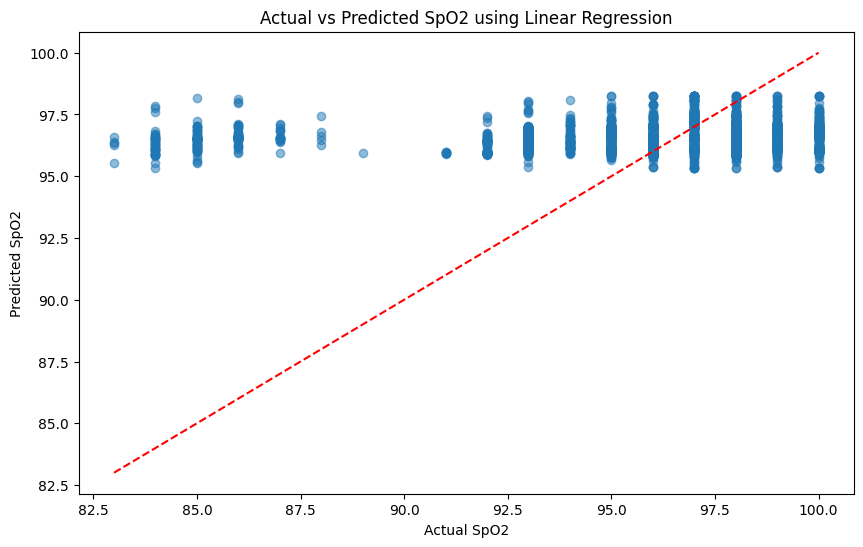

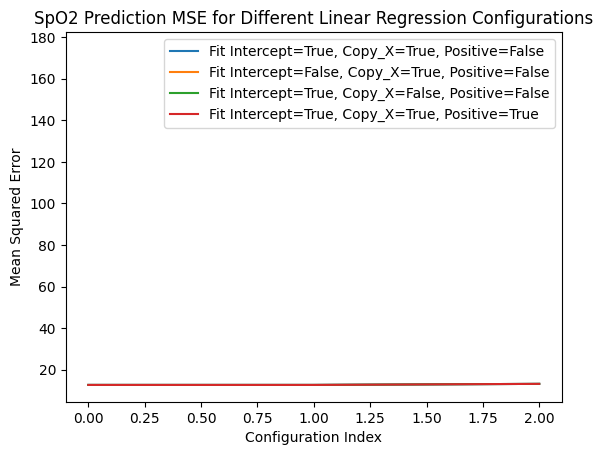

In [ ]:
import pandas as pd
import numpy as np
import glob
import os
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Correct data path
data_path = "./drive/MyDrive/PulseOxData/bidmc-ppg-and-respiration-dataset-1.0.0/bidmc_csv/"

# Verify if the directory exists
if os.path.exists(data_path):
    print(f"Data path exists: {data_path}")
else:
    print(f"Data path does NOT exist: {data_path}")

# Initialize lists to hold the aggregated data
x_values = []
y_values = []

# Use glob to find all signal and numeric files
signal_files = glob.glob(os.path.join(data_path, "bidmc_*_Signals.csv"))

print(f"Found {len(signal_files)} signal files.")

for signal_file in signal_files:
    # Extract patient id from file name
    pid = int(signal_file.split("_")[-2])
    numerics_file = signal_file.replace("_Signals.csv", "_Numerics.csv")

    print(f"Processing files for patient {pid}:")
    print(f"  Signal file: {signal_file}")
    print(f"  Numerics file: {numerics_file}")

    # Load the data
    try:
        signal_df = pd.read_csv(signal_file)
        numerics_df = pd.read_csv(numerics_file)
    except FileNotFoundError:
        print(f'  Files for patient {pid} not found.')
        continue

    print(f"  Loaded signal_df with shape: {signal_df.shape}")
    print(f"  Loaded numerics_df with shape: {numerics_df.shape}")

    # Strip leading/trailing spaces from column names
    signal_df.columns = signal_df.columns.str.strip()
    numerics_df.columns = numerics_df.columns.str.strip()

    # Print the columns of the DataFrames to verify
    print(f"  signal_df columns: {signal_df.columns}")
    print(f"  numerics_df columns: {numerics_df.columns}")

    # Merge the dataframes on the 'Time [s]' column
    merged_df = pd.merge(signal_df, numerics_df, on='Time [s]')

    print(f"  Merged dataframe shape: {merged_df.shape}")
    print(f"  Merged dataframe columns: {merged_df.columns}")

    # Specify the columns to use
    signal_columns = ['PLETH', 'II', 'AVR', 'CVP']
    numeric_column = 'SpO2'

    # Check for missing values in the numeric column
    if merged_df[numeric_column].isna().any():
        print(f"  Missing values in {numeric_column}, skipping patient {pid}.")
        continue

    # Filter common columns to those that are present in the merged dataframe
    available_columns = [col for col in signal_columns if col in merged_df.columns]
    if not available_columns:
        print(f"  No available signal columns in merged dataframe, skipping patient {pid}.")
        continue

    # Append the values to the lists
    x_values.extend(merged_df[available_columns].dropna().values.tolist())
    y_values.extend(merged_df[numeric_column].dropna().values.tolist())

    print(f"  Appended data, current X shape: {len(x_values)}, current y shape: {len(y_values)}")

# Convert lists to numpy arrays
X = np.array([np.array(x) for x in x_values if len(x) == len(available_columns)])
y = np.array(y_values[:len(X)])

# Ensure y has no NaN values and matches the shape of X
y = y[~np.isnan(y)]
X = X[:len(y)]

# Check the shapes
print(f'Final X.shape: {X.shape}')
print(f'Final y.shape: {y.shape}')

# Check if there's enough data to split
if len(X) == 0 or len(y) == 0:
    print("Insufficient data for model training.")
else:
    # Split the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Define parameter configurations for the Linear Regression model
    configs = [
        {"fit_intercept": True, "copy_X": True, "n_jobs": None, "positive": False},
        {"fit_intercept": False, "copy_X": True, "n_jobs": None, "positive": False},
        {"fit_intercept": True, "copy_X": False, "n_jobs": None, "positive": False},
        {"fit_intercept": True, "copy_X": True, "n_jobs": None, "positive": True},
    ]

    # Initialize a list to store results
    results = []

    # Loop through parameter configurations
    for config in configs:
        # Train the model
        lr_model = LinearRegression(
            fit_intercept=config["fit_intercept"],
            copy_X=config["copy_X"],
            n_jobs=config["n_jobs"],
            positive=config["positive"]
        )

        lr_model.fit(X_train, y_train)

        # Predict and calculate the error
        y_train_pred = lr_model.predict(X_train)
        y_test_pred = lr_model.predict(X_test)
        train_mse = mean_squared_error(y_train, y_train_pred)
        test_mse = mean_squared_error(y_test, y_test_pred)

        # Store the results
        results.append({
            'fit_intercept': config["fit_intercept"],
            'copy_X': config["copy_X"],
            'n_jobs': config["n_jobs"],
            'positive': config["positive"],
            'train_mse': train_mse,
            'test_mse': test_mse
        })

    # Convert results to a DataFrame
    results_df = pd.DataFrame(results)

    # Display the results
    print(results_df)

    # Plot Actual vs Predicted
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_test_pred, alpha=0.5)
    plt.plot([min(y), max(y)], [min(y), max(y)], 'r--')
    plt.xlabel('Actual SpO2')
    plt.ylabel('Predicted SpO2')
    plt.title('Actual vs Predicted SpO2 using Linear Regression')
    plt.show()

    # Display model performance for each configuration
    for config in configs:
        mses = [result['test_mse'] for result in results if result['fit_intercept'] == config["fit_intercept"]]
        plt.plot(range(len(mses)), mses, label=f'Fit Intercept={config["fit_intercept"]}, Copy_X={config["copy_X"]}, Positive={config["positive"]}')

    plt.xlabel('Configuration Index')
    plt.ylabel('Mean Squared Error')
    plt.title('SpO2 Prediction MSE for Different Linear Regression Configurations')
    plt.legend()
    plt.show()

Data path exists: ./drive/MyDrive/PulseOxData/bidmc-ppg-and-respiration-dataset-1.0.0/bidmc_csv/
Found 53 signal files.
Processing files for patient 12:
  Signal file: ./drive/MyDrive/PulseOxData/bidmc-ppg-and-respiration-dataset-1.0.0/bidmc_csv/bidmc_12_Signals.csv
  Numerics file: ./drive/MyDrive/PulseOxData/bidmc-ppg-and-respiration-dataset-1.0.0/bidmc_csv/bidmc_12_Numerics.csv
  Loaded signal_df with shape: (60001, 6)
  Loaded numerics_df with shape: (481, 5)
  signal_df columns: Index(['Time [s]', 'RESP', 'PLETH', 'II', 'V', 'AVR'], dtype='object')
  numerics_df columns: Index(['Time [s]', 'HR', 'PULSE', 'RESP', 'SpO2'], dtype='object')
  Merged dataframe shape: (481, 10)
  Merged dataframe columns: Index(['Time [s]', 'RESP_x', 'PLETH', 'II', 'V', 'AVR', 'HR', 'PULSE',
       'RESP_y', 'SpO2'],
      dtype='object')
  Appended data, current X shape: 481, current y shape: 481
Processing files for patient 48:
  Signal file: ./drive/MyDrive/PulseOxData/bidmc-ppg-and-respiration-datas

<ipython-input-5-e6d3234c6650>:57: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  merged_df = pd.merge(signal_df, numerics_df, on='Time [s]')
<ipython-input-5-e6d3234c6650>:57: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  merged_df = pd.merge(signal_df, numerics_df, on='Time [s]')
<ipython-input-5-e6d3234c6650>:57: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  merged_df = pd.merge(signal_df, numerics_df, on='Time [s]')


  Loaded signal_df with shape: (60001, 8)
  Loaded numerics_df with shape: (481, 5)
  signal_df columns: Index(['Time [s]', 'RESP', 'ABP', 'PLETH', 'II', 'V', 'AVR', 'CVP'], dtype='object')
  numerics_df columns: Index(['Time [s]', 'HR', 'PULSE', 'RESP', 'SpO2'], dtype='object')
  Merged dataframe shape: (481, 12)
  Merged dataframe columns: Index(['Time [s]', 'RESP_x', 'ABP', 'PLETH', 'II', 'V', 'AVR', 'CVP', 'HR',
       'PULSE', 'RESP_y', 'SpO2'],
      dtype='object')
  Appended data, current X shape: 1443, current y shape: 1443
Processing files for patient 38:
  Signal file: ./drive/MyDrive/PulseOxData/bidmc-ppg-and-respiration-dataset-1.0.0/bidmc_csv/bidmc_38_Signals.csv
  Numerics file: ./drive/MyDrive/PulseOxData/bidmc-ppg-and-respiration-dataset-1.0.0/bidmc_csv/bidmc_38_Numerics.csv
  Loaded signal_df with shape: (60001, 6)
  Loaded numerics_df with shape: (481, 5)
  signal_df columns: Index(['Time [s]', 'RESP', 'PLETH', 'I', 'MCL', 'II'], dtype='object')
  numerics_df columns

<ipython-input-5-e6d3234c6650>:57: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  merged_df = pd.merge(signal_df, numerics_df, on='Time [s]')
<ipython-input-5-e6d3234c6650>:57: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  merged_df = pd.merge(signal_df, numerics_df, on='Time [s]')


  Loaded signal_df with shape: (60001, 8)
  Loaded numerics_df with shape: (481, 5)
  signal_df columns: Index(['Time [s]', 'RESP', 'PLETH', 'II', 'V', 'AVR', 'CVP', 'ART'], dtype='object')
  numerics_df columns: Index(['Time [s]', 'HR', 'PULSE', 'RESP', 'SpO2'], dtype='object')
  Merged dataframe shape: (481, 12)
  Merged dataframe columns: Index(['Time [s]', 'RESP_x', 'PLETH', 'II', 'V', 'AVR', 'CVP', 'ART', 'HR',
       'PULSE', 'RESP_y', 'SpO2'],
      dtype='object')
  Appended data, current X shape: 2873, current y shape: 2873
Processing files for patient 51:
  Signal file: ./drive/MyDrive/PulseOxData/bidmc-ppg-and-respiration-dataset-1.0.0/bidmc_csv/bidmc_51_Signals.csv
  Numerics file: ./drive/MyDrive/PulseOxData/bidmc-ppg-and-respiration-dataset-1.0.0/bidmc_csv/bidmc_51_Numerics.csv
  Loaded signal_df with shape: (60001, 6)
  Loaded numerics_df with shape: (481, 5)
  signal_df columns: Index(['Time [s]', 'RESP', 'II', 'V', 'AVR', 'PLETH'], dtype='object')
  numerics_df columns

<ipython-input-5-e6d3234c6650>:57: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  merged_df = pd.merge(signal_df, numerics_df, on='Time [s]')
<ipython-input-5-e6d3234c6650>:57: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  merged_df = pd.merge(signal_df, numerics_df, on='Time [s]')


  Loaded signal_df with shape: (60001, 6)
  Loaded numerics_df with shape: (481, 5)
  signal_df columns: Index(['Time [s]', 'RESP', 'PLETH', 'II', 'MCL', 'AVR'], dtype='object')
  numerics_df columns: Index(['Time [s]', 'HR', 'PULSE', 'RESP', 'SpO2'], dtype='object')
  Merged dataframe shape: (481, 10)
  Merged dataframe columns: Index(['Time [s]', 'RESP_x', 'PLETH', 'II', 'MCL', 'AVR', 'HR', 'PULSE',
       'RESP_y', 'SpO2'],
      dtype='object')
  Appended data, current X shape: 3835, current y shape: 3835
Processing files for patient 34:
  Signal file: ./drive/MyDrive/PulseOxData/bidmc-ppg-and-respiration-dataset-1.0.0/bidmc_csv/bidmc_34_Signals.csv
  Numerics file: ./drive/MyDrive/PulseOxData/bidmc-ppg-and-respiration-dataset-1.0.0/bidmc_csv/bidmc_34_Numerics.csv
  Loaded signal_df with shape: (60001, 6)
  Loaded numerics_df with shape: (481, 5)
  signal_df columns: Index(['Time [s]', 'RESP', 'PLETH', 'II', 'V', 'AVR'], dtype='object')
  numerics_df columns: Index(['Time [s]', 'HR

<ipython-input-5-e6d3234c6650>:57: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  merged_df = pd.merge(signal_df, numerics_df, on='Time [s]')
<ipython-input-5-e6d3234c6650>:57: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  merged_df = pd.merge(signal_df, numerics_df, on='Time [s]')


  Loaded signal_df with shape: (60001, 6)
  Loaded numerics_df with shape: (481, 5)
  signal_df columns: Index(['Time [s]', 'RESP', 'PLETH', 'II', 'MCL', 'AVR'], dtype='object')
  numerics_df columns: Index(['Time [s]', 'HR', 'PULSE', 'RESP', 'SpO2'], dtype='object')
  Merged dataframe shape: (481, 10)
  Merged dataframe columns: Index(['Time [s]', 'RESP_x', 'PLETH', 'II', 'MCL', 'AVR', 'HR', 'PULSE',
       'RESP_y', 'SpO2'],
      dtype='object')
  Appended data, current X shape: 4797, current y shape: 4797
Processing files for patient 42:
  Signal file: ./drive/MyDrive/PulseOxData/bidmc-ppg-and-respiration-dataset-1.0.0/bidmc_csv/bidmc_42_Signals.csv
  Numerics file: ./drive/MyDrive/PulseOxData/bidmc-ppg-and-respiration-dataset-1.0.0/bidmc_csv/bidmc_42_Numerics.csv
  Loaded signal_df with shape: (60001, 6)
  Loaded numerics_df with shape: (481, 5)
  signal_df columns: Index(['Time [s]', 'V', 'RESP', 'II', 'AVR', 'PLETH'], dtype='object')
  numerics_df columns: Index(['Time [s]', 'HR

<ipython-input-5-e6d3234c6650>:57: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  merged_df = pd.merge(signal_df, numerics_df, on='Time [s]')
<ipython-input-5-e6d3234c6650>:57: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  merged_df = pd.merge(signal_df, numerics_df, on='Time [s]')


  Loaded signal_df with shape: (60001, 6)
  Loaded numerics_df with shape: (481, 5)
  signal_df columns: Index(['Time [s]', 'RESP', 'PLETH', 'II', 'V', 'AVR'], dtype='object')
  numerics_df columns: Index(['Time [s]', 'HR', 'PULSE', 'RESP', 'SpO2'], dtype='object')
  Merged dataframe shape: (481, 10)
  Merged dataframe columns: Index(['Time [s]', 'RESP_x', 'PLETH', 'II', 'V', 'AVR', 'HR', 'PULSE',
       'RESP_y', 'SpO2'],
      dtype='object')
  Appended data, current X shape: 5759, current y shape: 5759
Processing files for patient 47:
  Signal file: ./drive/MyDrive/PulseOxData/bidmc-ppg-and-respiration-dataset-1.0.0/bidmc_csv/bidmc_47_Signals.csv
  Numerics file: ./drive/MyDrive/PulseOxData/bidmc-ppg-and-respiration-dataset-1.0.0/bidmc_csv/bidmc_47_Numerics.csv
  Loaded signal_df with shape: (60001, 7)
  Loaded numerics_df with shape: (481, 5)
  signal_df columns: Index(['Time [s]', 'RESP', 'ABP', 'PLETH', 'II', 'III', 'V'], dtype='object')
  numerics_df columns: Index(['Time [s]', 

<ipython-input-5-e6d3234c6650>:57: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  merged_df = pd.merge(signal_df, numerics_df, on='Time [s]')
<ipython-input-5-e6d3234c6650>:57: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  merged_df = pd.merge(signal_df, numerics_df, on='Time [s]')


  Loaded signal_df with shape: (60001, 6)
  Loaded numerics_df with shape: (481, 5)
  signal_df columns: Index(['Time [s]', 'PLETH', 'RESP', 'II', 'V', 'AVR'], dtype='object')
  numerics_df columns: Index(['Time [s]', 'HR', 'PULSE', 'RESP', 'SpO2'], dtype='object')
  Merged dataframe shape: (481, 10)
  Merged dataframe columns: Index(['Time [s]', 'PLETH', 'RESP_x', 'II', 'V', 'AVR', 'HR', 'PULSE',
       'RESP_y', 'SpO2'],
      dtype='object')
  Appended data, current X shape: 6721, current y shape: 6721
Processing files for patient 40:
  Signal file: ./drive/MyDrive/PulseOxData/bidmc-ppg-and-respiration-dataset-1.0.0/bidmc_csv/bidmc_40_Signals.csv
  Numerics file: ./drive/MyDrive/PulseOxData/bidmc-ppg-and-respiration-dataset-1.0.0/bidmc_csv/bidmc_40_Numerics.csv
  Loaded signal_df with shape: (60001, 6)
  Loaded numerics_df with shape: (481, 5)
  signal_df columns: Index(['Time [s]', 'RESP', 'II', 'V', 'AVR', 'PLETH'], dtype='object')
  numerics_df columns: Index(['Time [s]', 'HR', '

<ipython-input-5-e6d3234c6650>:57: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  merged_df = pd.merge(signal_df, numerics_df, on='Time [s]')
<ipython-input-5-e6d3234c6650>:57: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  merged_df = pd.merge(signal_df, numerics_df, on='Time [s]')


  Loaded signal_df with shape: (60001, 6)
  Loaded numerics_df with shape: (481, 5)
  signal_df columns: Index(['Time [s]', 'RESP', 'PLETH', 'II', 'V', 'AVR'], dtype='object')
  numerics_df columns: Index(['Time [s]', 'HR', 'PULSE', 'RESP', 'SpO2'], dtype='object')
  Merged dataframe shape: (481, 10)
  Merged dataframe columns: Index(['Time [s]', 'RESP_x', 'PLETH', 'II', 'V', 'AVR', 'HR', 'PULSE',
       'RESP_y', 'SpO2'],
      dtype='object')
  Appended data, current X shape: 7683, current y shape: 7683
Processing files for patient 10:
  Signal file: ./drive/MyDrive/PulseOxData/bidmc-ppg-and-respiration-dataset-1.0.0/bidmc_csv/bidmc_10_Signals.csv
  Numerics file: ./drive/MyDrive/PulseOxData/bidmc-ppg-and-respiration-dataset-1.0.0/bidmc_csv/bidmc_10_Numerics.csv
  Loaded signal_df with shape: (60001, 7)
  Loaded numerics_df with shape: (481, 5)
  signal_df columns: Index(['Time [s]', 'RESP', 'PLETH', 'II', 'V', 'AVR', 'CVP'], dtype='object')
  numerics_df columns: Index(['Time [s]', 

<ipython-input-5-e6d3234c6650>:57: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  merged_df = pd.merge(signal_df, numerics_df, on='Time [s]')
<ipython-input-5-e6d3234c6650>:57: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  merged_df = pd.merge(signal_df, numerics_df, on='Time [s]')


  Loaded signal_df with shape: (60001, 6)
  Loaded numerics_df with shape: (481, 5)
  signal_df columns: Index(['Time [s]', 'RESP', 'PLETH', 'II', 'V', 'AVR'], dtype='object')
  numerics_df columns: Index(['Time [s]', 'HR', 'PULSE', 'RESP', 'SpO2'], dtype='object')
  Merged dataframe shape: (481, 10)
  Merged dataframe columns: Index(['Time [s]', 'RESP_x', 'PLETH', 'II', 'V', 'AVR', 'HR', 'PULSE',
       'RESP_y', 'SpO2'],
      dtype='object')
  Appended data, current X shape: 8645, current y shape: 8645
Processing files for patient 3:
  Signal file: ./drive/MyDrive/PulseOxData/bidmc-ppg-and-respiration-dataset-1.0.0/bidmc_csv/bidmc_03_Signals.csv
  Numerics file: ./drive/MyDrive/PulseOxData/bidmc-ppg-and-respiration-dataset-1.0.0/bidmc_csv/bidmc_03_Numerics.csv
  Loaded signal_df with shape: (60001, 7)
  Loaded numerics_df with shape: (481, 5)
  signal_df columns: Index(['Time [s]', 'RESP', 'PLETH', 'II', 'V', 'AVR', 'CVP'], dtype='object')
  numerics_df columns: Index(['Time [s]', '

<ipython-input-5-e6d3234c6650>:57: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  merged_df = pd.merge(signal_df, numerics_df, on='Time [s]')
<ipython-input-5-e6d3234c6650>:57: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  merged_df = pd.merge(signal_df, numerics_df, on='Time [s]')


  Loaded signal_df with shape: (60001, 6)
  Loaded numerics_df with shape: (481, 5)
  signal_df columns: Index(['Time [s]', 'RESP', 'II', 'V', 'AVR', 'PLETH'], dtype='object')
  numerics_df columns: Index(['Time [s]', 'HR', 'PULSE', 'RESP', 'SpO2'], dtype='object')
  Merged dataframe shape: (481, 10)
  Merged dataframe columns: Index(['Time [s]', 'RESP_x', 'II', 'V', 'AVR', 'PLETH', 'HR', 'PULSE',
       'RESP_y', 'SpO2'],
      dtype='object')
  Appended data, current X shape: 9607, current y shape: 9607
Processing files for patient 21:
  Signal file: ./drive/MyDrive/PulseOxData/bidmc-ppg-and-respiration-dataset-1.0.0/bidmc_csv/bidmc_21_Signals.csv
  Numerics file: ./drive/MyDrive/PulseOxData/bidmc-ppg-and-respiration-dataset-1.0.0/bidmc_csv/bidmc_21_Numerics.csv
  Loaded signal_df with shape: (60001, 6)
  Loaded numerics_df with shape: (481, 5)
  signal_df columns: Index(['Time [s]', 'RESP', 'PLETH', 'II', 'V', 'AVR'], dtype='object')
  numerics_df columns: Index(['Time [s]', 'HR', '

<ipython-input-5-e6d3234c6650>:57: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  merged_df = pd.merge(signal_df, numerics_df, on='Time [s]')
<ipython-input-5-e6d3234c6650>:57: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  merged_df = pd.merge(signal_df, numerics_df, on='Time [s]')


  Loaded signal_df with shape: (60001, 6)
  Loaded numerics_df with shape: (481, 5)
  signal_df columns: Index(['Time [s]', 'I', 'RESP', 'II', 'V', 'PLETH'], dtype='object')
  numerics_df columns: Index(['Time [s]', 'HR', 'PULSE', 'RESP', 'SpO2'], dtype='object')
  Merged dataframe shape: (481, 10)
  Merged dataframe columns: Index(['Time [s]', 'I', 'RESP_x', 'II', 'V', 'PLETH', 'HR', 'PULSE', 'RESP_y',
       'SpO2'],
      dtype='object')
  Appended data, current X shape: 10569, current y shape: 10569
Processing files for patient 35:
  Signal file: ./drive/MyDrive/PulseOxData/bidmc-ppg-and-respiration-dataset-1.0.0/bidmc_csv/bidmc_35_Signals.csv
  Numerics file: ./drive/MyDrive/PulseOxData/bidmc-ppg-and-respiration-dataset-1.0.0/bidmc_csv/bidmc_35_Numerics.csv
  Loaded signal_df with shape: (60001, 6)
  Loaded numerics_df with shape: (481, 5)
  signal_df columns: Index(['Time [s]', 'RESP', 'PLETH', 'II', 'V', 'AVR'], dtype='object')
  numerics_df columns: Index(['Time [s]', 'HR', 'PU

<ipython-input-5-e6d3234c6650>:57: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  merged_df = pd.merge(signal_df, numerics_df, on='Time [s]')
<ipython-input-5-e6d3234c6650>:57: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  merged_df = pd.merge(signal_df, numerics_df, on='Time [s]')


  Loaded signal_df with shape: (60001, 6)
  Loaded numerics_df with shape: (481, 5)
  signal_df columns: Index(['Time [s]', 'RESP', 'PLETH', 'I', 'MCL', 'II'], dtype='object')
  numerics_df columns: Index(['Time [s]', 'HR', 'PULSE', 'RESP', 'SpO2'], dtype='object')
  Merged dataframe shape: (481, 10)
  Merged dataframe columns: Index(['Time [s]', 'RESP_x', 'PLETH', 'I', 'MCL', 'II', 'HR', 'PULSE',
       'RESP_y', 'SpO2'],
      dtype='object')
  Appended data, current X shape: 11531, current y shape: 11531
Processing files for patient 25:
  Signal file: ./drive/MyDrive/PulseOxData/bidmc-ppg-and-respiration-dataset-1.0.0/bidmc_csv/bidmc_25_Signals.csv
  Numerics file: ./drive/MyDrive/PulseOxData/bidmc-ppg-and-respiration-dataset-1.0.0/bidmc_csv/bidmc_25_Numerics.csv
  Loaded signal_df with shape: (60001, 6)
  Loaded numerics_df with shape: (481, 5)
  signal_df columns: Index(['Time [s]', 'RESP', 'PLETH', 'II', 'V', 'AVR'], dtype='object')
  numerics_df columns: Index(['Time [s]', 'HR',

<ipython-input-5-e6d3234c6650>:57: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  merged_df = pd.merge(signal_df, numerics_df, on='Time [s]')
<ipython-input-5-e6d3234c6650>:57: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  merged_df = pd.merge(signal_df, numerics_df, on='Time [s]')


  Loaded signal_df with shape: (60001, 6)
  Loaded numerics_df with shape: (481, 5)
  signal_df columns: Index(['Time [s]', 'RESP', 'PLETH', 'II', 'V', 'AVR'], dtype='object')
  numerics_df columns: Index(['Time [s]', 'HR', 'PULSE', 'RESP', 'SpO2'], dtype='object')
  Merged dataframe shape: (481, 10)
  Merged dataframe columns: Index(['Time [s]', 'RESP_x', 'PLETH', 'II', 'V', 'AVR', 'HR', 'PULSE',
       'RESP_y', 'SpO2'],
      dtype='object')
  Appended data, current X shape: 12486, current y shape: 12486
Processing files for patient 18:
  Signal file: ./drive/MyDrive/PulseOxData/bidmc-ppg-and-respiration-dataset-1.0.0/bidmc_csv/bidmc_18_Signals.csv
  Numerics file: ./drive/MyDrive/PulseOxData/bidmc-ppg-and-respiration-dataset-1.0.0/bidmc_csv/bidmc_18_Numerics.csv
  Loaded signal_df with shape: (60001, 6)
  Loaded numerics_df with shape: (481, 5)
  signal_df columns: Index(['Time [s]', 'PLETH', 'RESP', 'II', 'V', 'AVR'], dtype='object')
  numerics_df columns: Index(['Time [s]', 'HR',

<ipython-input-5-e6d3234c6650>:57: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  merged_df = pd.merge(signal_df, numerics_df, on='Time [s]')
<ipython-input-5-e6d3234c6650>:57: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  merged_df = pd.merge(signal_df, numerics_df, on='Time [s]')


  Loaded signal_df with shape: (60001, 6)
  Loaded numerics_df with shape: (481, 5)
  signal_df columns: Index(['Time [s]', 'PLETH', 'RESP', 'II', 'V', 'AVR'], dtype='object')
  numerics_df columns: Index(['Time [s]', 'HR', 'PULSE', 'RESP', 'SpO2'], dtype='object')
  Merged dataframe shape: (481, 10)
  Merged dataframe columns: Index(['Time [s]', 'PLETH', 'RESP_x', 'II', 'V', 'AVR', 'HR', 'PULSE',
       'RESP_y', 'SpO2'],
      dtype='object')
  Appended data, current X shape: 13448, current y shape: 13448
Processing files for patient 8:
  Signal file: ./drive/MyDrive/PulseOxData/bidmc-ppg-and-respiration-dataset-1.0.0/bidmc_csv/bidmc_08_Signals.csv
  Numerics file: ./drive/MyDrive/PulseOxData/bidmc-ppg-and-respiration-dataset-1.0.0/bidmc_csv/bidmc_08_Numerics.csv
  Loaded signal_df with shape: (60001, 8)
  Loaded numerics_df with shape: (481, 5)
  signal_df columns: Index(['Time [s]', 'RESP', 'PLETH', 'II', 'V', 'AVR', 'ART', 'CVP'], dtype='object')
  numerics_df columns: Index(['Tim

<ipython-input-5-e6d3234c6650>:57: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  merged_df = pd.merge(signal_df, numerics_df, on='Time [s]')
<ipython-input-5-e6d3234c6650>:57: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  merged_df = pd.merge(signal_df, numerics_df, on='Time [s]')


  Loaded signal_df with shape: (60001, 6)
  Loaded numerics_df with shape: (481, 5)
  signal_df columns: Index(['Time [s]', 'RESP', 'PLETH', 'II', 'V', 'AVR'], dtype='object')
  numerics_df columns: Index(['Time [s]', 'HR', 'PULSE', 'RESP', 'SpO2'], dtype='object')
  Merged dataframe shape: (481, 10)
  Merged dataframe columns: Index(['Time [s]', 'RESP_x', 'PLETH', 'II', 'V', 'AVR', 'HR', 'PULSE',
       'RESP_y', 'SpO2'],
      dtype='object')
  Appended data, current X shape: 14410, current y shape: 14410
Processing files for patient 53:
  Signal file: ./drive/MyDrive/PulseOxData/bidmc-ppg-and-respiration-dataset-1.0.0/bidmc_csv/bidmc_53_Signals.csv
  Numerics file: ./drive/MyDrive/PulseOxData/bidmc-ppg-and-respiration-dataset-1.0.0/bidmc_csv/bidmc_53_Numerics.csv
  Loaded signal_df with shape: (60001, 6)
  Loaded numerics_df with shape: (481, 5)
  signal_df columns: Index(['Time [s]', 'RESP', 'II', 'V', 'AVR', 'PLETH'], dtype='object')
  numerics_df columns: Index(['Time [s]', 'HR',

<ipython-input-5-e6d3234c6650>:57: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  merged_df = pd.merge(signal_df, numerics_df, on='Time [s]')
<ipython-input-5-e6d3234c6650>:57: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  merged_df = pd.merge(signal_df, numerics_df, on='Time [s]')


  Loaded signal_df with shape: (60001, 6)
  Loaded numerics_df with shape: (481, 5)
  signal_df columns: Index(['Time [s]', 'RESP', 'PLETH', 'II', 'V', 'AVR'], dtype='object')
  numerics_df columns: Index(['Time [s]', 'HR', 'PULSE', 'RESP', 'SpO2'], dtype='object')
  Merged dataframe shape: (481, 10)
  Merged dataframe columns: Index(['Time [s]', 'RESP_x', 'PLETH', 'II', 'V', 'AVR', 'HR', 'PULSE',
       'RESP_y', 'SpO2'],
      dtype='object')
  Appended data, current X shape: 15372, current y shape: 15372
Processing files for patient 6:
  Signal file: ./drive/MyDrive/PulseOxData/bidmc-ppg-and-respiration-dataset-1.0.0/bidmc_csv/bidmc_06_Signals.csv
  Numerics file: ./drive/MyDrive/PulseOxData/bidmc-ppg-and-respiration-dataset-1.0.0/bidmc_csv/bidmc_06_Numerics.csv
  Loaded signal_df with shape: (60001, 8)
  Loaded numerics_df with shape: (481, 5)
  signal_df columns: Index(['Time [s]', 'RESP', 'ABP', 'CVP', 'PLETH', 'II', 'V', 'AVR'], dtype='object')
  numerics_df columns: Index(['Tim

<ipython-input-5-e6d3234c6650>:57: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  merged_df = pd.merge(signal_df, numerics_df, on='Time [s]')
<ipython-input-5-e6d3234c6650>:57: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  merged_df = pd.merge(signal_df, numerics_df, on='Time [s]')


  Loaded signal_df with shape: (60001, 7)
  Loaded numerics_df with shape: (481, 5)
  signal_df columns: Index(['Time [s]', 'RESP', 'PLETH', 'CVP', 'II', 'V', 'AVR'], dtype='object')
  numerics_df columns: Index(['Time [s]', 'HR', 'PULSE', 'RESP', 'SpO2'], dtype='object')
  Merged dataframe shape: (481, 11)
  Merged dataframe columns: Index(['Time [s]', 'RESP_x', 'PLETH', 'CVP', 'II', 'V', 'AVR', 'HR', 'PULSE',
       'RESP_y', 'SpO2'],
      dtype='object')
  Appended data, current X shape: 16334, current y shape: 16334
Processing files for patient 32:
  Signal file: ./drive/MyDrive/PulseOxData/bidmc-ppg-and-respiration-dataset-1.0.0/bidmc_csv/bidmc_32_Signals.csv
  Numerics file: ./drive/MyDrive/PulseOxData/bidmc-ppg-and-respiration-dataset-1.0.0/bidmc_csv/bidmc_32_Numerics.csv
  Loaded signal_df with shape: (60001, 6)
  Loaded numerics_df with shape: (481, 5)
  signal_df columns: Index(['Time [s]', 'RESP', 'II', 'V', 'AVR', 'PLETH'], dtype='object')
  numerics_df columns: Index(['Ti

<ipython-input-5-e6d3234c6650>:57: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  merged_df = pd.merge(signal_df, numerics_df, on='Time [s]')
<ipython-input-5-e6d3234c6650>:57: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  merged_df = pd.merge(signal_df, numerics_df, on='Time [s]')


  Loaded signal_df with shape: (60001, 7)
  Loaded numerics_df with shape: (481, 5)
  signal_df columns: Index(['Time [s]', 'RESP', 'PLETH', 'I', 'V', 'II', 'ABP'], dtype='object')
  numerics_df columns: Index(['Time [s]', 'HR', 'PULSE', 'RESP', 'SpO2'], dtype='object')
  Merged dataframe shape: (481, 11)
  Merged dataframe columns: Index(['Time [s]', 'RESP_x', 'PLETH', 'I', 'V', 'II', 'ABP', 'HR', 'PULSE',
       'RESP_y', 'SpO2'],
      dtype='object')
  Appended data, current X shape: 17296, current y shape: 17296
Processing files for patient 50:
  Signal file: ./drive/MyDrive/PulseOxData/bidmc-ppg-and-respiration-dataset-1.0.0/bidmc_csv/bidmc_50_Signals.csv
  Numerics file: ./drive/MyDrive/PulseOxData/bidmc-ppg-and-respiration-dataset-1.0.0/bidmc_csv/bidmc_50_Numerics.csv
  Loaded signal_df with shape: (60001, 6)
  Loaded numerics_df with shape: (481, 5)
  signal_df columns: Index(['Time [s]', 'PLETH', 'RESP', 'II', 'V', 'AVR'], dtype='object')
  numerics_df columns: Index(['Time [

<ipython-input-5-e6d3234c6650>:57: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  merged_df = pd.merge(signal_df, numerics_df, on='Time [s]')
<ipython-input-5-e6d3234c6650>:57: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  merged_df = pd.merge(signal_df, numerics_df, on='Time [s]')


  Loaded signal_df with shape: (60001, 8)
  Loaded numerics_df with shape: (481, 5)
  signal_df columns: Index(['Time [s]', 'ABP', 'RESP', 'PLETH', 'V', 'II', 'AVR', 'CVP'], dtype='object')
  numerics_df columns: Index(['Time [s]', 'HR', 'PULSE', 'RESP', 'SpO2'], dtype='object')
  Merged dataframe shape: (481, 12)
  Merged dataframe columns: Index(['Time [s]', 'ABP', 'RESP_x', 'PLETH', 'V', 'II', 'AVR', 'CVP', 'HR',
       'PULSE', 'RESP_y', 'SpO2'],
      dtype='object')
  Appended data, current X shape: 18258, current y shape: 18258
Processing files for patient 26:
  Signal file: ./drive/MyDrive/PulseOxData/bidmc-ppg-and-respiration-dataset-1.0.0/bidmc_csv/bidmc_26_Signals.csv
  Numerics file: ./drive/MyDrive/PulseOxData/bidmc-ppg-and-respiration-dataset-1.0.0/bidmc_csv/bidmc_26_Numerics.csv
  Loaded signal_df with shape: (60001, 6)
  Loaded numerics_df with shape: (481, 5)
  signal_df columns: Index(['Time [s]', 'RESP', 'PLETH', 'II', 'V', 'AVR'], dtype='object')
  numerics_df colum

<ipython-input-5-e6d3234c6650>:57: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  merged_df = pd.merge(signal_df, numerics_df, on='Time [s]')
<ipython-input-5-e6d3234c6650>:57: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  merged_df = pd.merge(signal_df, numerics_df, on='Time [s]')


  Loaded signal_df with shape: (60001, 6)
  Loaded numerics_df with shape: (481, 5)
  signal_df columns: Index(['Time [s]', 'RESP', 'PLETH', 'II', 'V', 'AVR'], dtype='object')
  numerics_df columns: Index(['Time [s]', 'HR', 'PULSE', 'RESP', 'SpO2'], dtype='object')
  Merged dataframe shape: (481, 10)
  Merged dataframe columns: Index(['Time [s]', 'RESP_x', 'PLETH', 'II', 'V', 'AVR', 'HR', 'PULSE',
       'RESP_y', 'SpO2'],
      dtype='object')
  Appended data, current X shape: 19220, current y shape: 19220
Processing files for patient 37:
  Signal file: ./drive/MyDrive/PulseOxData/bidmc-ppg-and-respiration-dataset-1.0.0/bidmc_csv/bidmc_37_Signals.csv
  Numerics file: ./drive/MyDrive/PulseOxData/bidmc-ppg-and-respiration-dataset-1.0.0/bidmc_csv/bidmc_37_Numerics.csv
  Loaded signal_df with shape: (60001, 6)
  Loaded numerics_df with shape: (481, 5)
  signal_df columns: Index(['Time [s]', 'RESP', 'II', 'V', 'AVR', 'PLETH'], dtype='object')
  numerics_df columns: Index(['Time [s]', 'HR',

<ipython-input-5-e6d3234c6650>:57: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  merged_df = pd.merge(signal_df, numerics_df, on='Time [s]')
<ipython-input-5-e6d3234c6650>:57: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  merged_df = pd.merge(signal_df, numerics_df, on='Time [s]')


  Loaded signal_df with shape: (60001, 7)
  Loaded numerics_df with shape: (481, 5)
  signal_df columns: Index(['Time [s]', 'RESP', 'PLETH', 'II', 'V', 'AVR', 'ABP'], dtype='object')
  numerics_df columns: Index(['Time [s]', 'HR', 'PULSE', 'RESP', 'SpO2'], dtype='object')
  Merged dataframe shape: (481, 11)
  Merged dataframe columns: Index(['Time [s]', 'RESP_x', 'PLETH', 'II', 'V', 'AVR', 'ABP', 'HR', 'PULSE',
       'RESP_y', 'SpO2'],
      dtype='object')
  Appended data, current X shape: 20182, current y shape: 20182
Processing files for patient 45:
  Signal file: ./drive/MyDrive/PulseOxData/bidmc-ppg-and-respiration-dataset-1.0.0/bidmc_csv/bidmc_45_Signals.csv
  Numerics file: ./drive/MyDrive/PulseOxData/bidmc-ppg-and-respiration-dataset-1.0.0/bidmc_csv/bidmc_45_Numerics.csv
  Loaded signal_df with shape: (60001, 6)
  Loaded numerics_df with shape: (481, 5)
  signal_df columns: Index(['Time [s]', 'RESP', 'II', 'V', 'AVR', 'PLETH'], dtype='object')
  numerics_df columns: Index(['Ti

<ipython-input-5-e6d3234c6650>:57: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  merged_df = pd.merge(signal_df, numerics_df, on='Time [s]')
<ipython-input-5-e6d3234c6650>:57: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  merged_df = pd.merge(signal_df, numerics_df, on='Time [s]')
<ipython-input-5-e6d3234c6650>:57: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  merged_df = pd.merge(signal_df, numerics_df, on='Time [s]')


  Loaded signal_df with shape: (60001, 7)
  Loaded numerics_df with shape: (481, 5)
  signal_df columns: Index(['Time [s]', 'PLETH', 'ABP', 'RESP', 'II', 'V', 'AVR'], dtype='object')
  numerics_df columns: Index(['Time [s]', 'HR', 'PULSE', 'RESP', 'SpO2'], dtype='object')
  Merged dataframe shape: (480, 11)
  Merged dataframe columns: Index(['Time [s]', 'PLETH', 'ABP', 'RESP_x', 'II', 'V', 'AVR', 'HR', 'PULSE',
       'RESP_y', 'SpO2'],
      dtype='object')
  Appended data, current X shape: 21624, current y shape: 21624
Processing files for patient 33:
  Signal file: ./drive/MyDrive/PulseOxData/bidmc-ppg-and-respiration-dataset-1.0.0/bidmc_csv/bidmc_33_Signals.csv
  Numerics file: ./drive/MyDrive/PulseOxData/bidmc-ppg-and-respiration-dataset-1.0.0/bidmc_csv/bidmc_33_Numerics.csv
  Loaded signal_df with shape: (60001, 6)
  Loaded numerics_df with shape: (481, 5)
  signal_df columns: Index(['Time [s]', 'RESP', 'II', 'V', 'AVR', 'PLETH'], dtype='object')
  numerics_df columns: Index(['Ti

<ipython-input-5-e6d3234c6650>:57: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  merged_df = pd.merge(signal_df, numerics_df, on='Time [s]')
<ipython-input-5-e6d3234c6650>:57: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  merged_df = pd.merge(signal_df, numerics_df, on='Time [s]')
<ipython-input-5-e6d3234c6650>:57: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  merged_df = pd.merge(signal_df, numerics_df, on='Time [s]')


  Loaded signal_df with shape: (60001, 6)
  Loaded numerics_df with shape: (481, 5)
  signal_df columns: Index(['Time [s]', 'II', 'PLETH', 'RESP', 'V', 'AVR'], dtype='object')
  numerics_df columns: Index(['Time [s]', 'HR', 'PULSE', 'RESP', 'SpO2'], dtype='object')
  Merged dataframe shape: (481, 10)
  Merged dataframe columns: Index(['Time [s]', 'II', 'PLETH', 'RESP_x', 'V', 'AVR', 'HR', 'PULSE',
       'RESP_y', 'SpO2'],
      dtype='object')
  Appended data, current X shape: 23067, current y shape: 23067
Processing files for patient 52:
  Signal file: ./drive/MyDrive/PulseOxData/bidmc-ppg-and-respiration-dataset-1.0.0/bidmc_csv/bidmc_52_Signals.csv
  Numerics file: ./drive/MyDrive/PulseOxData/bidmc-ppg-and-respiration-dataset-1.0.0/bidmc_csv/bidmc_52_Numerics.csv
  Loaded signal_df with shape: (60001, 6)
  Loaded numerics_df with shape: (481, 5)
  signal_df columns: Index(['Time [s]', 'PLETH', 'RESP', 'II', 'V', 'AVR'], dtype='object')
  numerics_df columns: Index(['Time [s]', 'HR',

<ipython-input-5-e6d3234c6650>:57: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  merged_df = pd.merge(signal_df, numerics_df, on='Time [s]')
<ipython-input-5-e6d3234c6650>:57: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  merged_df = pd.merge(signal_df, numerics_df, on='Time [s]')
<ipython-input-5-e6d3234c6650>:57: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  merged_df = pd.merge(signal_df, numerics_df, on='Time [s]')


  Loaded signal_df with shape: (60001, 7)
  Loaded numerics_df with shape: (481, 5)
  signal_df columns: Index(['Time [s]', 'PLETH', 'RESP', 'II', 'V', 'AVR', 'CVP'], dtype='object')
  numerics_df columns: Index(['Time [s]', 'HR', 'PULSE', 'RESP', 'SpO2'], dtype='object')
  Merged dataframe shape: (481, 11)
  Merged dataframe columns: Index(['Time [s]', 'PLETH', 'RESP_x', 'II', 'V', 'AVR', 'CVP', 'HR', 'PULSE',
       'RESP_y', 'SpO2'],
      dtype='object')
  Appended data, current X shape: 24504, current y shape: 24504
Processing files for patient 19:
  Signal file: ./drive/MyDrive/PulseOxData/bidmc-ppg-and-respiration-dataset-1.0.0/bidmc_csv/bidmc_19_Signals.csv
  Numerics file: ./drive/MyDrive/PulseOxData/bidmc-ppg-and-respiration-dataset-1.0.0/bidmc_csv/bidmc_19_Numerics.csv
  Loaded signal_df with shape: (60001, 6)
  Loaded numerics_df with shape: (481, 5)
  signal_df columns: Index(['Time [s]', 'RESP', 'II', 'V', 'AVR', 'PLETH'], dtype='object')
  numerics_df columns: Index(['Ti

<ipython-input-5-e6d3234c6650>:57: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  merged_df = pd.merge(signal_df, numerics_df, on='Time [s]')
<ipython-input-5-e6d3234c6650>:57: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  merged_df = pd.merge(signal_df, numerics_df, on='Time [s]')
<ipython-input-5-e6d3234c6650>:57: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  merged_df = pd.merge(signal_df, numerics_df, on='Time [s]')


   fit_intercept  copy_X n_jobs  positive   train_mse    test_mse
0           True    True   None     False   11.913317   11.006054
1          False    True   None     False  153.191452  152.925307
2           True   False   None     False   12.712903   11.006054
3           True    True   None      True   12.008489   14.132935


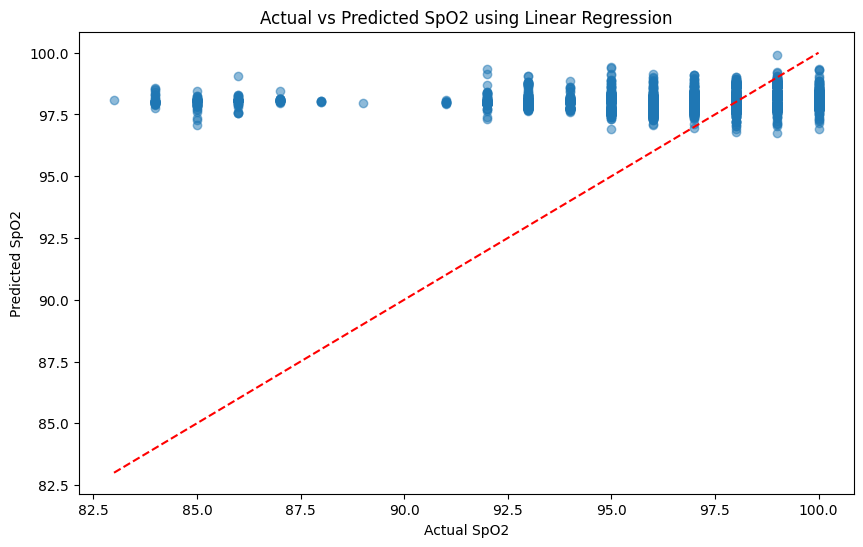

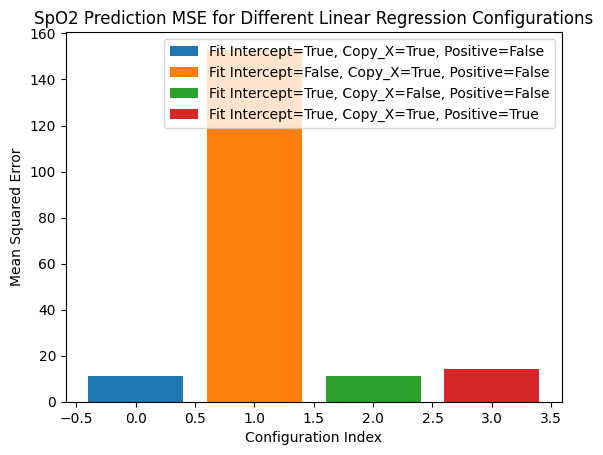

In [ ]:
import pandas as pd
import numpy as np
import glob
import os
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Correct data path
data_path = "./drive/MyDrive/PulseOxData/bidmc-ppg-and-respiration-dataset-1.0.0/bidmc_csv/"

# Verify if the directory exists
if os.path.exists(data_path):
    print(f"Data path exists: {data_path}")
else:
    print(f"Data path does NOT exist: {data_path}")

# Initialize lists to hold the aggregated data
x_values = []
y_values = []

# Use glob to find all signal and numeric files
signal_files = glob.glob(os.path.join(data_path, "bidmc_*_Signals.csv"))

print(f"Found {len(signal_files)} signal files.")

for signal_file in signal_files:
    # Extract patient id from file name
    pid = int(signal_file.split("_")[-2])
    numerics_file = signal_file.replace("_Signals.csv", "_Numerics.csv")

    print(f"Processing files for patient {pid}:")
    print(f"  Signal file: {signal_file}")
    print(f"  Numerics file: {numerics_file}")

    # Load the data
    try:
        signal_df = pd.read_csv(signal_file)
        numerics_df = pd.read_csv(numerics_file)
    except FileNotFoundError:
        print(f'  Files for patient {pid} not found.')
        continue

    print(f"  Loaded signal_df with shape: {signal_df.shape}")
    print(f"  Loaded numerics_df with shape: {numerics_df.shape}")

    # Strip leading/trailing spaces from column names
    signal_df.columns = signal_df.columns.str.strip()
    numerics_df.columns = numerics_df.columns.str.strip()

    # Print the columns of the DataFrames to verify
    print(f"  signal_df columns: {signal_df.columns}")
    print(f"  numerics_df columns: {numerics_df.columns}")

    # Merge the dataframes on the 'Time [s]' column
    merged_df = pd.merge(signal_df, numerics_df, on='Time [s]')

    print(f"  Merged dataframe shape: {merged_df.shape}")
    print(f"  Merged dataframe columns: {merged_df.columns}")

    # Specify the columns to use
    signal_columns = ['PLETH', 'II', 'AVR', 'CVP']
    numeric_column = 'SpO2'

    # Filter to only include the desired columns
    available_columns = [col for col in signal_columns if col in merged_df.columns]

    if not available_columns:
        print(f"  No available signal columns in merged dataframe, skipping patient {pid}.")
        continue

    # Drop rows with missing data in the selected columns
    merged_df = merged_df[available_columns + [numeric_column]].dropna()

    if merged_df.empty:
        print(f"  No valid data left after dropping rows with missing data, skipping patient {pid}.")
        continue

    # Append the values to the lists
    x_values.extend(merged_df[available_columns].values.tolist())
    y_values.extend(merged_df[numeric_column].values.tolist())

    print(f"  Appended data, current X shape: {len(x_values)}, current y shape: {len(y_values)}")

# Convert lists to numpy arrays
X = np.array([np.array(x) for x in x_values if len(x) == len(available_columns)])
y = np.array(y_values[:len(X)])

# Ensure y has no NaN values and matches the shape of X
y = y[~np.isnan(y)]
X = X[:len(y)]

# Check the shapes
print(f'Final X.shape: {X.shape}')
print(f'Final y.shape: {y.shape}')

# Check if there's enough data to split
if len(X) == 0 or len(y) == 0:
    print("Insufficient data for model training.")
else:
    # Split the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Define parameter configurations for the Linear Regression model
    configs = [
        {"fit_intercept": True, "copy_X": True, "n_jobs": None, "positive": False},
        {"fit_intercept": False, "copy_X": True, "n_jobs": None, "positive": False},
        {"fit_intercept": True, "copy_X": False, "n_jobs": None, "positive": False},
        {"fit_intercept": True, "copy_X": True, "n_jobs": None, "positive": True},
    ]

    # Initialize a list to store results
    results = []

    # Loop through parameter configurations
    for config in configs:
        # Train the model
        lr_model = LinearRegression(
            fit_intercept=config["fit_intercept"],
            copy_X=config["copy_X"],
            n_jobs=config["n_jobs"],
            positive=config["positive"]
        )

        lr_model.fit(X_train, y_train)

        # Predict and calculate the error
        y_train_pred = lr_model.predict(X_train)
        y_test_pred = lr_model.predict(X_test)
        train_mse = mean_squared_error(y_train, y_train_pred)
        test_mse = mean_squared_error(y_test, y_test_pred)

        # Store the results
        results.append({
            'fit_intercept': config["fit_intercept"],
            'copy_X': config["copy_X"],
            'n_jobs': config["n_jobs"],
            'positive': config["positive"],
            'train_mse': train_mse,
            'test_mse': test_mse
        })

    # Convert results to a DataFrame
    results_df = pd.DataFrame(results)

    # Display the results
    print(results_df)

    # Plot Actual vs Predicted
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_test_pred, alpha=0.5)
    plt.plot([min(y), max(y)], [min(y), max(y)], 'r--')
    plt.xlabel('Actual SpO2')
    plt.ylabel('Predicted SpO2')
    plt.title('Actual vs Predicted SpO2 using Linear Regression')
    plt.show()

    # Display model performance for each configuration
    for i, config in enumerate(configs):
        mse = results[i]['test_mse']
        plt.bar(i, mse, label=f'Fit Intercept={config["fit_intercept"]}, Copy_X={config["copy_X"]}, Positive={config["positive"]}')

    plt.xlabel('Configuration Index')
    plt.ylabel('Mean Squared Error')
    plt.title('SpO2 Prediction MSE for Different Linear Regression Configurations')
    plt.legend()
    plt.show()


Data path exists: ./drive/MyDrive/PulseOxData/bidmc-ppg-and-respiration-dataset-1.0.0/bidmc_csv/
Found 53 signal files.
Processing files for patient 12:
  Signal file: ./drive/MyDrive/PulseOxData/bidmc-ppg-and-respiration-dataset-1.0.0/bidmc_csv/bidmc_12_Signals.csv
  Numerics file: ./drive/MyDrive/PulseOxData/bidmc-ppg-and-respiration-dataset-1.0.0/bidmc_csv/bidmc_12_Numerics.csv
  Loaded signal_df with shape: (60001, 6)
  Loaded numerics_df with shape: (481, 5)
  signal_df columns: Index(['Time [s]', 'RESP', 'PLETH', 'II', 'V', 'AVR'], dtype='object')
  numerics_df columns: Index(['Time [s]', 'HR', 'PULSE', 'RESP', 'SpO2'], dtype='object')
  Merged dataframe shape: (481, 10)
  Merged dataframe columns: Index(['Time [s]', 'RESP_x', 'PLETH', 'II', 'V', 'AVR', 'HR', 'PULSE',
       'RESP_y', 'SpO2'],
      dtype='object')
  Appended data, current X shape: 481, current y shape: 481
Processing files for patient 48:
  Signal file: ./drive/MyDrive/PulseOxData/bidmc-ppg-and-respiration-datas

<ipython-input-6-60905cf6cad2>:57: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  merged_df = pd.merge(signal_df, numerics_df, on='Time [s]')


  Loaded signal_df with shape: (60001, 6)
  Loaded numerics_df with shape: (481, 5)
  signal_df columns: Index(['Time [s]', 'RESP', 'II', 'V', 'AVR', 'PLETH'], dtype='object')
  numerics_df columns: Index(['Time [s]', 'HR', 'PULSE', 'RESP', 'SpO2'], dtype='object')
  Merged dataframe shape: (481, 10)
  Merged dataframe columns: Index(['Time [s]', 'RESP_x', 'II', 'V', 'AVR', 'PLETH', 'HR', 'PULSE',
       'RESP_y', 'SpO2'],
      dtype='object')
  Appended data, current X shape: 962, current y shape: 962
Processing files for patient 22:
  Signal file: ./drive/MyDrive/PulseOxData/bidmc-ppg-and-respiration-dataset-1.0.0/bidmc_csv/bidmc_22_Signals.csv
  Numerics file: ./drive/MyDrive/PulseOxData/bidmc-ppg-and-respiration-dataset-1.0.0/bidmc_csv/bidmc_22_Numerics.csv
  Loaded signal_df with shape: (60001, 8)
  Loaded numerics_df with shape: (481, 5)
  signal_df columns: Index(['Time [s]', 'RESP', 'ABP', 'PLETH', 'II', 'V', 'AVR', 'CVP'], dtype='object')
  numerics_df columns: Index(['Time [

<ipython-input-6-60905cf6cad2>:57: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  merged_df = pd.merge(signal_df, numerics_df, on='Time [s]')
<ipython-input-6-60905cf6cad2>:57: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  merged_df = pd.merge(signal_df, numerics_df, on='Time [s]')
<ipython-input-6-60905cf6cad2>:57: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  merged_df = pd.merge(signal_df, numerics_df, on='Time [s]')


  Loaded signal_df with shape: (60001, 6)
  Loaded numerics_df with shape: (481, 5)
  signal_df columns: Index(['Time [s]', 'RESP', 'PLETH', 'V', 'AVR', 'II'], dtype='object')
  numerics_df columns: Index(['Time [s]', 'HR', 'PULSE', 'RESP', 'SpO2'], dtype='object')
  Merged dataframe shape: (481, 10)
  Merged dataframe columns: Index(['Time [s]', 'RESP_x', 'PLETH', 'V', 'AVR', 'II', 'HR', 'PULSE',
       'RESP_y', 'SpO2'],
      dtype='object')
  Appended data, current X shape: 2392, current y shape: 2392
Processing files for patient 7:
  Signal file: ./drive/MyDrive/PulseOxData/bidmc-ppg-and-respiration-dataset-1.0.0/bidmc_csv/bidmc_07_Signals.csv
  Numerics file: ./drive/MyDrive/PulseOxData/bidmc-ppg-and-respiration-dataset-1.0.0/bidmc_csv/bidmc_07_Numerics.csv
  Loaded signal_df with shape: (60001, 8)
  Loaded numerics_df with shape: (481, 5)
  signal_df columns: Index(['Time [s]', 'RESP', 'PLETH', 'II', 'V', 'AVR', 'CVP', 'ART'], dtype='object')
  numerics_df columns: Index(['Time 

<ipython-input-6-60905cf6cad2>:57: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  merged_df = pd.merge(signal_df, numerics_df, on='Time [s]')
<ipython-input-6-60905cf6cad2>:57: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  merged_df = pd.merge(signal_df, numerics_df, on='Time [s]')
<ipython-input-6-60905cf6cad2>:57: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  merged_df = pd.merge(signal_df, numerics_df, on='Time [s]')


  Loaded signal_df with shape: (60001, 6)
  Loaded numerics_df with shape: (481, 5)
  signal_df columns: Index(['Time [s]', 'RESP', 'PLETH', 'II', 'MCL', 'AVR'], dtype='object')
  numerics_df columns: Index(['Time [s]', 'HR', 'PULSE', 'RESP', 'SpO2'], dtype='object')
  Merged dataframe shape: (481, 10)
  Merged dataframe columns: Index(['Time [s]', 'RESP_x', 'PLETH', 'II', 'MCL', 'AVR', 'HR', 'PULSE',
       'RESP_y', 'SpO2'],
      dtype='object')
  Appended data, current X shape: 3835, current y shape: 3835
Processing files for patient 34:
  Signal file: ./drive/MyDrive/PulseOxData/bidmc-ppg-and-respiration-dataset-1.0.0/bidmc_csv/bidmc_34_Signals.csv
  Numerics file: ./drive/MyDrive/PulseOxData/bidmc-ppg-and-respiration-dataset-1.0.0/bidmc_csv/bidmc_34_Numerics.csv
  Loaded signal_df with shape: (60001, 6)
  Loaded numerics_df with shape: (481, 5)
  signal_df columns: Index(['Time [s]', 'RESP', 'PLETH', 'II', 'V', 'AVR'], dtype='object')
  numerics_df columns: Index(['Time [s]', 'HR

<ipython-input-6-60905cf6cad2>:57: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  merged_df = pd.merge(signal_df, numerics_df, on='Time [s]')
<ipython-input-6-60905cf6cad2>:57: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  merged_df = pd.merge(signal_df, numerics_df, on='Time [s]')
<ipython-input-6-60905cf6cad2>:57: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  merged_df = pd.merge(signal_df, numerics_df, on='Time [s]')


  Loaded signal_df with shape: (60001, 6)
  Loaded numerics_df with shape: (481, 5)
  signal_df columns: Index(['Time [s]', 'V', 'RESP', 'II', 'AVR', 'PLETH'], dtype='object')
  numerics_df columns: Index(['Time [s]', 'HR', 'PULSE', 'RESP', 'SpO2'], dtype='object')
  Merged dataframe shape: (481, 10)
  Merged dataframe columns: Index(['Time [s]', 'V', 'RESP_x', 'II', 'AVR', 'PLETH', 'HR', 'PULSE',
       'RESP_y', 'SpO2'],
      dtype='object')
  Appended data, current X shape: 5278, current y shape: 5278
Processing files for patient 16:
  Signal file: ./drive/MyDrive/PulseOxData/bidmc-ppg-and-respiration-dataset-1.0.0/bidmc_csv/bidmc_16_Signals.csv
  Numerics file: ./drive/MyDrive/PulseOxData/bidmc-ppg-and-respiration-dataset-1.0.0/bidmc_csv/bidmc_16_Numerics.csv
  Loaded signal_df with shape: (60001, 6)
  Loaded numerics_df with shape: (481, 5)
  signal_df columns: Index(['Time [s]', 'RESP', 'PLETH', 'II', 'V', 'AVR'], dtype='object')
  numerics_df columns: Index(['Time [s]', 'HR', '

<ipython-input-6-60905cf6cad2>:57: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  merged_df = pd.merge(signal_df, numerics_df, on='Time [s]')
<ipython-input-6-60905cf6cad2>:57: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  merged_df = pd.merge(signal_df, numerics_df, on='Time [s]')
<ipython-input-6-60905cf6cad2>:57: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  merged_df = pd.merge(signal_df, numerics_df, on='Time [s]')


  Loaded signal_df with shape: (60001, 6)
  Loaded numerics_df with shape: (481, 5)
  signal_df columns: Index(['Time [s]', 'PLETH', 'RESP', 'II', 'V', 'AVR'], dtype='object')
  numerics_df columns: Index(['Time [s]', 'HR', 'PULSE', 'RESP', 'SpO2'], dtype='object')
  Merged dataframe shape: (481, 10)
  Merged dataframe columns: Index(['Time [s]', 'PLETH', 'RESP_x', 'II', 'V', 'AVR', 'HR', 'PULSE',
       'RESP_y', 'SpO2'],
      dtype='object')
  Appended data, current X shape: 6721, current y shape: 6721
Processing files for patient 40:
  Signal file: ./drive/MyDrive/PulseOxData/bidmc-ppg-and-respiration-dataset-1.0.0/bidmc_csv/bidmc_40_Signals.csv
  Numerics file: ./drive/MyDrive/PulseOxData/bidmc-ppg-and-respiration-dataset-1.0.0/bidmc_csv/bidmc_40_Numerics.csv
  Loaded signal_df with shape: (60001, 6)
  Loaded numerics_df with shape: (481, 5)
  signal_df columns: Index(['Time [s]', 'RESP', 'II', 'V', 'AVR', 'PLETH'], dtype='object')
  numerics_df columns: Index(['Time [s]', 'HR', '

<ipython-input-6-60905cf6cad2>:57: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  merged_df = pd.merge(signal_df, numerics_df, on='Time [s]')
<ipython-input-6-60905cf6cad2>:57: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  merged_df = pd.merge(signal_df, numerics_df, on='Time [s]')
<ipython-input-6-60905cf6cad2>:57: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  merged_df = pd.merge(signal_df, numerics_df, on='Time [s]')


  Loaded signal_df with shape: (60001, 7)
  Loaded numerics_df with shape: (481, 5)
  signal_df columns: Index(['Time [s]', 'RESP', 'PLETH', 'II', 'V', 'AVR', 'CVP'], dtype='object')
  numerics_df columns: Index(['Time [s]', 'HR', 'PULSE', 'RESP', 'SpO2'], dtype='object')
  Merged dataframe shape: (481, 11)
  Merged dataframe columns: Index(['Time [s]', 'RESP_x', 'PLETH', 'II', 'V', 'AVR', 'CVP', 'HR', 'PULSE',
       'RESP_y', 'SpO2'],
      dtype='object')
  Appended data, current X shape: 8164, current y shape: 8164
Processing files for patient 14:
  Signal file: ./drive/MyDrive/PulseOxData/bidmc-ppg-and-respiration-dataset-1.0.0/bidmc_csv/bidmc_14_Signals.csv
  Numerics file: ./drive/MyDrive/PulseOxData/bidmc-ppg-and-respiration-dataset-1.0.0/bidmc_csv/bidmc_14_Numerics.csv
  Loaded signal_df with shape: (60001, 6)
  Loaded numerics_df with shape: (481, 5)
  signal_df columns: Index(['Time [s]', 'RESP', 'PLETH', 'II', 'V', 'AVR'], dtype='object')
  numerics_df columns: Index(['Time

<ipython-input-6-60905cf6cad2>:57: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  merged_df = pd.merge(signal_df, numerics_df, on='Time [s]')
<ipython-input-6-60905cf6cad2>:57: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  merged_df = pd.merge(signal_df, numerics_df, on='Time [s]')
<ipython-input-6-60905cf6cad2>:57: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  merged_df = pd.merge(signal_df, numerics_df, on='Time [s]')


  Loaded signal_df with shape: (60001, 6)
  Loaded numerics_df with shape: (481, 5)
  signal_df columns: Index(['Time [s]', 'RESP', 'II', 'V', 'AVR', 'PLETH'], dtype='object')
  numerics_df columns: Index(['Time [s]', 'HR', 'PULSE', 'RESP', 'SpO2'], dtype='object')
  Merged dataframe shape: (481, 10)
  Merged dataframe columns: Index(['Time [s]', 'RESP_x', 'II', 'V', 'AVR', 'PLETH', 'HR', 'PULSE',
       'RESP_y', 'SpO2'],
      dtype='object')
  Appended data, current X shape: 9607, current y shape: 9607
Processing files for patient 21:
  Signal file: ./drive/MyDrive/PulseOxData/bidmc-ppg-and-respiration-dataset-1.0.0/bidmc_csv/bidmc_21_Signals.csv
  Numerics file: ./drive/MyDrive/PulseOxData/bidmc-ppg-and-respiration-dataset-1.0.0/bidmc_csv/bidmc_21_Numerics.csv
  Loaded signal_df with shape: (60001, 6)
  Loaded numerics_df with shape: (481, 5)
  signal_df columns: Index(['Time [s]', 'RESP', 'PLETH', 'II', 'V', 'AVR'], dtype='object')
  numerics_df columns: Index(['Time [s]', 'HR', '

<ipython-input-6-60905cf6cad2>:57: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  merged_df = pd.merge(signal_df, numerics_df, on='Time [s]')
<ipython-input-6-60905cf6cad2>:57: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  merged_df = pd.merge(signal_df, numerics_df, on='Time [s]')


  Merged dataframe shape: (481, 10)
  Merged dataframe columns: Index(['Time [s]', 'RESP_x', 'PLETH', 'II', 'V', 'AVR', 'HR', 'PULSE',
       'RESP_y', 'SpO2'],
      dtype='object')
  Appended data, current X shape: 10088, current y shape: 10088
Processing files for patient 39:
  Signal file: ./drive/MyDrive/PulseOxData/bidmc-ppg-and-respiration-dataset-1.0.0/bidmc_csv/bidmc_39_Signals.csv
  Numerics file: ./drive/MyDrive/PulseOxData/bidmc-ppg-and-respiration-dataset-1.0.0/bidmc_csv/bidmc_39_Numerics.csv
  Loaded signal_df with shape: (60001, 6)
  Loaded numerics_df with shape: (481, 5)
  signal_df columns: Index(['Time [s]', 'I', 'RESP', 'II', 'V', 'PLETH'], dtype='object')
  numerics_df columns: Index(['Time [s]', 'HR', 'PULSE', 'RESP', 'SpO2'], dtype='object')
  Merged dataframe shape: (481, 10)
  Merged dataframe columns: Index(['Time [s]', 'I', 'RESP_x', 'II', 'V', 'PLETH', 'HR', 'PULSE', 'RESP_y',
       'SpO2'],
      dtype='object')
  Appended data, current X shape: 10569, cur

<ipython-input-6-60905cf6cad2>:57: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  merged_df = pd.merge(signal_df, numerics_df, on='Time [s]')
<ipython-input-6-60905cf6cad2>:57: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  merged_df = pd.merge(signal_df, numerics_df, on='Time [s]')
<ipython-input-6-60905cf6cad2>:57: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  merged_df = pd.merge(signal_df, numerics_df, on='Time [s]')


  Loaded signal_df with shape: (60001, 6)
  Loaded numerics_df with shape: (481, 5)
  signal_df columns: Index(['Time [s]', 'RESP', 'PLETH', 'I', 'MCL', 'II'], dtype='object')
  numerics_df columns: Index(['Time [s]', 'HR', 'PULSE', 'RESP', 'SpO2'], dtype='object')
  Merged dataframe shape: (481, 10)
  Merged dataframe columns: Index(['Time [s]', 'RESP_x', 'PLETH', 'I', 'MCL', 'II', 'HR', 'PULSE',
       'RESP_y', 'SpO2'],
      dtype='object')
  Appended data, current X shape: 11531, current y shape: 11531
Processing files for patient 25:
  Signal file: ./drive/MyDrive/PulseOxData/bidmc-ppg-and-respiration-dataset-1.0.0/bidmc_csv/bidmc_25_Signals.csv
  Numerics file: ./drive/MyDrive/PulseOxData/bidmc-ppg-and-respiration-dataset-1.0.0/bidmc_csv/bidmc_25_Numerics.csv
  Loaded signal_df with shape: (60001, 6)
  Loaded numerics_df with shape: (481, 5)
  signal_df columns: Index(['Time [s]', 'RESP', 'PLETH', 'II', 'V', 'AVR'], dtype='object')
  numerics_df columns: Index(['Time [s]', 'HR',

<ipython-input-6-60905cf6cad2>:57: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  merged_df = pd.merge(signal_df, numerics_df, on='Time [s]')
<ipython-input-6-60905cf6cad2>:57: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  merged_df = pd.merge(signal_df, numerics_df, on='Time [s]')
<ipython-input-6-60905cf6cad2>:57: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  merged_df = pd.merge(signal_df, numerics_df, on='Time [s]')


  Loaded signal_df with shape: (60001, 6)
  Loaded numerics_df with shape: (481, 5)
  signal_df columns: Index(['Time [s]', 'PLETH', 'RESP', 'II', 'V', 'AVR'], dtype='object')
  numerics_df columns: Index(['Time [s]', 'HR', 'PULSE', 'RESP', 'SpO2'], dtype='object')
  Merged dataframe shape: (481, 10)
  Merged dataframe columns: Index(['Time [s]', 'PLETH', 'RESP_x', 'II', 'V', 'AVR', 'HR', 'PULSE',
       'RESP_y', 'SpO2'],
      dtype='object')
  Appended data, current X shape: 12967, current y shape: 12967
Processing files for patient 46:
  Signal file: ./drive/MyDrive/PulseOxData/bidmc-ppg-and-respiration-dataset-1.0.0/bidmc_csv/bidmc_46_Signals.csv
  Numerics file: ./drive/MyDrive/PulseOxData/bidmc-ppg-and-respiration-dataset-1.0.0/bidmc_csv/bidmc_46_Numerics.csv
  Loaded signal_df with shape: (60001, 6)
  Loaded numerics_df with shape: (481, 5)
  signal_df columns: Index(['Time [s]', 'PLETH', 'RESP', 'II', 'V', 'AVR'], dtype='object')
  numerics_df columns: Index(['Time [s]', 'HR',

<ipython-input-6-60905cf6cad2>:57: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  merged_df = pd.merge(signal_df, numerics_df, on='Time [s]')
<ipython-input-6-60905cf6cad2>:57: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  merged_df = pd.merge(signal_df, numerics_df, on='Time [s]')
<ipython-input-6-60905cf6cad2>:57: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  merged_df = pd.merge(signal_df, numerics_df, on='Time [s]')


  Loaded signal_df with shape: (60001, 6)
  Loaded numerics_df with shape: (481, 5)
  signal_df columns: Index(['Time [s]', 'RESP', 'PLETH', 'II', 'V', 'AVR'], dtype='object')
  numerics_df columns: Index(['Time [s]', 'HR', 'PULSE', 'RESP', 'SpO2'], dtype='object')
  Merged dataframe shape: (481, 10)
  Merged dataframe columns: Index(['Time [s]', 'RESP_x', 'PLETH', 'II', 'V', 'AVR', 'HR', 'PULSE',
       'RESP_y', 'SpO2'],
      dtype='object')
  Appended data, current X shape: 14410, current y shape: 14410
Processing files for patient 53:
  Signal file: ./drive/MyDrive/PulseOxData/bidmc-ppg-and-respiration-dataset-1.0.0/bidmc_csv/bidmc_53_Signals.csv
  Numerics file: ./drive/MyDrive/PulseOxData/bidmc-ppg-and-respiration-dataset-1.0.0/bidmc_csv/bidmc_53_Numerics.csv
  Loaded signal_df with shape: (60001, 6)
  Loaded numerics_df with shape: (481, 5)
  signal_df columns: Index(['Time [s]', 'RESP', 'II', 'V', 'AVR', 'PLETH'], dtype='object')
  numerics_df columns: Index(['Time [s]', 'HR',

<ipython-input-6-60905cf6cad2>:57: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  merged_df = pd.merge(signal_df, numerics_df, on='Time [s]')
<ipython-input-6-60905cf6cad2>:57: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  merged_df = pd.merge(signal_df, numerics_df, on='Time [s]')
<ipython-input-6-60905cf6cad2>:57: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  merged_df = pd.merge(signal_df, numerics_df, on='Time [s]')


  Loaded signal_df with shape: (60001, 8)
  Loaded numerics_df with shape: (481, 5)
  signal_df columns: Index(['Time [s]', 'RESP', 'ABP', 'CVP', 'PLETH', 'II', 'V', 'AVR'], dtype='object')
  numerics_df columns: Index(['Time [s]', 'HR', 'PULSE', 'RESP', 'SpO2'], dtype='object')
  Merged dataframe shape: (481, 12)
  Merged dataframe columns: Index(['Time [s]', 'RESP_x', 'ABP', 'CVP', 'PLETH', 'II', 'V', 'AVR', 'HR',
       'PULSE', 'RESP_y', 'SpO2'],
      dtype='object')
  Appended data, current X shape: 15853, current y shape: 15853
Processing files for patient 29:
  Signal file: ./drive/MyDrive/PulseOxData/bidmc-ppg-and-respiration-dataset-1.0.0/bidmc_csv/bidmc_29_Signals.csv
  Numerics file: ./drive/MyDrive/PulseOxData/bidmc-ppg-and-respiration-dataset-1.0.0/bidmc_csv/bidmc_29_Numerics.csv
  Loaded signal_df with shape: (60001, 7)
  Loaded numerics_df with shape: (481, 5)
  signal_df columns: Index(['Time [s]', 'RESP', 'PLETH', 'CVP', 'II', 'V', 'AVR'], dtype='object')
  numerics_d

<ipython-input-6-60905cf6cad2>:57: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  merged_df = pd.merge(signal_df, numerics_df, on='Time [s]')
<ipython-input-6-60905cf6cad2>:57: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  merged_df = pd.merge(signal_df, numerics_df, on='Time [s]')
<ipython-input-6-60905cf6cad2>:57: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  merged_df = pd.merge(signal_df, numerics_df, on='Time [s]')


  Loaded signal_df with shape: (60001, 7)
  Loaded numerics_df with shape: (481, 5)
  signal_df columns: Index(['Time [s]', 'RESP', 'PLETH', 'I', 'V', 'II', 'ABP'], dtype='object')
  numerics_df columns: Index(['Time [s]', 'HR', 'PULSE', 'RESP', 'SpO2'], dtype='object')
  Merged dataframe shape: (481, 11)
  Merged dataframe columns: Index(['Time [s]', 'RESP_x', 'PLETH', 'I', 'V', 'II', 'ABP', 'HR', 'PULSE',
       'RESP_y', 'SpO2'],
      dtype='object')
  Appended data, current X shape: 17296, current y shape: 17296
Processing files for patient 50:
  Signal file: ./drive/MyDrive/PulseOxData/bidmc-ppg-and-respiration-dataset-1.0.0/bidmc_csv/bidmc_50_Signals.csv
  Numerics file: ./drive/MyDrive/PulseOxData/bidmc-ppg-and-respiration-dataset-1.0.0/bidmc_csv/bidmc_50_Numerics.csv
  Loaded signal_df with shape: (60001, 6)
  Loaded numerics_df with shape: (481, 5)
  signal_df columns: Index(['Time [s]', 'PLETH', 'RESP', 'II', 'V', 'AVR'], dtype='object')
  numerics_df columns: Index(['Time [

<ipython-input-6-60905cf6cad2>:57: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  merged_df = pd.merge(signal_df, numerics_df, on='Time [s]')
<ipython-input-6-60905cf6cad2>:57: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  merged_df = pd.merge(signal_df, numerics_df, on='Time [s]')
<ipython-input-6-60905cf6cad2>:57: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  merged_df = pd.merge(signal_df, numerics_df, on='Time [s]')


  Loaded signal_df with shape: (60001, 6)
  Loaded numerics_df with shape: (481, 5)
  signal_df columns: Index(['Time [s]', 'RESP', 'PLETH', 'II', 'V', 'AVR'], dtype='object')
  numerics_df columns: Index(['Time [s]', 'HR', 'PULSE', 'RESP', 'SpO2'], dtype='object')
  Merged dataframe shape: (481, 10)
  Merged dataframe columns: Index(['Time [s]', 'RESP_x', 'PLETH', 'II', 'V', 'AVR', 'HR', 'PULSE',
       'RESP_y', 'SpO2'],
      dtype='object')
  Appended data, current X shape: 18739, current y shape: 18739
Processing files for patient 20:
  Signal file: ./drive/MyDrive/PulseOxData/bidmc-ppg-and-respiration-dataset-1.0.0/bidmc_csv/bidmc_20_Signals.csv
  Numerics file: ./drive/MyDrive/PulseOxData/bidmc-ppg-and-respiration-dataset-1.0.0/bidmc_csv/bidmc_20_Numerics.csv
  Loaded signal_df with shape: (60001, 6)
  Loaded numerics_df with shape: (481, 5)
  signal_df columns: Index(['Time [s]', 'RESP', 'PLETH', 'II', 'V', 'AVR'], dtype='object')
  numerics_df columns: Index(['Time [s]', 'HR',

<ipython-input-6-60905cf6cad2>:57: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  merged_df = pd.merge(signal_df, numerics_df, on='Time [s]')
<ipython-input-6-60905cf6cad2>:57: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  merged_df = pd.merge(signal_df, numerics_df, on='Time [s]')
<ipython-input-6-60905cf6cad2>:57: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  merged_df = pd.merge(signal_df, numerics_df, on='Time [s]')


  Loaded signal_df with shape: (60001, 7)
  Loaded numerics_df with shape: (481, 5)
  signal_df columns: Index(['Time [s]', 'RESP', 'PLETH', 'II', 'V', 'AVR', 'ABP'], dtype='object')
  numerics_df columns: Index(['Time [s]', 'HR', 'PULSE', 'RESP', 'SpO2'], dtype='object')
  Merged dataframe shape: (481, 11)
  Merged dataframe columns: Index(['Time [s]', 'RESP_x', 'PLETH', 'II', 'V', 'AVR', 'ABP', 'HR', 'PULSE',
       'RESP_y', 'SpO2'],
      dtype='object')
  Appended data, current X shape: 20182, current y shape: 20182
Processing files for patient 45:
  Signal file: ./drive/MyDrive/PulseOxData/bidmc-ppg-and-respiration-dataset-1.0.0/bidmc_csv/bidmc_45_Signals.csv
  Numerics file: ./drive/MyDrive/PulseOxData/bidmc-ppg-and-respiration-dataset-1.0.0/bidmc_csv/bidmc_45_Numerics.csv
  Loaded signal_df with shape: (60001, 6)
  Loaded numerics_df with shape: (481, 5)
  signal_df columns: Index(['Time [s]', 'RESP', 'II', 'V', 'AVR', 'PLETH'], dtype='object')
  numerics_df columns: Index(['Ti

<ipython-input-6-60905cf6cad2>:57: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  merged_df = pd.merge(signal_df, numerics_df, on='Time [s]')
<ipython-input-6-60905cf6cad2>:57: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  merged_df = pd.merge(signal_df, numerics_df, on='Time [s]')
<ipython-input-6-60905cf6cad2>:57: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  merged_df = pd.merge(signal_df, numerics_df, on='Time [s]')


  Loaded signal_df with shape: (60001, 7)
  Loaded numerics_df with shape: (481, 5)
  signal_df columns: Index(['Time [s]', 'PLETH', 'ABP', 'RESP', 'II', 'V', 'AVR'], dtype='object')
  numerics_df columns: Index(['Time [s]', 'HR', 'PULSE', 'RESP', 'SpO2'], dtype='object')
  Merged dataframe shape: (480, 11)
  Merged dataframe columns: Index(['Time [s]', 'PLETH', 'ABP', 'RESP_x', 'II', 'V', 'AVR', 'HR', 'PULSE',
       'RESP_y', 'SpO2'],
      dtype='object')
  Appended data, current X shape: 21624, current y shape: 21624
Processing files for patient 33:
  Signal file: ./drive/MyDrive/PulseOxData/bidmc-ppg-and-respiration-dataset-1.0.0/bidmc_csv/bidmc_33_Signals.csv
  Numerics file: ./drive/MyDrive/PulseOxData/bidmc-ppg-and-respiration-dataset-1.0.0/bidmc_csv/bidmc_33_Numerics.csv
  Loaded signal_df with shape: (60001, 6)
  Loaded numerics_df with shape: (481, 5)
  signal_df columns: Index(['Time [s]', 'RESP', 'II', 'V', 'AVR', 'PLETH'], dtype='object')
  numerics_df columns: Index(['Ti

<ipython-input-6-60905cf6cad2>:57: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  merged_df = pd.merge(signal_df, numerics_df, on='Time [s]')
<ipython-input-6-60905cf6cad2>:57: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  merged_df = pd.merge(signal_df, numerics_df, on='Time [s]')
<ipython-input-6-60905cf6cad2>:57: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  merged_df = pd.merge(signal_df, numerics_df, on='Time [s]')


  Loaded signal_df with shape: (60001, 6)
  Loaded numerics_df with shape: (481, 5)
  signal_df columns: Index(['Time [s]', 'II', 'PLETH', 'RESP', 'V', 'AVR'], dtype='object')
  numerics_df columns: Index(['Time [s]', 'HR', 'PULSE', 'RESP', 'SpO2'], dtype='object')
  Merged dataframe shape: (481, 10)
  Merged dataframe columns: Index(['Time [s]', 'II', 'PLETH', 'RESP_x', 'V', 'AVR', 'HR', 'PULSE',
       'RESP_y', 'SpO2'],
      dtype='object')
  Appended data, current X shape: 23067, current y shape: 23067
Processing files for patient 52:
  Signal file: ./drive/MyDrive/PulseOxData/bidmc-ppg-and-respiration-dataset-1.0.0/bidmc_csv/bidmc_52_Signals.csv
  Numerics file: ./drive/MyDrive/PulseOxData/bidmc-ppg-and-respiration-dataset-1.0.0/bidmc_csv/bidmc_52_Numerics.csv
  Loaded signal_df with shape: (60001, 6)
  Loaded numerics_df with shape: (481, 5)
  signal_df columns: Index(['Time [s]', 'PLETH', 'RESP', 'II', 'V', 'AVR'], dtype='object')
  numerics_df columns: Index(['Time [s]', 'HR',

<ipython-input-6-60905cf6cad2>:57: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  merged_df = pd.merge(signal_df, numerics_df, on='Time [s]')
<ipython-input-6-60905cf6cad2>:57: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  merged_df = pd.merge(signal_df, numerics_df, on='Time [s]')
<ipython-input-6-60905cf6cad2>:57: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  merged_df = pd.merge(signal_df, numerics_df, on='Time [s]')


  Loaded signal_df with shape: (60001, 7)
  Loaded numerics_df with shape: (481, 5)
  signal_df columns: Index(['Time [s]', 'PLETH', 'RESP', 'II', 'V', 'AVR', 'CVP'], dtype='object')
  numerics_df columns: Index(['Time [s]', 'HR', 'PULSE', 'RESP', 'SpO2'], dtype='object')
  Merged dataframe shape: (481, 11)
  Merged dataframe columns: Index(['Time [s]', 'PLETH', 'RESP_x', 'II', 'V', 'AVR', 'CVP', 'HR', 'PULSE',
       'RESP_y', 'SpO2'],
      dtype='object')
  Appended data, current X shape: 24504, current y shape: 24504
Processing files for patient 19:
  Signal file: ./drive/MyDrive/PulseOxData/bidmc-ppg-and-respiration-dataset-1.0.0/bidmc_csv/bidmc_19_Signals.csv
  Numerics file: ./drive/MyDrive/PulseOxData/bidmc-ppg-and-respiration-dataset-1.0.0/bidmc_csv/bidmc_19_Numerics.csv
  Loaded signal_df with shape: (60001, 6)
  Loaded numerics_df with shape: (481, 5)
  signal_df columns: Index(['Time [s]', 'RESP', 'II', 'V', 'AVR', 'PLETH'], dtype='object')
  numerics_df columns: Index(['Ti

<ipython-input-6-60905cf6cad2>:57: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  merged_df = pd.merge(signal_df, numerics_df, on='Time [s]')
<ipython-input-6-60905cf6cad2>:57: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  merged_df = pd.merge(signal_df, numerics_df, on='Time [s]')


   n_estimators  max_depth  train_mse  test_mse
0            50        NaN   0.815068  5.522990
1            50       10.0   3.833931  5.718351
2            50       20.0   0.882278  5.521374
3           100        NaN   0.769092  5.442521
4           100       10.0   3.856691  5.690109
5           100       20.0   0.844950  5.428539
6           200        NaN   0.763203  5.444844
7           200       10.0   3.857907  5.710798
8           200       20.0   0.845343  5.452376


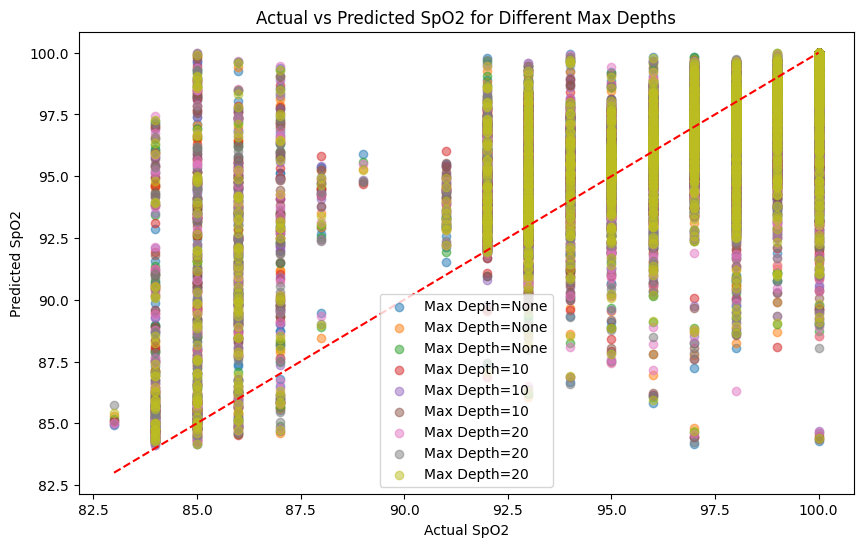

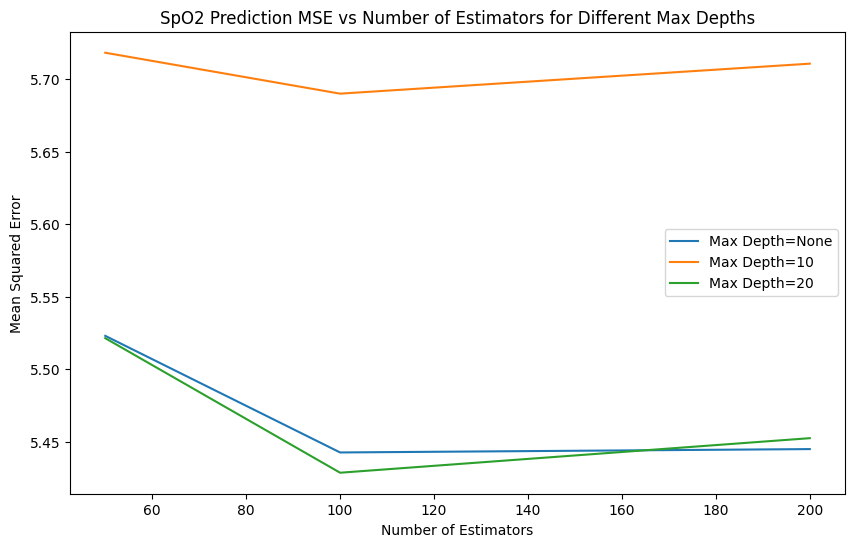

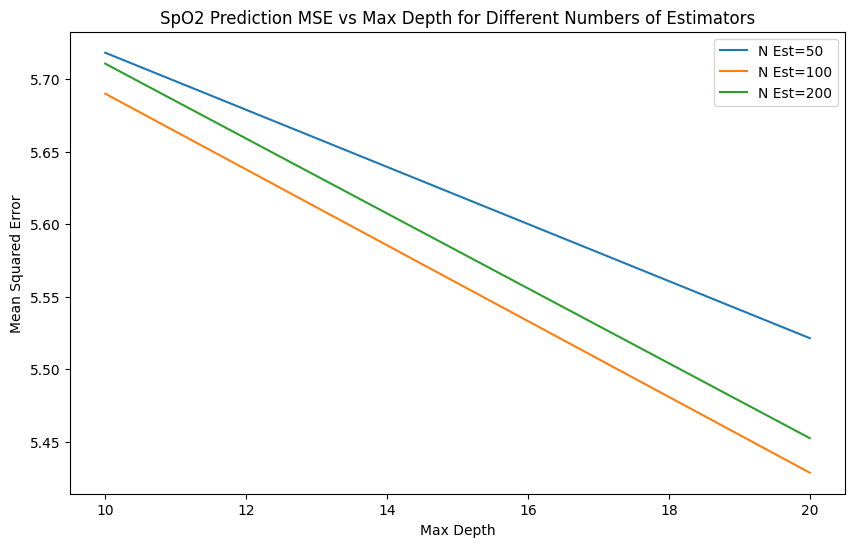

In [ ]:
import pandas as pd
import numpy as np
import glob
import os
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Correct data path
data_path = "./drive/MyDrive/PulseOxData/bidmc-ppg-and-respiration-dataset-1.0.0/bidmc_csv/"

# Verify if the directory exists
if os.path.exists(data_path):
    print(f"Data path exists: {data_path}")
else:
    print(f"Data path does NOT exist: {data_path}")

# Initialize lists to hold the aggregated data
x_values = []
y_values = []

# Use glob to find all signal and numeric files
signal_files = glob.glob(os.path.join(data_path, "bidmc_*_Signals.csv"))

print(f"Found {len(signal_files)} signal files.")

for signal_file in signal_files:
    # Extract patient id from file name
    pid = int(signal_file.split("_")[-2])
    numerics_file = signal_file.replace("_Signals.csv", "_Numerics.csv")

    print(f"Processing files for patient {pid}:")
    print(f"  Signal file: {signal_file}")
    print(f"  Numerics file: {numerics_file}")

    # Load the data
    try:
        signal_df = pd.read_csv(signal_file)
        numerics_df = pd.read_csv(numerics_file)
    except FileNotFoundError:
        print(f'  Files for patient {pid} not found.')
        continue

    print(f"  Loaded signal_df with shape: {signal_df.shape}")
    print(f"  Loaded numerics_df with shape: {numerics_df.shape}")

    # Strip leading/trailing spaces from column names
    signal_df.columns = signal_df.columns.str.strip()
    numerics_df.columns = numerics_df.columns.str.strip()

    # Print the columns of the DataFrames to verify
    print(f"  signal_df columns: {signal_df.columns}")
    print(f"  numerics_df columns: {numerics_df.columns}")

    # Merge the dataframes on the 'Time [s]' column
    merged_df = pd.merge(signal_df, numerics_df, on='Time [s]')

    print(f"  Merged dataframe shape: {merged_df.shape}")
    print(f"  Merged dataframe columns: {merged_df.columns}")

    # Specify the columns to use
    signal_columns = ['PLETH', 'II', 'AVR', 'CVP']
    numeric_column = 'SpO2'

    # Filter to only include the desired columns
    available_columns = [col for col in signal_columns if col in merged_df.columns]

    if not available_columns:
        print(f"  No available signal columns in merged dataframe, skipping patient {pid}.")
        continue

    # Drop rows with missing data in the selected columns
    merged_df = merged_df[available_columns + [numeric_column]].dropna()

    if merged_df.empty:
        print(f"  No valid data left after dropping rows with missing data, skipping patient {pid}.")
        continue

    # Append the values to the lists
    x_values.extend(merged_df[available_columns].values.tolist())
    y_values.extend(merged_df[numeric_column].values.tolist())

    print(f"  Appended data, current X shape: {len(x_values)}, current y shape: {len(y_values)}")

# Convert lists to numpy arrays
X = np.array([np.array(x) for x in x_values if len(x) == len(available_columns)])
y = np.array(y_values[:len(X)])

# Ensure y has no NaN values and matches the shape of X
y = y[~np.isnan(y)]
X = X[:len(y)]

# Check the shapes
print(f'Final X.shape: {X.shape}')
print(f'Final y.shape: {y.shape}')

# Check if there's enough data to split
if len(X) == 0 or len(y) == 0:
    print("Insufficient data for model training.")
else:
    # Split the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Define parameter ranges
    n_estimators = [50, 100, 200]
    max_depths = [None, 10, 20]

    # Initialize a list to store results
    results = []

    # Initialize dictionaries to store predictions for plotting
    predictions_dict_depth = {depth: [] for depth in max_depths}
    predictions_dict_nest = {n_est: [] for n_est in n_estimators}

    # Loop through parameter ranges
    for n_est in n_estimators:
        for max_depth in max_depths:
            # Train the model
            rf = RandomForestRegressor(
                n_estimators=n_est,
                criterion='squared_error',
                max_depth=max_depth,
                min_samples_split=2,
                min_samples_leaf=1,
                min_weight_fraction_leaf=0.0,
                max_features=1.0,
                max_leaf_nodes=None,
                min_impurity_decrease=0.0,
                bootstrap=True,
                oob_score=False,
                n_jobs=None,
                random_state=None,
                verbose=0,
                warm_start=False,
                ccp_alpha=0.0,
                max_samples=None
            )

            rf.fit(X_train, y_train)

            # Predict and calculate the error
            y_train_pred = rf.predict(X_train)
            y_test_pred = rf.predict(X_test)
            train_mse = mean_squared_error(y_train, y_train_pred)
            test_mse = mean_squared_error(y_test, y_test_pred)

            # Store the results
            results.append({
                'n_estimators': n_est,
                'max_depth': max_depth,
                'train_mse': train_mse,
                'test_mse': test_mse
            })

            # Store predictions for plotting
            predictions_dict_depth[max_depth].append((y_test, y_test_pred))
            predictions_dict_nest[n_est].append((y_test, y_test_pred))

    # Convert results to a DataFrame
    results_df = pd.DataFrame(results)

    # Display the results
    print(results_df)

    # Plot Actual vs Predicted
    plt.figure(figsize=(10, 6))
    for max_depth in max_depths:
        for (y_true, y_pred) in predictions_dict_depth[max_depth]:
            plt.scatter(y_true, y_pred, alpha=0.5, label=f'Max Depth={max_depth}')
    plt.plot([min(y), max(y)], [min(y), max(y)], 'r--')
    plt.xlabel('Actual SpO2')
    plt.ylabel('Predicted SpO2')
    plt.title('Actual vs Predicted SpO2 for Different Max Depths')
    plt.legend()
    plt.show()

    # Plot SpO2 prediction based on max depth differences
    plt.figure(figsize=(10, 6))
    for max_depth in max_depths:
        mses = [result['test_mse'] for result in results if result['max_depth'] == max_depth]
        plt.plot(n_estimators, mses, label=f'Max Depth={max_depth}')
    plt.xlabel('Number of Estimators')
    plt.ylabel('Mean Squared Error')
    plt.title('SpO2 Prediction MSE vs Number of Estimators for Different Max Depths')
    plt.legend()
    plt.show()

    # Plot SpO2 prediction based on n-estimators differences
    plt.figure(figsize=(10, 6))
    for n_est in n_estimators:
        mses = [result['test_mse'] for result in results if result['n_estimators'] == n_est]
        plt.plot(max_depths, mses, label=f'N Est={n_est}')
    plt.xlabel('Max Depth')
    plt.ylabel('Mean Squared Error')
    plt.title('SpO2 Prediction MSE vs Max Depth for Different Numbers of Estimators')
    plt.legend()
    plt.show()
